# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

In [3]:
from tqdm import tqdm
import os
import pandas as pd
files = os.listdir(r"C:\Users\i520085\Desktop\science\Deep learning\Tensor flow and keras overview\Assignment\CNN\documents")
label = []
text = []
for file in tqdm(files):
    f = open("./documents"+"/"+file, "r")
    text.append(f.read())
    f.close()
    label.append(file.split("_")[0])
freq = {} 
for item in label: 
    if (item in freq): 
        freq[item] += 1
    else: 
        freq[item] = 1    
d = {"Text": text, "Label": label}
data = pd.DataFrame(d)    
data.to_csv("text_label.csv", index = False, header = True)
    

100%|██████████████████████████████████████████████████████████████████████████| 18828/18828 [00:04<00:00, 4194.82it/s]


In [4]:
len(data)
data.head()

,Text,Label
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism


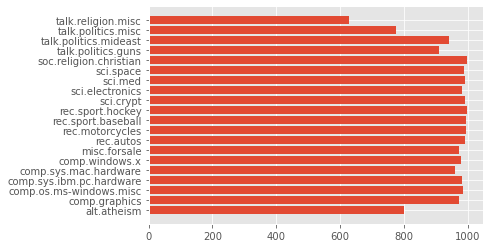

In [5]:
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.barh(*zip(*freq.items()))
plt.show()

## Assignment:

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

Finding Emails

In [6]:
from tqdm import tqdm
import re
preprocessed_email = []
for sentence in tqdm(data.Text.values):
        
        domain = re.findall("@[\w.]+", sentence)
        email = ""
        for items in domain:
            items = items.replace("@", "")    
            items = items.split(".")
            for i in set(items):
                if((len(i) > 2) and i != "com" and i != "COM"):
                    email += i + " "
        preprocessed_email.append(email.strip())

100%|████████████████████████████████████████████████████████████████████████| 18828/18828 [00:00<00:00, 107918.38it/s]


In [7]:
print(email)

quack kfu edu uoknor darkside osrhe edu osrhe okcforum CWRU edu 


<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

<h1>Finding Subject</h1>

In [8]:
preprocessed_subject = []
for sentence in tqdm(data.Text.values):
    text_split = sentence.split("\n")
    for item in text_split:
        if(item.startswith("Subject:")):
            subject = ""
            for word in item.split():
                if not word.endswith(":"):
                    subject += word + " "
            subject = re.sub("[^0-9a-zA-Z\s]", " ", subject)
            subject = " ".join(subject.split()).strip()
    preprocessed_subject.append(subject.lower())
print(preprocessed_subject[:5])

100%|█████████████████████████████████████████████████████████████████████████| 18828/18828 [00:00<00:00, 76166.59it/s]

['alt atheism atheist resources', 'alt atheism introduction to atheism', 'gospel dating', 'university violating separation of church state', 'soc motss et al princeton axes matching funds for boy scouts']


In [9]:
x = []
for i in data.Text.values:    
    i = re.sub(r"Write to:.*$","",i, flags=re.MULTILINE)          
    i = re.sub(r"From:.*$","",i, flags=re.MULTILINE)               
    i = re.sub(r"or:","",i,flags=re.MULTILINE)
    x.append(i)
print(x[0])


Subject: Alt.Atheism FAQ: Atheist Resources

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December 1992
Version: 1.0

                              Atheist Resources

                      Addresses of Atheist Organizations

                                     USA

FREEDOM FROM RELIGION FOUNDATION

Darwin fish bumper stickers and assorted other atheist paraphernalia are
available from the Freedom From Religion Foundation in the US.


Telephone: (608) 256-8900

EVOLUTION DESIGNS

Evolution Designs sell the "Darwin fish".  It's a fish symbol, like the ones
Christians stick on their cars, but with feet and the word "Darwin" written
inside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.


           CA 91605.

People in the San Francisco Bay area can get Darwin Fish from Lynn Gold --
try mailing <figmo@netcom.com>.  For net people who go to Lynn directly, the
price is $4.95 per fish.

AMERICAN ATHEIST PRESS

AAP publish various a

In [10]:
j=0
y = []
for i in tqdm(x): 
    i = re.sub(r"<.*>","",i, flags=re.MULTILINE) 
    i = re.sub(r"\(.*\)","",i,flags=re.MULTILINE)
    i = re.sub(r"\[.*\]", " ", i, flags=re.MULTILINE)                        
    i = re.sub(r"\{.*\}", " ", i, flags=re.MULTILINE)                        
    y.append(i)


100%|████████████████████████████████████████████████████████████████████████| 18828/18828 [00:00<00:00, 105126.87it/s]


In [11]:
z = []
for i in tqdm(y):  
    i = re.sub(r"[\n\t\-\\\/]","",i, flags=re.MULTILINE)
    z.append(i)

100%|█████████████████████████████████████████████████████████████████████████| 18828/18828 [00:00<00:00, 52277.20it/s]


In [12]:
a = []
for i in tqdm(z):
    i = re.sub(r'\w+:\s?','',i)
    a.append(i)
print(a[1])

100%|█████████████████████████████████████████████████████████████████████████| 18828/18828 [00:01<00:00, 18238.84it/s]

Alt.Atheism Introduction to 5 April 1.2BEGIN PGP SIGNED MESSAGE                          An Introduction to Atheism                       by mathew This article attempts to provide a general introduction to atheism.  Whilst Ihave tried to be as neutral as possible regarding contentious issues, youshould always remember that this document represents only one viewpoint.  Iwould encourage you to read widely and draw your own conclusions; somerelevant books are listed in a companion article.To provide a sense of cohesion and progression, I have presented this articleas an imaginary conversation between an atheist and a theist.  All thequestions asked by the imaginary theist are questions which have been croppedup repeatedly on alt.atheism since the newsgroup was created.  Some otherfrequently asked questions are answered in a companion article.Please note that this article is arguably slanted towards answering questionsposed from a Christian viewpoint.  This is because the FAQ files reflec

In [13]:
import nltk
from nltk.corpus import conll2000
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.chunk import ne_chunk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
chunks=[]
f = []

for l in range(len(a)):
    chunks=(list(ne_chunk(pos_tag(word_tokenize(a[l])))))
    #print(chunks)
    for i in chunks:
        if type(i) is nltk.Tree:
            if i.label()=="GPE":
                j = i.leaves()
                print(j)
                if len(j)>1:   #if new_delhi or bigger name
                    gpe = "_".join([term for term,pos in j])
                    #print(gpe)
                    #print(j[0][0])
                    a[l] = re.sub(rf'{j[1][0]}',gpe,a[l], flags=re.MULTILINE) 
                    #print(u)
                    #f.append(u)
                    a[l] = re.sub(rf'\b{j[0][0]}\b',"",a[l], flags=re.MULTILINE) 
                    #f.append(u)
            if i.label()=="PERSON":                  
                for term,pog in i.leaves():
                    a[l] = re.sub(re.escape(term),"",a[l], flags=re.MULTILINE)
                    #f.append(ua)
#print(data[2])

[('Ball', 'NNP')]
[('Austin', 'NNP')]
[('London', 'NNP')]
[('London', 'NNP')]
[('Freethinker', 'NNP')]
[('God', 'NNP')]
[('Earth', 'NNP')]
[('Death', 'NNP')]
[('Christian', 'NNP')]
[('Christ', 'NNP')]
[('German', 'JJ')]
[('Gottes', 'NNP')]
[('Christianity', 'NNP')]
[('Baltimore', 'NNP')]
[('Unbelief', 'NNP')]
[('America', 'NNP')]
[('Franceand', 'NNP')]
[('American', 'JJ')]
[('New', 'NNP'), ('Englanddevelopments', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Cardiff', 'NNP')]
[('Coherence', 'NNP')]
[('Swinburne', 'NNP')]
[('Christian', 'NNP')]
[('Mackie', 'NNP')]
[('Swinburne', 'NNP')]
[('Descartes', 'NNP')]
[('Anselm', 'NNP')]
[('Newman', 'NNP')]
[('Swinburne', 'NNP')]
[('Kierkegaard', 'NNP')]
[('Atheism', 'NNP')]
[('Freethought', 'NNP')]
[('Christian', 'JJ')]
[('Atheism', 'NNP')]
[('Christian', 'JJ')]
[('Gods', 'NNP')]
[('God', 'NNP')]
[('Godexists', 'NNS')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('Soviet', 'JJ')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('Christian', 'NNP')]
[('God', '

[('Atheism', 'NNP')]
[('Jesus', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('God', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'JJ')]
[('Elvis', 'NNP')]
[('God', 'NNP')]
[('theChristian', 'JJ')]
[('Spinoza', 'NNP')]
[('Science', 'NNP')]
[('Philosophy', 'NNP')]
[('Religion', 'NNP')]
[('Science', 'NNP')]
[('Life', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Design', 'NNP')]
[('Josephus', 'NNP')]
[('Josephus', 'NNP')]
[('nonChristian', 'JJ')]
[('Christian', 'JJ')]
[('Eusebius', 'NNP')]
[('English', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('Chicago', 'NNP')]
[('American', 'NNP')]
[('Illinois', 'NNP')]
[('God', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('American', 'JJ')]
[('Allegiance', 'NNP')]
[('American', 'NNP')]
[('Norway', 'NNP')]
[('Norway', 'NNP')]
[('Biblical', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('Remonstrance', 'NNP')]
[('Belief', 'NNP

[('Mohammed', 'NNP')]
[('_The', 'NNP')]
[('Newsweek', 'NNP')]
[('Rushdie', 'NNP')]
[('Islam', 'NNP')]
[('Islam', 'NNP')]
[('Brothers', 'NNP')]
[('Islam', 'NNP')]
[('I3150101', 'NNP')]
[('Islam', 'NNP')]
[('Koran', 'NNP')]
[('Koran', 'NNP')]
[('Science', 'NNP')]
[('Southern', 'JJ')]
[('Freemasonry', 'NNP')]
[('Freemasonry', 'NNP')]
[('Freemasonry', 'NNP')]
[('Beaumont', 'NNP')]
[('Men', 'NNP')]
[('Freemasonry', 'NNP')]
[('Godand', 'NNP')]
[('America', 'NNP')]
[('Christian', 'JJ')]
[('Freemason', 'NNP')]
[('Freemasonry', 'NNP')]
[('New', 'NNP')]
[('Luke', 'NNP')]
[('Maddi', 'NNP')]
[('Queens', 'NNP')]
[('Bronx', 'NNP')]
[('Manhattan', 'NNP')]
[('Christianity', 'NNP')]
[('Queens', 'NNP')]
[('Bronx', 'NNP')]
[('Manhattan', 'NNP')]
[('Keith', 'NNP')]
[('Queens', 'NNP')]
[('Bronx', 'NNP')]
[('Manhattan', 'NNP')]
[('Queens', 'NNP')]
[('Bronx', 'NNP')]
[('Manhattan', 'NNP')]
[('Christian', 'JJ')]
[('Queens', 'NNP')]
[('Bronx', 'NNP')]
[('Manhattan', 'NNP')]
[('Brothers', 'NNP')]
[('Mormon', 'N

[('Genocide', 'NNP')]
[('Faith', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'JJ')]
[('Again', 'NNP')]
[('Christian', 'JJ')]
[('Jewish', 'JJ')]
[('Faith', 'NNP')]
[('Christian', 'NNP')]
[('Faith', 'NNP')]
[('God', 'NNP')]
[('Christian', 'NNP')]
[('Satan', 'NNP')]
[('St.', 'NNP')]
[('Anselm', 'NNP')]
[('American', 'JJ')]
[('Death', 'NNP')]
[('Americans', 'NNPS')]
[('Ockham', 'NNP')]
[('Occam', 'NNP')]
[('Honest', 'NNP')]
[('Keith', 'NNP')]
[('Rushdie', 'NNP')]
[('Kent', 'NNP')]
[('Daltons', 'NNP')]
[('American', 'JJ')]
[('America', 'NNP')]
[('Jewish', 'JJ')]
[('Muslim', 'NNP')]
[('Freedom', 'NNP')]
[('St.', 'NNP')]
[('Sacred_', 'NNP')]
[('U.S.', 'NNP')]
[('Iroquois', 'NNP')]
[('U.S.', 'NNP')]
[('Chinese', 'NNPS')]
[('Italians', 'NNPS')]
[('Union', 'NNP')]
[('Great', 'NNP')]
[('Indians', 'NNPS')]
[('American', 'JJ')]
[('Union', 'NNP')]
[('English', 'JJ')]
[('Grinde', 'NNP')]
[('Iroquois', 'NNP')]
[('Californiaat', 'NNP')]
[('North', 'NNP'), ('America', 'NNP')]
[('Salt', 'NNP'), ('Lake'

[('Americans', 'NNPS')]
[('Baysian', 'JJ')]
[('P', 'NNP')]
[('Gand', 'NNP')]
[('Pholds', 'NNP')]
[('Baysian', 'JJ')]
[('Baysian', 'JJ')]
[('Bayesian', 'JJ')]
[('Ockham', 'NNP')]
[('Baysian', 'JJ')]
[('Ht', 'NNP')]
[('Bayesian', 'NNP')]
[('Bayesian', 'JJ')]
[('Maddi', 'NNP')]
[('God', 'NNP')]
[('Rushdie', 'NNP')]
[('Finnish', 'JJ')]
[('Finnish', 'JJ')]
[('Finnish', 'JJ')]
[('Cheers', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Tyre', 'NNP')]
[('Tyre', 'NNP')]
[('Satan', 'NNP')]
[('Tyre', 'NNP')]
[('Tyre', 'NNP')]
[('Bosnia', 'NNP')]
[('Moslem', 'NNP')]
[('Societal', 'JJ')]
[('Faith', 'NNP')]
[('Waco', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'JJ')]
[('Gregg', 'NNP')]
[('LovingChristian', 'JJ')]
[('Kuwait', 'NNP')]
[('East', 'NNP'), ('Timor', 'NNP')]
[('Tibet', 'NNP')]
[('East', 'NNP'), ('Timor', 'NNP')]
[('East', 'NNP'), ('Timor', 'NNP')]
[('Iraq.', 'NNP')]
[('Tibetan', 'NNP')]
[('China', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'JJ')]
[('Germany', 'NNP')]
[('Iraqi', 'N

[('Jennifer', 'NNP')]
[('Jewish', 'JJ')]
[('Muslim', 'NNP')]
[('Freedom', 'NNP')]
[('Thailand', 'NNP')]
[('Christiandoctrine', 'NNP')]
[('Christaindoctrines', 'NNP')]
[('Christian', 'NNP')]
[('Bible', 'NNP')]
[('Dionetics', 'NNP')]
[('Again', 'NNP')]
[('Christians', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('Truth', 'NNP')]
[('European', 'NNP')]
[('Cain', 'NNP')]
[('Christian', 'NNP')]
[('Death', 'NNP')]
[('Iraq', 'NNP')]
[('Kuwait', 'NNP')]
[('Poland', 'NNP')]
[('Christian', 'JJ')]
[('Christ', 'NNP')]
[('Jesus', 'NNP')]
[('U.S.', 'NNP')]
[('Jennifer', 'NNP')]
[('Jennifer', 'NNP')]
[('Books', 'NNP')]
[('Asimov', 'NNP')]
[('Asimov', 'NNP')]
[('Great', 'NNP')]
[('Christian', 'JJ')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('Austrian', 'JJ')]
[('New', 'NNP')]
[('Utah', 'NNP')]
[('U.S.', 'NNP')]
[('China', 'NNP')]
[('California', 'NNP')]
[('People', 'NNP')]
[('Christian', 'JJ')]
[('Christianity', 'NNP')]
[('Pascal', 'NNP')]
[('Jennifer', 'NNP')]
[('God', 'N

[('Archie', 'NNP')]
[('Portugese', 'NNP')]
[('GL', 'NNP')]
[('Indian', 'JJ')]
[('Phong', 'NNP')]
[('Tcl', 'NNP')]
[('Utah', 'NNP')]
[('French', 'JJ')]
[('French', 'JJ')]
[('Dobkin', 'NNP')]
[('Postscript', 'NNP')]
[('BibTeX', 'NNP')]
[('Utah', 'NNP')]
[('Radiance', 'NNP')]
[('Color', 'NNP')]
[('Rayshade', 'NNP')]
[('Radiance', 'NNP')]
[('Haines', 'NNP')]
[('Magellan', 'NNP')]
[('European', 'NNP')]
[('Amiga', 'NNP')]
[('Haines', 'NNP')]
[('Facial', 'NNP')]
[('TTDDD', 'NNP')]
[('Chicago', 'NNP')]
[('Canada', 'NNP')]
[('Fractals', 'NNP')]
[('Graphics', 'NNP')]
[('Long', 'NNP'), ('Island', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('El', 'NNP'), ('Cerrito', 'NNP')]
[('Alaska', 'NNP')]
[('New', 'NNP'), ('Zealand', 'NNP')]
[('Australia', 'NNP')]
[('France', 'NNP')]
[('ANYWAY', 'NNP')]
[('Amiga', 'NNP')]
[('Maryland', 'NNP')]
[('Portland', 'NNP')]
[('Oregon', 'NNP')]
[('Amiga', 'NNP')]
[('Radiance', 'NNP')]
[('Turbo', 'NNP')]
[('Automove', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('SIMTEL2

[('List', 'NN')]
[('Moscow', 'NNP')]
[('SCODAL', 'NNP')]
[('Corel', 'NNP')]
[('Corel', 'NNP')]
[('Indigo', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Austria', 'NNP')]
[('Athens', 'NNP')]
[('Amiga', 'NNP')]
[('Amiga', 'NNP')]
[('Gaspra', 'NNP')]
[('TIFF', 'NNP')]
[('Univ', 'NNP')]
[('Tennessee', 'NNP')]
[('Xt', 'NNP')]
[('X', 'NNP')]
[('Newsgroup', 'NNP')]
[('Newsgroup', 'NNP')]
[('Color', 'NNP')]
[('Povray', 'NN')]
[('North', 'NNP'), ('Carolina', 'NNP')]
[('Fontana', 'NNP')]
[('Chrome_', 'NNP')]
[('Tomorrow_', 'NNP')]
[('Voice_', 'NNP')]
[('Analog', 'NNP')]
[('Glass_', 'NNP')]
[('P1_', 'NNP')]
[('Egg_', 'NNP')]
[('World_', 'NNP')]
[('Promises_', 'NNP')]
[('Dangers_', 'NNP')]
[('Deep_', 'NNP')]
[('Nacht_', 'NNP')]
[('Switzerland', 'NNP')]
[('Franken_', 'NNP')]
[('German', 'NNP')]
[('P1_', 'NNP')]
[('_Neuromancer_', 'NNP')]
[('Dangers_', 'NNP')]
[('One_', 'NNP')]
[('Deep_', 'NNP')]
[('Promises_', 'NNP')]
[('Dutch', 'NNP')]
[('Fractal', 'JJ')]
[('JPEG', 'NNP')]
[('Taiwan', 'NNP')

[('Waikato', 'NNP')]
[('Hamilton', 'NNP')]
[('New', 'NNP')]
[('Earth', 'NNP')]
[('Centris', 'NNP')]
[('New', 'NNP')]
[('POVray', 'NN')]
[('POVray', 'NN')]
[('Netherlands', 'NNP')]
[('Rensselaerville', 'NNP')]
[('U.S.A.', 'NNP')]
[('Product', 'NNP')]
[('U.S.A.', 'NNP')]
[('Boston', 'NNP')]
[('Macroscopic', 'NNP')]
[('RGBHLSHSV', 'NNP')]
[('Hague', 'NNP')]
[('Netherlands', 'NNP')]
[('Polaroid', 'NNP')]
[('Lead', 'NNP')]
[('Copper', 'NNP')]
[('Radium', 'NNP')]
[('Sapphire', 'NNP')]
[('Silver', 'NNP')]
[('X', 'NNP')]
[('Y', 'NNP')]
[('Online', 'NNP')]
[('Macintosh', 'NNP')]
[('Human', 'NNP')]
[('Zaphod', 'NNP')]
[('Data', 'NNP')]
[('Text', 'NNP')]
[('HPGL', 'NNP')]
[('Targa', 'NNP')]
[('Engineering', 'NNP')]
[('German', 'NNP')]
[('Wuppertal', 'NNP')]
[('Sutherland', 'NNP')]
[('Zbuffering', 'NNP')]
[('Z', 'NNP')]
[('Zbuffered', 'NNP')]
[('Ruffles', 'NNP')]
[('Fl', 'NNP')]
[('Genoa', 'NNP')]
[('Safescan', 'NNP')]
[('Windows', 'NNP')]
[('Studio', 'NNP')]
[('Sean', 'NNP')]
[('California', 'NNP

[('Windows', 'NNP')]
[('Turn', 'NNP')]
[('Minnesota', 'NNP')]
[('Minnesota', 'NNP')]
[('Ethernet', 'NNP')]
[('Northwestern', 'NNP'), ('University', 'NNP')]
[('Minnesota', 'NNP')]
[('Script', 'NNP')]
[('Medicine', 'NNP')]
[('Cleveland', 'NNP')]
[('Borland', 'NNP')]
[('Newsgroup', 'NNP')]
[('San', 'NNP'), ('Diego', 'NNP')]
[('Industry', 'NNP')]
[('JapaneseWhere', 'NNP')]
[('Enhanced', 'NNP')]
[('Could', 'NNP')]
[('Video', 'NNP')]
[('Help', 'NN')]
[('Geelong', 'NNP')]
[('Australia', 'NNP')]
[('Geelong', 'NNP')]
[('Australia', 'NNP')]
[('Bootup', 'NNP')]
[('Ed', 'NNP')]
[('Canon', 'NNP')]
[('Canon', 'NNP')]
[('Canon', 'NNP')]
[('New', 'NNP'), ('Zealand', 'NNP')]
[('Normal', 'JJ')]
[('tooAND', 'NN')]
[('Canon', 'NNP')]
[('Windows', 'NNP')]
[('Canon2', 'NNP')]
[('Canon', 'NNP')]
[('Canon', 'NNP')]
[('Canon', 'NNP')]
[('Greetz', 'NNP')]
[('Windows', 'NNP')]
[('Canon', 'NNP')]
[('Germany', 'NNP')]
[('Canon', 'NNP')]
[('Question', 'NN')]
[('Need', 'NN')]
[('New', 'NNP')]
[('Program', 'NNP')]
[(

[('Windows', 'NNP')]
[('DOSland', 'NNP')]
[('W4W', 'NNP')]
[('Word', 'NNP')]
[('Palij', 'NNP')]
[('TIFF', 'NNP')]
[('TIFF', 'NNP')]
[('Hotkey', 'NNP')]
[('Help', 'NN')]
[('Thankx', 'NNP')]
[('Dineen', 'NNP')]
[('Irish', 'JJ')]
[('Greene', 'NNP')]
[('Anyone', 'NNP')]
[('Waterloo', 'NNP')]
[('Hypertext', 'NNP')]
[('Cincy', 'NNP')]
[('Word', 'NNP')]
[('Word', 'NNP')]
[('Macs', 'NNP')]
[('Macintosh', 'NNP')]
[('Windows', 'NNP')]
[('Word', 'NNP')]
[('Word', 'NNP')]
[('Illinois', 'NNP')]
[('Germany', 'NNP')]
[('Windows', 'NNP')]
[('Norton', 'NNP')]
[('Windowsitself', 'NNP')]
[('Windows', 'NNP')]
[('Norton', 'NNP')]
[('Norton', 'NNP')]
[('Apples', 'NNP')]
[('Cincy', 'NNP')]
[('Solaris', 'NNP')]
[('Solaris', 'NNP')]
[('Please', 'NNP')]
[('Greene', 'NNP')]
[('Greene', 'NNP')]
[('Please', 'NNP')]
[('Windows', 'NNP')]
[('Windows', 'NNP')]
[('Windows', 'NNP')]
[('Turbo', 'NNP')]
[('Singapore', 'NNP')]
[('Norwegian', 'JJ')]
[('Please', 'NNP')]
[('Windows', 'NNP')]
[('Norton', 'NNP')]
[('Screen', 'N

[('SS24X', 'NNP')]
[('Cirrus', 'NNP')]
[('Wellington', 'NNP')]
[('New', 'NNP')]
[('Cool', 'NNP')]
[('Canada', 'NNP')]
[('Norton', 'NNP')]
[('Infoworld', 'NNP')]
[('Windows', 'NNP')]
[('Qestion', 'NN')]
[('Norton', 'NNP')]
[('Postscript', 'NNP')]
[('Univ', 'NNP')]
[('Penn', 'NNP')]
[('Canon', 'NNP')]
[('Anyone', 'NN')]
[('Windows', 'NNP')]
[('Zinc', 'NNP')]
[('Windows', 'NNP')]
[('Cica', 'NNP')]
[('MSDOS', 'NNP')]
[('WPPCF', 'NNP')]
[('Need', 'NNP')]
[('Thanks', 'NNP')]
[('MIDI', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Windows', 'NNP')]
[('Windows', 'NNP')]
[('Windows', 'NNP')]
[('Beta', 'NNP')]
[('Illinois', 'NNP')]
[('Highperformance', 'NNP')]
[('Need', 'NNP')]
[('Optichipset2', 'NNP')]
[('Info', 'NNP')]
[('SS24X', 'NNP')]
[('Gateway', 'NNP')]
[('Does', 'NNP')]
[('Chicogo', 'NNP')]
[('Trondheim', 'NNP')]
[('Industry', 'NNP')]
[('Pixel', 'NNP')]
[('Industry', 'NNP')]
[('Anyone', 'NN')]
[('New', 'NNP'), ('York', 'NNP')]
[('Need', 'NN')]
[('Windows', 'NNP')]
[('WPPCF', 'NNP')]
[('Wi

[('ZModem', 'NNP')]
[('Birmingham', 'NNP')]
[('Thanks', 'NNP')]
[('Death', 'NNP')]
[('A000C800', 'NNP')]
[('Sprintnet', 'NNP')]
[('Help', 'NN')]
[('Taiwan', 'NNP')]
[('Help', 'NN')]
[('Ed', 'NNP')]
[('Fujitsu', 'NNP')]
[('Germany', 'NNP')]
[('NT', 'NNP')]
[('Thanks', 'NNP')]
[('Dallas', 'NNP')]
[('Workspace', 'NN')]
[('Visual', 'JJ')]
[('Canterbury', 'NNP')]
[('Program', 'NNP')]
[('Canon', 'NNP')]
[('Canon', 'NNP')]
[('Visual', 'JJ')]
[('Windows', 'NNP')]
[('C7', 'NNP')]
[('C7', 'NNP')]
[('Australia', 'NNP')]
[('Canon', 'NNP')]
[('H', 'NNP')]
[('Canon', 'NNP')]
[('Reboot', 'NN')]
[('Accsys', 'NNP')]
[('Borland', 'NNP')]
[('Accsys', 'NNP')]
[('Quadbase', 'NNP')]
[('Codebase', 'NNP')]
[('Quadbase', 'NNP')]
[('Codebase', 'NNP')]
[('Borland', 'NNP')]
[('Borland', 'NNP')]
[('Pascal', 'NNP')]
[('Borland', 'NNP')]
[('Windows', 'NNP')]
[('Framework', 'NNP')]
[('Borland', 'NNP')]
[('Borland', 'NNP')]
[('Borland', 'NNP')]
[('Borland', 'NNP')]
[('Robotics', 'NNP')]
[('Australia', 'NNP')]
[('Borla

[('C', 'NNP')]
[('CZ', 'NNP')]
[('J3', 'NNP')]
[('Q145', 'NNP')]
[('C', 'NNP')]
[('J3', 'NNP')]
[('C', 'NNP')]
[('E', 'NNP')]
[('C', 'NNP')]
[('C4R3', 'NNP')]
[('C', 'NNP')]
[('S7', 'NNP')]
[('E', 'NNP')]
[('C9', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('C4', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('E2N', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('S', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('O', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('E82708270', 'NNP')]
[('E8270825A', 'NNP')]
[('E', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('E', 'NNP')]
[('R4C', 'NNP')]
[('S', 'NNP')]
[('M34U', 'NNP')]
[('R4', 'NNP')]
[('ME', 'NNP')]
[('C', 'NNP')]
[('_S^KSZ', 'NNP')]
[('C4U3', 'NNP')]
[('_S_S_U', 'NNP')]
[('V9F9F9F9F', 'NNP')]
[('Q5', 'NNP')]
[('Q555555555', 'NNP')]
[('M8', 'NNP')]
[('Q5', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('C', 'NNP')]
[('Q30T', 'NNP')]
[('D0W', 'NNP')]
[('S', 'NNP')]
[('S', 'NNP')]
[('B8F', 'NNP')]
[('S', 'NNP')]
[('S', '

[('Info', 'NNP')]
[('Pascal', 'NNP')]
[('Modula2', 'NNP')]
[('Apple', 'NNP')]
[('Ithink', 'NNP')]
[('Psychology', 'NNP')]
[('Massachusetts', 'NNP')]
[('Can', 'NNP')]
[('Mountain', 'NN')]
[('EISA', 'NNP')]
[('Psychology', 'NNP')]
[('Massachusetts', 'NNP')]
[('Sony', 'NNP')]
[('Help', 'NN')]
[('SPEED', 'NNP')]
[('B', 'NNP')]
[('Thanks', 'NNP')]
[('Advance', 'NNP')]
[('Pennsylvania', 'NNP')]
[('B', 'NNP')]
[('Zeos', 'NNP')]
[('Help', 'NN')]
[('Zeos', 'NNP')]
[('Gateway', 'NNP')]
[('Borland', 'NNP')]
[('Borland', 'NNP')]
[('Ottawa', 'NNP')]
[('Europe', 'NNP')]
[('Encyclopedia', 'NNP')]
[('Screen', 'NNP')]
[('S3', 'NNP')]
[('Help', 'NN')]
[('Fujitsu', 'NNP')]
[('Canberra', 'NNP')]
[('Specs', 'NNP')]
[('Date', 'NNP')]
[('D', 'NNP')]
[('Need', 'NNP')]
[('Auckland', 'NNP')]
[('Auckland', 'NNP')]
[('TURBO', 'NNP')]
[('TURBOSWITCH', 'NNP')]
[('Turbo', 'NNP')]
[('Info', 'NNP')]
[('Michigan', 'NNP')]
[('English', 'NNP')]
[('Copenhagen', 'NNP')]
[('English', 'NNP')]
[('Byte', 'NNP')]
[('Asynchronou

[('Anybody', 'NNP')]
[('Ca', 'NNP')]
[('N', 'NNP')]
[('E870N', 'NNP')]
[('O', 'NNP')]
[('O', 'NNP')]
[('G1R87T', 'NNP')]
[('V0N', 'NNP')]
[('G', 'NNP')]
[('Q', 'NNP')]
[('G', 'NNP')]
[('California', 'NNP')]
[('Request', 'NNP')]
[('Date', 'NNP')]
[('Garland', 'NNP')]
[('Elec', 'NNP')]
[('Univ', 'NNP')]
[('Hawaii', 'NNP')]
[('Phone', 'NNP')]
[('UltraSCSIHi', 'NNP')]
[('Help', 'NNP')]
[('Fax', 'NNP')]
[('Canon', 'NNP')]
[('Canon', 'NNP')]
[('Motherboard', 'NNP')]
[('New', 'NNP')]
[('Cirrus', 'NNP')]
[('Gibson', 'NNP')]
[('Micron', 'NNP')]
[('Cirrus', 'NNP')]
[('Gibson', 'NNP')]
[('Texas', 'NNP')]
[('Doublespace', 'NNP')]
[('Floptical', 'JJ')]
[('Promplem', 'NNP')]
[('Greetings', 'NNP')]
[('Austin', 'NNP')]
[('Victoria', 'NNP')]
[('Australia', 'NNP')]
[('Which', 'JJ')]
[('Diamond', 'NN')]
[('Diamond', 'NN')]
[('Divide', 'NNP')]
[('Tampere', 'NNP')]
[('X.S=av', 'NNP')]
[('Windows', 'NNP')]
[('Windows', 'NNP')]
[('Tyne', 'NNP')]
[('Phillips', 'NNP')]
[('Exciting', 'NNP')]
[('Dublin', 'NNP')]

[('Centris', 'NNP')]
[('Framingham', 'NNP')]
[('American', 'NNP')]
[('Greenbelt', 'NNP')]
[('Help', 'NN')]
[('Need', 'NNP')]
[('Great', 'JJ')]
[('Austin', 'NNP')]
[('Texas', 'NNP')]
[('U.S.', 'NNP')]
[('Australia', 'NNP')]
[('Accelerator', 'NN')]
[('Macworld', 'NNP')]
[('Pin', 'NNP')]
[('Cheers', 'NNPS')]
[('Portable', 'JJ')]
[('Portable', 'NNP')]
[('Portable', 'NNP')]
[('Macs', 'NNP')]
[('Nubus', 'NNP')]
[('Texas', 'NNP')]
[('Centris', 'NNP')]
[('C610', 'NNP')]
[('Need', 'NNP')]
[('Ataris', 'NNP')]
[('Sociology', 'NNP')]
[('HONGKONG', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('Hong', 'NNP')]
[('U.S.', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('Macintosh', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('U.S.', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('Hong', 'NNP'), ('Kong', 'NNP')]
[('Kowloon', 'NNP')]
[('Macs', 'NNP')]
[('Texas', 'NNP')]
[('North', 'NNP'), ('Carolina', 'NN

[('Britons', 'NNP')]
[('European', 'JJ')]
[('Trade', 'NNP')]
[('IIsi', 'NNP')]
[('Sinks', 'NNP')]
[('Dallas', 'NNP')]
[('Quadra', 'NNP')]
[('America', 'NNP')]
[('Nashville', 'NNP')]
[('Duo', 'NNP')]
[('Duo', 'NNP')]
[('Quicktime', 'NNP')]
[('Modula', 'NNP')]
[('Canada', 'NNP')]
[('Mexico', 'NNP')]
[('U.S.', 'NNP')]
[('Quadra', 'NNP')]
[('Cheers', 'NNP')]
[('Quadra', 'NNP')]
[('Apple', 'NNP')]
[('Quadra', 'NNP')]
[('Quadra', 'NNP')]
[('Framingham', 'NNP')]
[('Demand', 'NNP')]
[('Driver', 'NN')]
[('C650', 'NNP')]
[('South', 'NNP')]
[('Microbiology', 'NNP')]
[('Medicine', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Duo', 'NNP')]
[('Duo', 'NNP')]
[('Disk', 'NNP')]
[('Cambridge', 'NNP')]
[('Serial', 'NNP')]
[('Rodime', 'NNP')]
[('Grand', 'NNP'), ('Blanc', 'NNP')]
[('Fido', 'NNP')]
[('Quadra', 'NNP')]
[('Urbana', 'NNP')]
[('C610', 'NNP')]
[('Centris', 'NNP')]
[('Centris', 'NNP')]
[('Third', 'NNP')]
[('Duo', 'NNP')]
[('James', 'NNP')]
[('C650', 'NNP')]
[('U.S.', 'NNP')]
[('Illinois', 'NNP')]

[('Widget', 'NNP')]
[('Xt', 'NNP')]
[('Xt', 'NNP')]
[('Europe', 'NNP')]
[('Honours', 'NNP')]
[('X11R4', 'NNP')]
[('Illinois', 'NNP')]
[('X11R5', 'NNP')]
[('Illinois', 'NNP')]
[('Xtbased', 'JJ')]
[('SeeTeX2.18.5.tar.Z', 'NNP')]
[('Ltd', 'NNP')]
[('Cscript', 'NNP')]
[('Ada', 'NNP')]
[('Windows', 'NNP')]
[('Ada', 'NNP')]
[('Serpent', 'NNP')]
[('Pittsburgh', 'NNP')]
[('C++and', 'NNP')]
[('Motif', 'NNP')]
[('Patch', 'NNP')]
[('R5', 'NNP')]
[('Sparc', 'NNP')]
[('X11R4', 'NNP')]
[('X11R4', 'NNP')]
[('X11R5', 'NNP')]
[('R4', 'NNP')]
[('Foe', 'NNP')]
[('German', 'JJ')]
[('Imake', 'NNP')]
[('X11R3', 'NNP')]
[('Imake', 'NNP')]
[('X11R5', 'NNP')]
[('X11R4', 'NNP')]
[('Makefile', 'NNP')]
[('Jordan', 'NNP'), ('Hayes', 'NNP')]
[('X', 'NNP')]
[('Athena', 'NNP')]
[('True', 'NNP')]
[('X', 'NNP')]
[('Tektronix', 'NNP')]
[('Boolean', 'NNP')]
[('Boolean', 'NNP')]
[('Position', 'NNP')]
[('Massachusetts', 'NNP')]
[('XtAddCallback', 'NNP')]
[('XtAddCallback', 'NNP')]
[('XtAddCallback', 'NNP')]
[('Dan', 'NNP')

[('Xlib', 'NN')]
[('New', 'NNP'), ('York', 'NNP'), ('City', 'NNP')]
[('Xlib', 'NNP')]
[('System', 'NNP')]
[('tmpIn', 'JJ')]
[('Title', 'NN')]
[('X386', 'NN')]
[('XTranslateCoord', 'NN')]
[('Motif', 'NNP')]
[('Demand', 'NN')]
[('XView', 'NN')]
[('Mysterious', 'JJ')]
[('Widget', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('Pasadena', 'NNP')]
[('Wcl', 'NNP')]
[('Pasadena', 'NNP')]
[('Monthly', 'JJ')]
[('Window', 'NNP')]
[('MotifX', 'NNP')]
[('Monthly', 'JJ')]
[('Monthly', 'JJ')]
[('X', 'NNP')]
[('Macintosh', 'NNP')]
[('Aspect', 'NNP')]
[('Mysterious', 'JJ')]
[('Text', 'NNP')]
[('Monthly', 'JJ')]
[('Window', 'NNP')]
[('Window', 'NNP')]
[('Fl', 'NNP')]
[('Wcl', 'NNP')]
[('Solaris', 'NNP')]
[('Xlib', 'NNP')]
[('Window', 'NNP')]
[('Mwm', 'NNP')]
[('usrlibX11fonts100dpi', 'JJ')]
[('usrlibX11fontsmisc', 'JJ')]
[('MotifX', 'NNP')]
[('Athena', 'NNP')]
[('Colorado', 'NNP')]
[('Xt', 'NNP')]
[('Multiscreen', 'NNP')]
[('March', 'NNP')]
[('Apollo', 'NNP')]
[('Apollo', 'NNP')]
[('Motifinc

[('X11', 'NNP')]
[('Andrew', 'NNP')]
[('X11R5', 'NN')]
[('R5', 'NNP')]
[('Tel', 'NNP')]
[('Wcl', 'NNP')]
[('Pasadena', 'NNP')]
[('Pennsylvania', 'NNP')]
[('Unicode', 'NNP')]
[('Washington', 'NNP')]
[('U.S.', 'NNP')]
[('XFace', 'NN')]
[('XServer', 'NN')]
[('Motif', 'NNP')]
[('X11R5', 'JJ')]
[('COSEGUI', 'NNP')]
[('Problem', 'NNP')]
[('German', 'NNP')]
[('Thanks', 'NNPS')]
[('Talmud', 'NNP')]
[('Wonderland', 'NNP')]
[('Germany', 'NNP')]
[('Brian', 'NNP')]
[('Reston', 'NNP')]
[('Colormap', 'NNP')]
[('RPC', 'NNP')]
[('Xish', 'JJ')]
[('Perl', 'NNP')]
[('Xelse', 'NNP')]
[('Xelse', 'NNP')]
[('Xelse', 'NNP')]
[('Xclose', 'NNP')]
[('Xshift', 'NNP')]
[('Xunshift', 'NNP')]
[('Permission', 'NNP')]
[('Multiple', 'JJ')]
[('Motif', 'NNP')]
[('California', 'NNP')]
[('Xdomain', 'NN')]
[('Boeing', 'NNP')]
[('Max_Y', 'NNP')]
[('Keyboard', 'NNP')]
[('Xwindows', 'NNP')]
[('Pasadena', 'NNP')]
[('Ireland', 'NNP')]
[('Windows', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('California', 'NNP')]
[('Xkernel', 

[('X11R5', 'NN')]
[('Xterm', 'NNP')]
[('Muenchen', 'NNP')]
[('Germany', 'NNP')]
[('South', 'NNP'), ('Africa', 'NNP')]
[('Technology', 'NNP')]
[('Uxbridge', 'NNP')]
[('Xterm', 'NNP')]
[('Norfolk', 'NNP')]
[('X', 'NNP')]
[('Math', 'NNP')]
[('C', 'NNP')]
[('X', 'NNP')]
[('Xlib', 'NNP')]
[('Windows', 'NNP')]
[('Autodesk', 'NNP')]
[('Sausalito', 'NNP')]
[('California', 'NNP')]
[('Haifa', 'NNP')]
[('Israel', 'NNP')]
[('Problem', 'NNP')]
[('Patch', 'NNP')]
[('R5', 'NNP')]
[('Seattle', 'NNP')]
[('Ican', 'NNP')]
[('Netherlands', 'NNP')]
[('Could', 'NNP')]
[('College', 'NNP')]
[('London', 'NNP')]
[('X', 'NNP')]
[('California', 'NNP')]
[('Netherlands', 'NNP')]
[('College', 'NNP')]
[('London', 'NNP')]
[('Region', 'NNP')]
[('Middlesex', 'NNP')]
[('Xterm', 'NNP')]
[('Ethernet', 'NNP')]
[('Norfolk', 'NNP')]
[('Xterm', 'NNP')]
[('Ethernet', 'NNP')]
[('New', 'NNP')]
[('England', 'NNP')]
[('Core', 'NNP')]
[('Science', 'NNP')]
[('Newcastle', 'NNP')]
[('Tyne', 'NNP')]
[('United', 'NNP'), ('Kingdom', 'NNP'

[('White', 'NNP')]
[('Gray', 'NNP')]
[('Rear', 'NNP')]
[('Power', 'NNP')]
[('Power', 'NNP')]
[('Power', 'NNP')]
[('Cruise', 'NNP')]
[('Power', 'NNP')]
[('Power', 'NNP')]
[('Electronic', 'NNP')]
[('Remotekeyless', 'NNP')]
[('Cleveland', 'NNP')]
[('Ohio', 'NNP')]
[('America', 'NNP')]
[('No', 'NNP')]
[('K', 'NNP')]
[('K', 'NNP')]
[('Ka', 'NNP')]
[('Dayton', 'NNP')]
[('Dayton', 'NNP')]
[('Canon', 'NNP')]
[('Dual', 'NNP')]
[('M26525Abrand', 'NNP')]
[('Rage', 'NNP')]
[('Shinobi', 'NNP')]
[('Columns', 'NNP')]
[('Latest', 'NNP')]
[('New', 'NNP')]
[('Byte', 'NNP')]
[('Roland', 'NNP')]
[('Great', 'NNP')]
[('Dragon', 'NNP')]
[('Borland', 'NNP')]
[('Foot', 'NN')]
[('F5W', 'NNP')]
[('E', 'NNP')]
[('New', 'NNP'), ('YorkHarry', 'NNP'), ('Connick', 'NNP')]
[('Books', 'NNP')]
[('Fortran', 'NNP')]
[('Chemistry', 'NNP')]
[('Chemistry', 'NNP')]
[('Classic', 'JJ')]
[('Thanks', 'NNP')]
[('Dance', 'NNP')]
[('SyQuest', 'NNP')]
[('ExtraTresstialsAgain', 'NNP')]
[('New', 'NNP')]
[('Oak', 'NNP')]
[('Windows', 'N

[('Norton', 'NNP')]
[('Brand', 'NNP')]
[('Truth', 'NNP')]
[('Motion', 'NNP')]
[('Summer', 'NNP')]
[('Memorial', 'NNP')]
[('Unix', 'NNP')]
[('Watch', 'NNP')]
[('Watch', 'NNP')]
[('Tape', 'NN')]
[('Ma', 'NNP')]
[('NewZealand', 'NNP')]
[('Sandwich', 'NNP')]
[('Sandwich', 'NNP')]
[('Turbo', 'NNP')]
[('Coleco', 'NNP'), ('Unit', 'NNP')]
[('Delta', 'NNP')]
[('Technology', 'NNP')]
[('Norton', 'NNP')]
[('Toyland', 'NNP')]
[('U.S.', 'NNP')]
[('Wolves', 'NNP')]
[('Valiant', 'NNP')]
[('Talaris', 'NNP')]
[('Networking', 'NNP')]
[('Backup', 'NNP')]
[('System', 'NNP')]
[('Vectrex', 'NNP')]
[('Nintendo', 'NNP')]
[('Harsh', 'JJ')]
[('Video', 'NNP')]
[('Chic', 'NNP')]
[('Mac', 'NNP')]
[('New', 'NNP')]
[('Turbo', 'NNP')]
[('Y', 'NNP')]
[('United', 'NNP'), ('Nationsdealer', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Geneva', 'NNP')]
[('Uniden', 'NNP')]
[('California', 'NNP')]
[('SALE', 'NNP')]
[('Persia', 'NNP')]
[('Krynn', 'NNP')]
[('Power', 'NNP')]
[('Borland', 'NNP')]
[('Borland', 'NNP')]
[('Framewor

[('Chicago', 'NNP')]
[('Dumbest', 'NNP')]
[('American', 'NNP')]
[('Greer', 'NNP')]
[('Dumbest', 'NNP')]
[('Ignorance', 'NNP')]
[('Flsee', 'NNP')]
[('Plymouth', 'NNP')]
[('Clear', 'JJ')]
[('Datsun', 'NNP')]
[('Texas', 'NNP')]
[('New', 'NNP')]
[('Inc6175277020', 'NNP')]
[('NX2000', 'NNP')]
[('Photography', 'NNP')]
[('Kuala', 'NNP'), ('Lumpur', 'NNP')]
[('Malaysia', 'NNP')]
[('American', 'JJ')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('Vancouver', 'NNP')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('Vancouver', 'NNP')]
[('Toyota', 'NNP')]
[('Seattle', 'NNP')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('Vancouver', 'NNP')]
[('Bimmer', 'NNP')]
[('Insurance', 'NN')]
[('DE', 'NNP')]
[('Norman', 'NNP')]
[('Oklahoma', 'NNP')]
[('Oklahoma', 'NNP')]
[('Porsche', 'NNP')]
[('Supra', 'NNP')]
[('Celica', 'NNP')]
[('Porschedealer', 'NNP')]
[('Porsche', 'NNP')]
[('Idaho', 'NNP')]
[('San', 'NNP'), ('Jose', 'NNP')]
[('California', 'NNP')]
[('New', 'NNP'), ('Mexico', 'NNP')]
[('CaliforniaIrvine', 'NNP

[('Opel', 'NN')]
[('Nitrogen', 'NNP')]
[('California', 'NNP')]
[('Europe', 'NNP')]
[('Sylvan', 'NNP')]
[('Taurus', 'NNP')]
[('Vrated', 'NNP')]
[('Oklahoma', 'NNP')]
[('Dozens', 'NNP')]
[('California', 'NNP')]
[('Irvine', 'NNP')]
[('Toyota', 'NNP')]
[('Australia', 'NNP')]
[('Europe', 'NNP')]
[('American', 'JJ')]
[('CA', 'NNP')]
[('US', 'NNP')]
[('European', 'JJ')]
[('Opel', 'NN')]
[('Illinois', 'NNP')]
[('Buick', 'NNP')]
[('Kadett', 'NNP')]
[('Manta', 'NNP')]
[('European', 'JJ')]
[('Opel', 'NN')]
[('Buick', 'NNP')]
[('Geico', 'NNP')]
[('Camaro', 'NNP')]
[('Optional', 'NNP')]
[('Caprices', 'NNP')]
[('Seville', 'NNP')]
[('Porsche', 'NNP')]
[('Opel', 'NN')]
[('Buick', 'NNP')]
[('Kadett', 'NNP')]
[('Manta', 'NNP')]
[('European', 'JJ')]
[('Manta', 'NNP')]
[('Europe', 'NNP')]
[('Opel', 'NN')]
[('Europe', 'NNP')]
[('Chintan', 'NNP'), ('Amin', 'NNP')]
[('Energy', 'NNP')]
[('Energy', 'NNP')]
[('Texas', 'NNP')]
[('Energy', 'NNP')]
[('Energy', 'NNP')]
[('Energy', 'NNP')]
[('Sonata', 'NNP')]
[('Ply

[('Geico', 'NNP')]
[('Maryland', 'NNP')]
[('Geico', 'NNP')]
[('American', 'NNP')]
[('Camaro', 'NNP')]
[('American', 'NNP')]
[('Geeko', 'NNP')]
[('Bricklin', 'NNP')]
[('Pugeot', 'NNP')]
[('Peugout', 'NNP')]
[('Europe', 'NNP')]
[('Finland', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('Seattle', 'NNP')]
[('Park', 'NNP')]
[('Drive', 'NNP')]
[('Turn', 'NNP')]
[('College', 'NNP')]
[('Austin', 'NNP')]
[('Kokomo', 'NNP')]
[('Pennsylvania', 'NNP')]
[('Europe', 'NNP')]
[('Finland', 'NNP')]
[('Europe', 'NNP')]
[('Servotronic', 'NNP')]
[('Servotronic', 'NNP')]
[('Audis', 'NNP')]
[('Servotronic', 'NNP')]
[('Servotronic', 'NNP')]
[('Servotronic', 'NNP')]
[('Japanese', 'NNPS')]
[('Audi', 'NNP')]
[('America', 'NNP')]
[('Lexus', 'NNP')]
[('Honda', 'NNP')]
[('Auto', 'NNP')]
[('Houston', 'NNP')]
[('Houston', 'NNP')]
[('Europe', 'NNP')]
[('Warped', 'NNP')]
[('Europe', 'NNP')]
[('Finland', 'NNP')]
[('Australia', 'NNP')]
[

[('Craftsman', 'NNP')]
[('Green', 'NNP')]
[('Pres', 'NNP')]
[('New', 'NNP')]
[('Oshkosh', 'NNP')]
[('Wisconsinon', 'NNP')]
[('Irish', 'NNP')]
[('LivingIn', 'NNP')]
[('Phil', 'NNP')]
[('Drinking', 'NN')]
[('Impala', 'NNP')]
[('California', 'NNP')]
[('Suisun', 'NNP')]
[('I80', 'NNP')]
[('English', 'JJ')]
[('Twit', 'NN')]
[('Us', 'NNP')]
[('Us', 'NNP')]
[('Large', 'NNP')]
[('Us', 'NNP')]
[('Us', 'NNP')]
[('LivingIn', 'NNP')]
[('California', 'NNP')]
[('Oakland', 'NNP')]
[('Eating', 'NN')]
[('France', 'NNP')]
[('Motorcyclist', 'NNP')]
[('Cycle', 'NNP')]
[('O2', 'NNP')]
[('Drinking', 'NN')]
[('Japan', 'NNP')]
[('Help', 'NN')]
[('Drinking', 'NN')]
[('Watch', 'NNP')]
[('Waterloo', 'NNP')]
[('Bliss', 'NNP')]
[('Drinking', 'NN')]
[('Bliss', 'NNP')]
[('Help', 'NN')]
[('Harley', 'NNP')]
[('New', 'NNP')]
[('INDIANS', 'NNP')]
[('Motorcycles', 'NNP')]
[('Motorcycles', 'NNP')]
[('Feltham', 'NNP')]
[('Middlesex', 'NNP')]
[('Canadian', 'JJ')]
[('Russian', 'JJ')]
[('Porsche', 'NNP')]
[('Slovakia', 'NNP')

[('Traffic', 'NNP')]
[('New', 'NNP')]
[('Motorcycles', 'NNP')]
[('Washington', 'NNP')]
[('DC', 'NNP')]
[('Thursdays', 'NNP')]
[('Happy', 'JJ')]
[('Morgan', 'NNP')]
[('Shovel', 'NNP')]
[('Happy', 'JJ')]
[('Jaguar', 'NNP')]
[('U.S.', 'NNP')]
[('Lotus', 'NNP')]
[('British', 'JJ')]
[('Help', 'NN')]
[('Insurance', 'NN')]
[('Type', 'NN')]
[('Bright', 'NNP')]
[('Good', 'JJ')]
[('Happy', 'JJ')]
[('Jaguar', 'NNP')]
[('U.S.', 'NNP')]
[('Lotus', 'NNP')]
[('British', 'JJ')]
[('Jaguar', 'NNP')]
[('Chicago', 'NNP')]
[('Itasca', 'NNP')]
[('T2', 'NNP')]
[('Nazis', 'NNP')]
[('YEARS', 'NNP')]
[('Route', 'NN')]
[('Pennsylvania', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Chicago', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP')]
[('Motorcycles', 'NNS')]
[('Boston', 'NNP')]
[('Washington', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Help', 'NN')]
[('MA', 'NNP')]
[('USAIn', 'NNP')]
[('Traffic', 'NN')]
[('Citizens', 'NNP')]
[('Chicago', 'NNP')]
[('Harley', 'NNP')]
[('K

[('Need', 'NNP')]
[('Colorado', 'NNP')]
[('Lauglin', 'NNP')]
[('Oshkosh', 'NNP')]
[('dogsIn', 'NN')]
[('Irish', 'JJ')]
[('Kinder', 'NNP')]
[('Kinder', 'NNP')]
[('Naperville', 'NNP')]
[('Smokey', 'NNP')]
[('Blue', 'NNP')]
[('Smokey', 'NNP')]
[('Naperville', 'NNP')]
[('California', 'NNP')]
[('Cobra', 'NNP')]
[('Chicago', 'NNP')]
[('Motorcyclist', 'NNP')]
[('Toronto', 'NNP')]
[('Canada', 'NNP')]
[('Ok', 'NNP')]
[('Texaco', 'NNP')]
[('Green', 'NNP')]
[('Green', 'NNP')]
[('Free', 'NNP')]
[('America', 'NNP')]
[('Green', 'NNP')]
[('Camel', 'NNP')]
[('Green', 'NNP')]
[('Ok', 'NNP')]
[('Green', 'NNP')]
[('Ok', 'NNP')]
[('Green', 'NNP')]
[('Happy', 'JJ')]
[('Jaguar', 'NNP')]
[('Indian', 'JJ'), ('Scout', 'NNP')]
[('Colorado', 'NNP')]
[('Lauglin', 'NNP')]
[('Need', 'NNP')]
[('London', 'NNP')]
[('Ducati', 'NNP')]
[('Type', 'NN')]
[('Can', 'NNP')]
[('Stylish', 'JJ')]
[('Stylish', 'JJ')]
[('Stylish', 'NNP')]
[('Boom', 'NN')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('SQUID

[('Baltimore', 'NNP')]
[('Texas', 'NNP')]
[('Fame', 'NNP')]
[('Cleveland', 'NNP')]
[('New', 'NNP')]
[('Toronto', 'NNP')]
[('Pittsburgh', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('O', 'NNP')]
[('N.S.', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Morris', 'NNP')]
[('West', 'NNP')]
[('California', 'NNP'), ('Angels', 'NNPS')]
[('New', 'NNP'), ('York', 'NNP'), ('Mets', 'NNP')]
[('Awesome', 'NNP')]
[('Atlanta', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Atlanta', 'NNP')]
[('Standings', 'NNP')]
[('New', 'NNP')]
[('Microbiology', 'NNP')]
[('Boston', 'NNP')]
[('Milwakee', 'NNP')]
[('IowaI', 'NNP')]
[('Dead', 'NNP')]
[('St.', 'NNP')]
[('Economics', 'NNP')]
[('Rockies', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP')]
[('Cubs', 'NNP')]
[('Cubs', 'NNP')]
[('AAAand', 'NNP')]
[('Atlanta', 'NNP')]
[('Santiago', 'NNP')]
[('Reds', 'NNP')]
[('Paris', 'NNP')]
[('Paris', 'NNP')]
[('Clevela

[('Bosox', 'NNP')]
[('Boston', 'NNP')]
[('Fame', 'NNP')]
[('Olerud', 'NNP')]
[('Morris', 'NNP')]
[('Boston', 'NNP')]
[('Morris', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Indians', 'NNPS')]
[('Columbus', 'NNP')]
[('Zane', 'NN')]
[('Dodger', 'NNP')]
[('Leyland', 'NNP')]
[('Candelaria', 'NNP')]
[('Sauer', 'NNP')]
[('East', 'NNP')]
[('Clemens', 'NNP')]
[('Chicago', 'NNP')]
[('Tony', 'NNP')]
[('Syracuse', 'NNP')]
[('Atlanta', 'NNP')]
[('Winfield', 'NNP')]
[('Bronx', 'NNP')]
[('Yankee', 'NNP')]
[('Morris', 'NNP')]
[('Yankee', 'NNP')]
[('Boston', 'NNP')]
[('Fame', 'NNP')]
[('Ozzie', 'NNP')]
[('Wagner', 'NNP')]
[('Banks', 'NNP')]
[('Fame', 'NNP')]
[('Famers', 'NNP')]
[('Morris', 'NNP')]
[('Detroit', 'NNP')]
[('Saberhagen', 'NNP')]
[('Los', 'NNP'), ('Butler', 'NNP')]
[('Canseco', 'NNP')]
[('Evil', 'NNP')]
[('Cubs', 'NNP')]
[('East', 'NNP')]
[('Florida', 'NNP')]
[('East', 'NNP')]
[('Brewer', 'NNP')]
[('California', 'NNP')]
[('Austin', 'NNP')]
[('Austin', 'NNP')]
[('

[('River', 'NNP')]
[('Mastodon', 'NNP')]
[('Twosport', 'NNP')]
[('Rm', 'NNP')]
[('Felix', 'NNP')]
[('Good', 'NNP')]
[('Morganti', 'NNP')]
[('Lupica', 'NNP')]
[('NY', 'NNP')]
[('Francesa', 'NNP')]
[('Russo', 'NNP')]
[('Fredericks', 'NNP')]
[('Philly', 'NNP')]
[('Knicks', 'NNP')]
[('Rangers', 'NNP')]
[('Thanks', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Denver', 'NNP')]
[('Atlanta', 'NNP')]
[('Miami', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Montreal', 'NNP')]
[('Pittsburgh', 'NNP')]
[('Chicago', 'NNP')]
[('St.', 'NNP'), ('Louis', 'NNP')]
[('Twins', 'NNP')]
[('Gaetti', 'NNP')]
[('Bosox', 'NNP')]
[('Baseball', 'NNP')]
[('Footballand', 'NNP')]
[('Brock2', 'NNP')]
[('Florida', 'NNP')]
[('Wrigley', 'NNP')]
[('Standings', 'NNP')]
[('LA', 'NNP')]
[('Dodger', 'NNP')]
[('Alomar', 'NNP')]
[('Toronto', 'NNP')]
[('Standings', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('Mets3Oakland', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Washington', 'NNP')]
[('Denver', 'NNP')]
[('Palmer', 'NNP'

[('Winfield', 'NNP')]
[('Thanks', 'NNP')]
[('Mantle', 'NNP')]
[('Morgan', 'NNP')]
[('Bonds', 'NNP')]
[('Triva', 'NNP')]
[('Bosio', 'NNP')]
[('Japanese', 'JJ')]
[('Japan', 'NNP')]
[('Indians', 'NNS')]
[('California', 'NNP')]
[('Montreal', 'NNP')]
[('Gallarraga', 'NNP')]
[('Winfield', 'NNP')]
[('Winfield', 'NNP')]
[('Ruth', 'NNP')]
[('Clemente', 'NNP')]
[('Winfield', 'NNP')]
[('Fame', 'NNP')]
[('Winfield', 'NNP')]
[('Mantle', 'NNP')]
[('Morgan', 'NNP')]
[('Franklin', 'NNP')]
[('Morgan', 'NNP')]
[('Detroit', 'NNP')]
[('Thornton', 'NNP')]
[('Box', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Denver', 'NNP')]
[('Denver', 'NNP')]
[('New', 'NNP')]
[('Bosox', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('Titans', 'NNP')]
[('Stadium', 'NNP')]
[('Jersey', 'NNP')]
[('Shea', 'NNP')]
[('DarrrrrrrrrylIn', 'NNP')]
[('New', 'NNP'), ('Yorklike', 'NNP')]
[('Geronimo', 'NNP')]
[('Geronimo', 'NNP'), ('Pena', 'NNP')]
[('Colorado', 'NNP')]
[('Milton', 'NNP')]
[('Bosox', 'NNP'

[('Quebec', 'NNP')]
[('Hockey', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('State', 'NNP')]
[('North', 'NNP'), ('Carolina', 'NNP')]
[('South', 'NNP')]
[('South', 'NNP'), ('Carolina', 'NNP')]
[('Ohio', 'NNP')]
[('Cleveland', 'NNP')]
[('EuropeanRussian', 'JJ')]
[('Hockey', 'NNP')]
[('Finland', 'NNP')]
[('Russia', 'NNP')]
[('Sweden', 'NNP')]
[('Dan', 'NNP')]
[('Hockey', 'NNP')]
[('Gretzky', 'NNP')]
[('Minnesota', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Bruins', 'NNP')]
[('Milwaukee', 'NNP')]
[('Maine', 'NNP')]
[('NHLIn', 'NNP')]
[('Europeans', 'NNPS')]
[('Euros', 'NNP')]
[('American', 'NNP')]
[('Canadian', 'JJ')]
[('Canucks', 'NNP')]
[('Toronto', 'NNP')]
[('Detriot', 'NNP')]
[('Quebec', 'NNP')]
[('Edmonton', 'NNP')]
[('Euros', 'NNP')]
[('Europe', 'NNP')]
[('Euros', 'NNP')]
[('Germany', 'NNP')]
[('Italy', 'NNP')]
[('France', 'NNP')]
[('Finlandprobably', 'NNP')]
[('Macoun', 'NNP')]
[('Recchi', 'NNP')]
[('Lindros', 'NNP')]
[('Winnipeg', 'NNP')]
[('Washington', 'NNP')]
[('Strange', 'J

[('Isles', 'NNP')]
[('Mahlakov', 'NNP')]
[('Swedish', 'JJ')]
[('Naslund', 'NNP')]
[('Naslund', 'NNP')]
[('Europeans', 'NNPS')]
[('Swedish', 'JJ')]
[('Swedish', 'JJ')]
[('European', 'JJ')]
[('German', 'JJ')]
[('Germanborn', 'NNP')]
[('Sweden', 'NNP')]
[('Finland', 'NNP')]
[('European', 'JJ')]
[('Cologne', 'NNP')]
[('Russia', 'NN')]
[('Great', 'NNP')]
[('SwedenFinland', 'NNP')]
[('Stockholm', 'NNP')]
[('European', 'NNP')]
[('Helsinkiand', 'NNP')]
[('Paris', 'NNP')]
[('Dortmund', 'NNP')]
[('Swedish', 'JJ')]
[('Leaf', 'NNP')]
[('Mogilny', 'NNP')]
[('Mogilny', 'NNP')]
[('Alex', 'NNP')]
[('Washington', 'NNP')]
[('Boston', 'NNP')]
[('Lebeau', 'NNP')]
[('Washington', 'NNP')]
[('Vlad', 'NNP')]
[('Boston', 'NNP')]
[('Bruins', 'NNP')]
[('Boston', 'NNP')]
[('Neely', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Washington', 'NNP')]
[('New', 'NNP')]
[('Washington', 'NNP')]
[('Bruins', 'NNP')]
[('Boston', 'NNP')]
[('Bruins', 'NNP')]
[('Norris', 'NNP'), ('Division', 'NNP')]
[('St.', 'NNP')]
[('C

[('Goodbye', 'NNP')]
[('Regina', 'NNP')]
[('Canada', 'NNP')]
[('Nanaimo', 'NNP')]
[('Blackhawks', 'NNP')]
[('Hawks', 'NNP')]
[('Toronto', 'NNP')]
[('Waterloo', 'NNP')]
[('Canada', 'NNP')]
[('Sinden', 'NNP')]
[('Fletcher', 'NNP')]
[('Thumbs', 'NNP')]
[('Chicago', 'NNP')]
[('Boston', 'NNP')]
[('German', 'JJ')]
[('Switzerland', 'NNP')]
[('North', 'NNP'), ('America', 'NNP')]
[('Switzerland', 'NNP')]
[('Germany', 'NNP')]
[('Cologne', 'NNP')]
[('Finland', 'NNP')]
[('Italy', 'NNP')]
[('Italian', 'JJ')]
[('Milanand', 'NNP')]
[('France', 'NNP')]
[('Norway', 'NNP')]
[('Austria', 'NNP')]
[('Russia', 'NN')]
[('Great', 'NNP')]
[('European', 'JJ')]
[('Japanese', 'JJ')]
[('London', 'NNP')]
[('Bristol', 'NNP')]
[('Toronto', 'NNP')]
[('Binghampton', 'NNP')]
[('Playoff', 'NN')]
[('Hawks', 'NNP')]
[('Individual', 'JJ')]
[('Norris', 'NNP')]
[('Vezina', 'NNP')]
[('Eagle', 'NNP')]
[('Norris', 'NNP')]
[('Broadway', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('EuropeVielen', 'NNP')]
[('Gilmour', 'NNP')]
[('Gr

[('Chicago', 'NNP')]
[('Buffalo', 'NNP')]
[('Toronto', 'NNP')]
[('Quebec', 'NNP')]
[('Does', 'NNP')]
[('Hockey', 'NNP')]
[('Salt', 'NNP'), ('Lake', 'NNP'), ('City', 'NNP')]
[('Roland', 'NNP')]
[('Potvin', 'NNP')]
[('Potvin', 'NNP')]
[('Pittsburgh', 'NNP')]
[('Gretzky', 'NNP')]
[('Bure', 'NNP')]
[('Clement', 'NNP')]
[('New', 'NNP'), ('Jersey', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('Rangers', 'NNP')]
[('Pens', 'NNS')]
[('Wings', 'NNP')]
[('Radio', 'NN')]
[('Bowman', 'NNP')]
[('East', 'NNP')]
[('Ontario', 'NNP')]
[('Toronto', 'NNP')]
[('Newsworld', 'NNP')]
[('Canada', 'NNP')]
[('Linden', 'NNP')]
[('Cheveldae', 'NNP')]
[('Russian', 'JJ')]
[('Russian', 'NNP')]
[('Russian', 'JJ')]
[('Detroit', 'NNP')]
[('Devellano', 'NNP')]
[('Russian', 'NNP')]
[('Washington', 'NNP')]
[('Murray', 'NNP')]
[('Gerald', 'NNP')]
[('Primeau', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Torrey', 'NNP')]
[('Cape', 'NNP'), ('Breton', 'NNP')]
[('Pocklington', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Springfi

[('Montreal', 'NNP')]
[('Quebec', 'NNP')]
[('Quebec', 'NNP')]
[('Quebec', 'NNP')]
[('Czech', 'NNP')]
[('Finland', 'NNP')]
[('Germanyfor', 'NNP')]
[('Germanysince', 'NNP')]
[('Boston', 'NNP'), ('Univ', 'NNP')]
[('OT', 'NNP')]
[('Goalie', 'NNP')]
[('Chicago', 'NNP')]
[('Final', 'NNP')]
[('Wichita', 'NNP')]
[('Tulsa', 'NNP')]
[('Tuscon', 'NNP')]
[('Memphis', 'NNP')]
[('Fleury', 'NNP')]
[('Mutch', 'NNP')]
[('Fleury', 'NNP')]
[('Aubrey', 'NNP')]
[('Neish', 'JJ')]
[('Batten', 'NNP')]
[('Beaver', 'NNP'), ('Falls', 'NNP')]
[('Toronto', 'NNP')]
[('Gilmour', 'NNP')]
[('Potvin', 'NNP')]
[('Gretzky', 'NNP')]
[('Gretzky', 'NNP')]
[('Chelios', 'NNP')]
[('Gatorade', 'NNP')]
[('Quebec', 'NNP')]
[('Boston', 'NNP')]
[('BruinsCome', 'NNP')]
[('Boston', 'NNP')]
[('Bruins', 'NNP')]
[('Quebec', 'NNP')]
[('Quebec', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Buffalo', 'NNP')]
[('Boston', 'NNP')]
[('Portland', 'NNP')]
[('Portland', 'NNP')]
[('

[('Bruins', 'NNP')]
[('Wirtz', 'NNP')]
[('Canadian', 'JJ')]
[('Boston', 'NNP')]
[('Chicago', 'NNP')]
[('Bristol', 'NNP')]
[('Info', 'NNP')]
[('Schedule', 'NN')]
[('NY', 'NNP')]
[('Chicago', 'NNP')]
[('Norris', 'NNP')]
[('Calgary', 'NNP')]
[('Norris', 'NNP')]
[('Burr', 'NNP')]
[('Demers', 'NNP')]
[('Primeau', 'NNP')]
[('Lidstrom', 'NNP')]
[('Racine', 'NNP')]
[('Chiasson', 'NNP')]
[('Yzerman', 'NNP')]
[('Devellano', 'NNP')]
[('Demers', 'NNP')]
[('Oates', 'NNP')]
[('Buffalo', 'NNP')]
[('Boston', 'NNP')]
[('Bruins', 'NNP')]
[('Adams', 'NNP')]
[('Boston', 'NNP')]
[('WIN', 'NNP')]
[('Swedish', 'JJ')]
[('New', 'NNP')]
[('Div', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('BruinsIn', 'NNP')]
[('Gundpanicks', 'NNP')]
[('Ferriera', 'NNP')]
[('Ferierra', 'NNP')]
[('Kingston', 'NNP')]
[('Kingston', 'NNP')]
[('Mountain', 'NNP')]
[('Edmonton', 'NNP')]
[('Edmonton', 'NNP')]
[('Canadian', 'JJ')]
[('Detroit', 'NNP')]
[('Detroit', 'NNP')]


[('Anaheim', 'NNP')]
[('Shark', 'NNP')]
[('Mullen', 'NNP')]
[('Skriko', 'NNP')]
[('Goal', 'NNP')]
[('ESPN', 'NNP')]
[('Schedule', 'NN')]
[('NY', 'NNP')]
[('Chicago', 'NNP')]
[('Quebec', 'NNP'), ('City', 'NNP')]
[('Canada', 'NNP')]
[('Ulf', 'NNP')]
[('Rangers', 'NNP')]
[('Jagr', 'NNP')]
[('Caufield', 'NNP')]
[('Lemieux', 'NNP')]
[('Ulf', 'NNP')]
[('Selfish', 'JJ')]
[('Chicago', 'NNP')]
[('Ulf', 'NNP')]
[('Victoria', 'NNP')]
[('British', 'NNP')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('Arena', 'NNP')]
[('BITES', 'NNP')]
[('Quebec', 'NNP')]
[('Canucks', 'NNP')]
[('Champaign', 'NNP')]
[('Vezina', 'NNP')]
[('Norris', 'NNP')]
[('Sabres', 'NNS')]
[('Bruins', 'NNP')]
[('U.S.', 'NNP')]
[('Illinois', 'NNP')]
[('Hockey', 'NNP')]
[('Hawks', 'NNP')]
[('Great', 'NNP')]
[('Boston', 'NNP')]
[('Ranger', 'NN')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Hockey', 'NNP')]
[('Pens', 'NNP')]
[('Virginia', 'NNP')]
[('Beaver', 'NNP'), ('Falls', 'NNP')]
[('Boston', 'NNP')]
[('Boston', '

[('Lillehammer', 'NNP')]
[('Poland', 'NNP')]
[('Norway', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('B', 'NNP')]
[('Regular', 'JJ')]
[('Detroit', 'NNP')]
[('Norris', 'NNP')]
[('Cheveldae', 'NNP')]
[('Detroit', 'NNP')]
[('St.', 'NNP'), ('Louis', 'NNP')]
[('Chevy', 'NNP')]
[('Hey', 'NNP')]
[('Canuck', 'NNP')]
[('Canuck', 'NNP')]
[('Canuck', 'NNP')]
[('Scores', 'NNS')]
[('Norway', 'NNP')]
[('Russia', 'NNP')]
[('Switzerland', 'NNP')]
[('Italy', 'NNP')]
[('Switzerland', 'NNP')]
[('Switzerland', 'NNP')]
[('Russia', 'NNP')]
[('Russia', 'NNP')]
[('Swedish', 'JJ')]
[('U.S.', 'NNP')]
[('Canada', 'NNP')]
[('Canada', 'NNP')]
[('U.S.', 'NNP')]
[('rsa.com', 'NN')]
[('U.S.', 'NNP')]
[('Canada', 'NNP')]
[('Macintosh', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('Canada', 'NNP')]
[('U.S.', 'NNP')]
[('Canada', 'NNP')]
[('Europe', 'NNP')]
[('Canada', 'NNP')]
[('Canada', 'NNP')]
[('U.S.', 'NNP')]
[('rsa.com', 'NN')]
[('Incorporated', 'NNP')]
[('U.S.', 'NNP')]
[('Canada', 'NNP')]
[('Macintosh', 'N

[('Washington', 'NNP')]
[('Dedham', 'NNP')]
[('Cryptanalysis', 'NNP')]
[('British', 'JJ')]
[('Enigma', 'NNP')]
[('Enigma', 'NNP')]
[('Enigma', 'NNP')]
[('America', 'NNP')]
[('Cryptanalysis', 'NNP')]
[('Modern', 'NNP')]
[('Littlefield', 'NNP')]
[('Publickey', 'NNP')]
[('Cryptography', 'NNP')]
[('Crypto', 'NNP')]
[('Algorithm', 'NNP')]
[('Secure', 'NNP')]
[('H', 'NNP')]
[('Advances', 'NNPS')]
[('Cryptology', 'NNP')]
[('Reference', 'NNP')]
[('Inform', 'NNP')]
[('Differential', 'NNP')]
[('Cryptology', 'NNP')]
[('Differential', 'NNP')]
[('Snefru', 'NNP')]
[('Khafre', 'NNP')]
[('Inform', 'NNP')]
[('Experiments', 'NNP')]
[('Kinnucan', 'NNP')]
[('Data', 'NNP')]
[('Meyer', 'NNP')]
[('Fast', 'NNP')]
[('Vanstone', 'NNP')]
[('Standards', 'NNP')]
[('Washington', 'NNP')]
[('Cryptology', 'NNP')]
[('Fast', 'NNP')]
[('Cryptologia', 'NNP')]
[('Technology', 'NNP')]
[('Cryptology', 'NNP')]
[('Cryptogram', 'NNP')]
[('Eurocrypt', 'NNP')]
[('Auscrypt', 'NNP')]
[('Chinacrypt', 'NNP')]
[('Defense', 'NNP')]
[('

[('United', 'NNP'), ('States', 'NNPS')]
[('N3', 'NNP')]
[('R2', 'NNP')]
[('U1', 'NNP')]
[('U2', 'NNP')]
[('U2', 'NNP')]
[('S1', 'NNP')]
[('Peoria', 'NNP')]
[('S2', 'NNP')]
[('Skipjack', 'NNP')]
[('Skipjack', 'NNP')]
[('Japanese', 'JJ')]
[('French', 'JJ')]
[('Britaina', 'NNP')]
[('Secret', 'NNP')]
[('Germany', 'NNP')]
[('Idaho', 'NNP')]
[('English', 'NNP')]
[('New', 'NNP'), ('Jersey', 'NNP')]
[('S2', 'NNP')]
[('Freedom', 'NNP')]
[('U.S.', 'NNP')]
[('Palo', 'NNP'), ('Alto', 'NNP')]
[('California', 'NNP')]
[('Cambridge', 'NNP')]
[('Massachusetts', 'NNP')]
[('Washington', 'NNP')]
[('Email', 'NNP')]
[('Paris', 'NNP')]
[('Global', 'NNP')]
[('FRANCE', 'NNP')]
[('France', 'NNP')]
[('Bellcore', 'NNP')]
[('Arjen', 'NNP')]
[('France', 'NNP')]
[('Tokyo', 'NNP')]
[('Japan', 'NNP')]
[('UBASIC', 'NNP')]
[('MODULA2', 'NNP')]
[('Assembler', 'NNP')]
[('Modula2', 'NNP')]
[('Morian', 'NNP')]
[('France', 'NNP')]
[('C', 'NNP')]
[('Australia', 'NNP')]
[('Perl', 'NNP')]
[('Please', 'NNP')]
[('Rights', 'NNPS')

[('U.S.', 'NNP')]
[('Oral', 'NNP')]
[('U.S.', 'NNP'), ('Courts', 'NNP')]
[('Washington', 'NNP')]
[('U.S.', 'NNP')]
[('Fremont', 'NNP')]
[('Macintosh', 'NNP')]
[('Apple', 'NNP')]
[('Apple', 'NNP')]
[('Clancy', 'NNP')]
[('Canada', 'NNP')]
[('Canada', 'NNP')]
[('Canada', 'NNP')]
[('Fear', 'NN')]
[('Uncertainty', 'NNP')]
[('Swiss', 'JJ')]
[('Swiss', 'JJ')]
[('Cypherpunks', 'NNP')]
[('CELP', 'NNP')]
[('Can', 'NNP')]
[('Mykotronx', 'NNP')]
[('U.S.', 'NNP')]
[('Washington', 'NNP')]
[('Qualcommdid', 'NNP')]
[('Cylink', 'NNP')]
[('U.S.', 'NNP')]
[('England', 'NNP')]
[('India', 'NNP')]
[('Mexico', 'NNP')]
[('France', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Macintosh', 'NNP')]
[('Apple', 'NNP')]
[('Apple', 'NNP')]
[('Apple', 'NNP')]
[('Secret', 'NNP')]
[('Washington', 'NNP')]
[('California', 'NNP')]
[('S1', 'NNP')]
[('New', 'NNP'), ('Jersey', 'NNP')]
[('Indian', 'JJ')]
[('cheap.Oldhand', 'JJ')]
[('New', 'NNP'), ('Jersey', 'NNP')]
[('Japanese', 'JJ')]
[('Kore

[('Newsweek', 'NNP')]
[('DC', 'NNP')]
[('Seattle', 'NNP')]
[('Seattle', 'NNP')]
[('Crossbows', 'NNP')]
[('Libertarian', 'JJ')]
[('East', 'NNP')]
[('Alcohol', 'NNP')]
[('Rivest', 'NNP')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('Soviet', 'JJ')]
[('Soviet', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Illuminatus', 'NNP')]
[('Soviet', 'JJ')]
[('Soviet', 'NNP')]
[('American', 'JJ')]
[('American', 'JJ')]
[('America', 'NNP')]
[('Washington', 'NNP')]
[('Tesla', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('America', 'NNP')]
[('California', 'NNP')]
[('Germany', 'NNP')]
[('Capstone', 'NNP')]
[('US', 'JJ')]
[('US', 'JJ')]
[('Prohibition', 'NNP')]
[('American', 'JJ')]
[('Korean', 'JJ')]
[('Texas', 'NNP')]
[('Crossbows', 'NNP')]
[('Texas', 'NNP')]
[('Dallas', 'NNP')]
[('Texas', 'NNP')]
[('Capstone', 'NNP')]
[('Heinlein', 'NNP')]
[('Prohibition', 'NNP')]
[('British', 'NNP')]
[('British', 'NNP')]
[('Source', 'NN')]
[('Onetime', 'NNP')]
[('Sbox', 'NNP')]
[('Sboxes', 'NNP')]
[('HELP_WITH_TRA

[('Radar', 'NNP')]
[('Virginia', 'NNP')]
[('Power', 'NN')]
[('Canadian', 'JJ')]
[('Canadian', 'JJ')]
[('Candian', 'JJ')]
[('Korea', 'NNP')]
[('Brian', 'JJ')]
[('Switch', 'NN')]
[('Help', 'NNP')]
[('Winnipeg', 'NNP')]
[('Pulse', 'NNP')]
[('AustrailiaIn', 'NNP')]
[('Austrailia', 'NNP')]
[('Austrailia', 'NNP')]
[('Mobile', 'NNP')]
[('Austrailian', 'JJ')]
[('Hatley', 'NNP')]
[('Pirbhai', 'NNP')]
[('British', 'JJ')]
[('Need', 'NN')]
[('U.S.', 'NNP')]
[('Need', 'NN')]
[('South', 'NNP'), ('Carolina', 'NNP')]
[('Dallas', 'NNP')]
[('Homemade', 'NNP')]
[('Columbus', 'NNP')]
[('Thanx', 'NNP')]
[('Decent', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Food', 'NN')]
[('Canadian', 'JJ')]
[('Canadian', 'JJ')]
[('Candian', 'JJ')]
[('Cleveland', 'NNP')]
[('Ohio', 'NNP')]
[('IRA500II.A', 'NNP')]
[('Ohmite', 'NNP')]
[('Radar', 'NNP')]
[('Virginia', 'NNP')]
[('Los', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('C2', 'NNP')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('Canada', 'NNP')]
[('C2', 'NNP')]
[('

[('Germany', 'NNP')]
[('Sweden', 'NNP')]
[('Norway', 'NNP')]
[('Norway', 'NNP')]
[('Norway', 'NNP')]
[('Technology', 'NNP')]
[('NorwayEmail', 'NNP')]
[('Caltech', 'NNP')]
[('Does', 'NNP')]
[('Borland', 'NNP')]
[('Power', 'NN')]
[('Greets', 'NNPS')]
[('Louisville', 'NNP')]
[('Oscilloscope', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Laser', 'NNP')]
[('ASCII', 'NNP')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('Canada', 'NNP')]
[('Germany', 'NNP')]
[('U.S.', 'NNP')]
[('Bratislava', 'NNP')]
[('Orlando', 'NNP')]
[('Caltech', 'NNP')]
[('Burlington', 'NNP')]
[('Canada', 'NNP')]
[('Luser', 'NN')]
[('Afor', 'NNP')]
[('California', 'NNP')]
[('NTSC', 'NNP')]
[('Laser', 'NNP')]
[('Textronix', 'NNP')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('Florida', 'NNP')]
[('German', 'JJ')]
[('Swedish', 'JJ')]
[('Germany', 'NNP')]
[('Germany', 'NNP')]
[('San', 'NNP')]
[('California', 'NNP')]
[('D', 'NNP')]
[('G', 'NNP')]
[('B', 'NNP')]
[('Great', 'NNP')]
[('Source', 'NNP')]
[('New', 'NNP'), ('Jersey'

[('Nebraska', 'NNP')]
[('New', 'NNP'), ('Diet', 'NNP')]
[('Endometriosiscan', 'JJ')]
[('Chinese', 'JJ')]
[('San', 'NNP'), ('Diego', 'NNP')]
[('Seattle', 'NNP')]
[('Hemoglobin', 'NNP')]
[('Sarcoidosis', 'NNP')]
[('Science', 'NN')]
[('Boston', 'NNP')]
[('Pittsburgh', 'NNP')]
[('Japanese', 'JJ')]
[('Japanese', 'JJ')]
[('Japanese', 'JJ')]
[('New', 'NNP')]
[('Pittsbugh', 'NNP')]
[('Japan', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Japanese', 'JJ')]
[('Japanese', 'JJ')]
[('Japanese', 'JJ')]
[('Japan', 'NNP')]
[('Japanese', 'JJ')]
[('Japanese', 'JJ')]
[('Japanese', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Japan', 'NNP')]
[('Japanwill', 'NNP')]
[('HYPOGLYCEMIACan', 'NNP')]
[('Illinois', 'NNP')]
[('Chinese', 'JJ')]
[('Chinese', 'JJ')]
[('Prog', 'NNP')]
[('Science', 'NN')]
[('Chinese', 'JJ')]
[('RK', 'NNP')]
[('American', 'NNP')]
[('American', 'NNP')]
[('Science', 'NN')]
[('America', 'NNP')]
[('Chinese', 'JJ')]
[('Chinese', 'JJ')]
[('Chinese', 'JJ')]
[('Illinois', 'NNP')]
[('Ch

[('Pain', 'NNP')]
[('Acutane', 'NNP')]
[('Krillean', 'NNP')]
[('Good', 'JJ')]
[('Sporanox', 'NNP')]
[('Sporanox', 'NNP')]
[('Hismanal', 'NNP')]
[('Hismanal', 'NNP')]
[('Azmacort', 'NNP')]
[('Again', 'NNP')]
[('California', 'NNP')]
[('Brian', 'JJ')]
[('Krillean', 'NNP')]
[('Mon', 'NNP')]
[('Kirlian', 'JJ')]
[('Kirlian', 'JJ')]
[('Kirlian', 'NNP')]
[('American', 'NNP')]
[('Medicine', 'NNP')]
[('Freudian', 'JJ')]
[('New', 'NNP'), ('Diet', 'NNP')]
[('Europe', 'NNP')]
[('Broken', 'NNP')]
[('Altitude', 'NNP')]
[('Mexico', 'NNP'), ('City', 'NNP')]
[('Bogota', 'NNP')]
[('Peru', 'NNP')]
[('British', 'NNP'), ('Columbia', 'NNP')]
[('CANADA', 'NNP')]
[('Good', 'JJ')]
[('Good', 'JJ')]
[('Modified', 'NNP')]
[('Cancer', 'NNP')]
[('Maryland', 'NNP')]
[('Acutane', 'NNP')]
[('Wacodid', 'NNP')]
[('Good', 'JJ')]
[('Thrush', 'NN')]
[('New', 'NNP'), ('Diet', 'NNP')]
[('Europe', 'NNP')]
[('China', 'NNP')]
[('Texas', 'NNP')]
[('Corneal', 'NNP')]
[('Altitude', 'NNP')]
[('Mexico', 'NNP'), ('City', 'NNP')]
[('Bo

[('Hismanal', 'NNP')]
[('Health', 'NNP')]
[('Energy', 'NNP')]
[('Health', 'NNP')]
[('Amtrak', 'NNP')]
[('Globular', 'NNP')]
[('Molecular', 'NNP')]
[('Correlations', 'NNP')]
[('Sequence', 'NNP')]
[('Grand', 'NNP')]
[('Gene', 'NNP')]
[('Rules', 'NNP')]
[('Rodents', 'NNP')]
[('Sequence', 'NNP')]
[('Order', 'NNP')]
[('Prokaryotic', 'NNP')]
[('Cellular', 'NNP')]
[('Molecular', 'NNP')]
[('Sequence', 'NNP')]
[('Sequence', 'NNP')]
[('Sequence', 'NNP')]
[('Pennsylvania', 'NNP')]
[('NeurastheniaIn', 'NNP')]
[('Noring', 'NNP')]
[('New', 'NNP'), ('Diet', 'NNP')]
[('Bacteria', 'NNP')]
[('Agriculture', 'NNP')]
[('Aquaculture', 'NNP')]
[('Chinese', 'NNP')]
[('Asian', 'JJ')]
[('Crohn', 'NNP')]
[('Crohn', 'NNP')]
[('Crohn', 'NNP')]
[('America', 'NNP')]
[('Krillean', 'NNP')]
[('Kirlian', 'JJ')]
[('Kirlian', 'JJ')]
[('Tesla', 'NNP')]
[('Parowan', 'NNP')]
[('Candida', 'NNP'), ('Bloom', 'NNP')]
[('Sci', 'NNP')]
[('Jonbut', 'NNP')]
[('U.S.', 'NNP')]
[('Candida', 'NNP')]
[('Monilia', 'NNP')]
[('American', 'N

[('Modern', 'NNP')]
[('St.', 'NNP'), ('Petersburg', 'NNP')]
[('U.S.', 'NNP')]
[('Bethesda', 'NNP')]
[('Rm', 'NNP')]
[('Bethesda', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Americans', 'NNPS')]
[('California', 'NNP')]
[('Spanish', 'JJ')]
[('Spanish', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Spanish', 'JJ')]
[('Spanish', 'JJ')]
[('Information', 'NNP')]
[('Bethesda', 'NNP')]
[('No', 'NNP')]
[('Lebanon', 'NNP')]
[('No', 'NNP')]
[('Medicine', 'NNP')]
[('Baltimore', 'NNP')]
[('Md', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]
[('Rahway', 'NNP')]
[('N.J.', 'NNP')]
[('Allergy', 'NNP')]
[('No', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('HIVinfected', 'NNP')]
[('No', 'NNP')]
[('Kigali', 'NNP')]
[('Kigali', 'NNP')]
[('Rwanda', 'NNP')]
[('Global', 'NNP')]
[('U.S.', 'NNP')]
[('European', 'JJ')]
[('Merck', 'NNP')]
[('AIDS', 'NNP')]
[('No', 'NNP')]
[('Health', 'NNP')]
[('Canada', 'NNP')]
[('Canadian', 'NNP')]
[('Swiss', 'JJ')]
[('Ian', 'NNP')]
[('Brighton', 'N

[('Sumatripton', 'NNP')]
[('Urine', 'NNP')]
[('Krillean', 'NNP')]
[('Yawanga', 'NNP')]
[('Yawanga', 'NNP')]
[('Chromium', 'NN')]
[('Usenet', 'NNP')]
[('Tulsa', 'NNP')]
[('Weinsier', 'NNP')]
[('Morgan', 'NNP')]
[('Misc', 'NNP')]
[('American', 'JJ')]
[('Type', 'NNP')]
[('Morgan', 'NNP')]
[('Weinsier', 'NNP')]
[('Lamaze', 'NNP')]
[('Georgia', 'NNP')]
[('U.S.A.', 'NNP')]
[('Krillean', 'NNP')]
[('Toxin', 'NNP')]
[('Candida', 'NNP'), ('Bloom', 'NNP')]
[('U.S.', 'NNP')]
[('Candida', 'NNP')]
[('Monilia', 'NNP')]
[('Biochem', 'NNP')]
[('Placebo', 'NNP')]
[('Need', 'NNP')]
[('American', 'JJ')]
[('South', 'NNP'), ('Pacific', 'NNP')]
[('Europe', 'NNP')]
[('Illinois', 'NNP')]
[('American', 'NNP')]
[('American', 'NNP')]
[('American', 'NNP')]
[('Phosphorylase', 'NNP')]
[('Krillean', 'NNP')]
[('Kirlian', 'NNP')]
[('Chromium', 'NN')]
[('EarwaxIn', 'NNP')]
[('Candida', 'NNP'), ('Bloom', 'NNP')]
[('U.S.', 'NNP')]
[('Candida', 'NNP')]
[('U.S.', 'NNP')]
[('Candida', 'NNP')]
[('Monilia', 'NNP')]
[('Biochem'

[('U.S.', 'NNP')]
[('Venus', 'NNP')]
[('Martian', 'JJ')]
[('Venus', 'NNP')]
[('Earth', 'NNP')]
[('Martian', 'JJ')]
[('Deimos', 'NNP')]
[('Venusian', 'NNP')]
[('U.S.', 'NNP')]
[('Venusian', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('Earth', 'NNP')]
[('Cape', 'NNP')]
[('Florida', 'NNP')]
[('Martian', 'JJ')]
[('Martian', 'JJ')]
[('Washington', 'NNP')]
[('D.C.', 'NNP')]
[('Martian', 'JJ')]
[('Utopia', 'NNP'), ('Planitia', 'NNP')]
[('Titan', 'NNP')]
[('Jovian', 'NNP')]
[('Uranus', 'NNP')]
[('Uranus', 'NNP')]
[('Pluto', 'NNP')]
[('Soviet', 'JJ')]
[('Soviet', 'JJ')]
[('Earth', 'NNP')]
[('Venusian', 'JJ')]
[('Venusian', 'NNP')]
[('Venusian', 'JJ')]
[('Venusian', 'JJ')]
[('Venusian', 'NNP')]
[('Martian', 'JJ')]
[('Martian', 'JJ')]
[('Soviet', 'JJ')]
[('Martian', 'JJ')]
[('Soviet', 'JJ'), ('Mars', 'NNP')]
[('Martian', 'JJ')]
[('U.S.', 'NNP')]
[('Phobos', 'NNP')]
[('Martian', 'JJ')]
[('Soviet', 'JJ')]
[('Saturn', 'NNP')]
[('Soviet', 'NNP'), ('Union', 'NNP')

[('British', 'JJ')]
[('Earth', 'NNP')]
[('CanadaOttawa', 'NNP')]
[('Cold', 'NNP')]
[('Flagstaffarea', 'NNP')]
[('Germany', 'NNP')]
[('Kent', 'NNP')]
[('Shuttle', 'JJ')]
[('greterNETLAND', 'NN')]
[('Japanese', 'NNPS')]
[('Tripoli', 'NNP')]
[('Winnipeg', 'NNP')]
[('Shuttle', 'NNP')]
[('Russian', 'NNP'), ('Republic', 'NNP')]
[('Washington', 'NNP')]
[('Japanese', 'NNPS')]
[('Michigan', 'NNP')]
[('G', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Thousand', 'NNP'), ('Oaks', 'NNP')]
[('Downey', 'NNP')]
[('California', 'NNP')]
[('Soviet', 'JJ')]
[('U.S.', 'NNP')]
[('California', 'NNP')]
[('Earth', 'NNP')]
[('Oxnard', 'NNP')]
[('Thousand', 'NNP'), ('Oaks', 'NNP')]
[('Thousand', 'NNP'), ('Oaks', 'NNP')]
[('North', 'NNP')]
[('North', 'NNP')]
[('South', 'NNP')]
[('Rocketry', 'NNP')]
[('Shuttle', 'NNP')]
[('Japanese', 'NNPS')]
[('Japanese', 'JJ')]
[('New', 'NNP')]
[('Washington', 'NNP')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'NNP')]
[('Japanese

[('Spacewatch', 'NNP')]
[('Nashville', 'NNP')]
[('IndoEuropean', 'NNP')]
[('Fraering', 'NNP')]
[('Boom', 'NN')]
[('Greek', 'JJ')]
[('Prince', 'NNP')]
[('Greece', 'NNP')]
[('Historical', 'NNP')]
[('Moonbase', 'NNP')]
[('U.S.', 'NNP')]
[('Florida', 'NNP')]
[('US', 'JJ')]
[('US', 'JJ')]
[('Earth', 'NNP')]
[('Sunrise', 'NNP')]
[('Sunrise', 'NNP')]
[('Earth', 'NNP')]
[('Uranus', 'NNP')]
[('North', 'JJ')]
[('Earth', 'NNP')]
[('Operationsand', 'NNP'), ('Data', 'NNP')]
[('Virginia', 'NNP')]
[('New', 'NNP')]
[('U.S.', 'NNP')]
[('American', 'JJ')]
[('LEO', 'NNP')]
[('GEO', 'NNP')]
[('New', 'NNP')]
[('Brasil', 'NNP')]
[('Kuiper', 'NNP')]
[('Golden', 'NNP')]
[('Europe', 'NNP')]
[('Europe', 'NNP')]
[('Australia', 'NNP')]
[('Shuttle', 'NNP')]
[('Proton', 'NNP')]
[('Russia', 'NNP')]
[('Titan', 'NNP')]
[('Proton', 'NNP')]
[('Proton', 'NNP')]
[('British', 'JJ')]
[('French', 'JJ')]
[('Boom', 'NN')]
[('Moonbase', 'NNP')]
[('Florida', 'NNP')]
[('Sunrise', 'NNP')]
[('Moonbase', 'NNP')]
[('Florida', 'NNP')]

[('Soviet', 'JJ')]
[('Proton', 'NNP')]
[('Italian', 'JJ')]
[('Columbia', 'NNP')]
[('French', 'JJ')]
[('Stockholm', 'NNP')]
[('Canon', 'NNP')]
[('Ireland', 'NNP')]
[('Rosse', 'NNP')]
[('U.S.', 'NNP')]
[('West', 'NNP')]
[('Hannibal', 'NNP')]
[('Nashville', 'NNP')]
[('Sunrise', 'NNP')]
[('Bonnes', 'NNP')]
[('Drag', 'NNP')]
[('Hawking', 'NNP')]
[('No', 'NNP')]
[('Spaceflight', 'NNP')]
[('CanadaOttawa', 'NNP')]
[('Large', 'NNP')]
[('Ames', 'NNP')]
[('George', 'NNP')]
[('American', 'JJ')]
[('West', 'NNP')]
[('Africa', 'NNP')]
[('New', 'NNP')]
[('Titan', 'NNP')]
[('Titans', 'NNPS')]
[('Titan', 'NNP')]
[('Russian', 'NNP')]
[('Word', 'NNP')]
[('Life', 'NN')]
[('American', 'NNP')]
[('LARSONIAN', 'NNP')]
[('Light', 'NNP')]
[('New', 'NNP'), ('Light', 'NNP')]
[('Space', 'NNP')]
[('Science', 'NNP')]
[('Portland', 'NNP')]
[('Engineering', 'NNP')]
[('Oregon', 'NNP')]
[('Modern', 'JJ')]
[('Texas', 'NNP')]
[('Cern', 'NNP')]
[('Texas', 'NNP')]
[('Larson', 'NNP')]
[('Larson', 'NNP')]
[('Larson', 'NNP')]
[

[('Earth', 'NN')]
[('Anyway', 'NNP')]
[('Earth', 'NNP')]
[('Bfield', 'NNP')]
[('Oort', 'NNP')]
[('New', 'NNP')]
[('Moscow', 'NNP')]
[('Russia', 'NNP')]
[('Seab', 'NNP')]
[('Long', 'JJ')]
[('Astronomy', 'NNP')]
[('New', 'NNP')]
[('BATSE', 'NNP')]
[('Rand', 'NNP')]
[('U.S.', 'NNP')]
[('Europe', 'NNP')]
[('Long', 'JJ')]
[('Schaumburg', 'NNP')]
[('St.', 'NNP')]
[('Univ', 'NNP')]
[('Server', 'NNP')]
[('Spacecraf', 'NNP')]
[('Spacelink', 'NNP')]
[('Viking', 'NNP')]
[('Unix', 'NNP')]
[('News', 'NNP')]
[('Vista', 'NNP')]
[('Astro1', 'NNP')]
[('European', 'JJ')]
[('Finnish', 'JJ')]
[('Spacelab', 'NNP')]
[('Back', 'NNP')]
[('Cook', 'NNP')]
[('London', 'NNP')]
[('Muscovy', 'NNP')]
[('Sydney', 'NNP')]
[('spaceI', 'NN')]
[('Bosnia', 'NNP')]
[('Ames', 'NNP')]
[('Art', 'NNP')]
[('Science', 'NNP')]
[('Florida', 'NNP')]
[('New', 'NNP'), ('Mexico', 'NNP')]
[('Africa', 'NNP')]
[('Allen', 'NNP')]
[('Dover', 'NNP')]
[('Allen', 'NNP')]
[('Pluto', 'NNP')]
[('Plutospecific', 'NNP')]
[('Antiquarian', 'JJ')]
[(

[('Christianity', 'NNP')]
[('Hannibal', 'NNP')]
[('Mothership', 'NN')]
[('Mars', 'NNP')]
[('British', 'JJ')]
[('Pluto', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Biocompatible', 'NNP')]
[('Id', 'NNP')]
[('Alaska', 'NNP')]
[('Incan', 'NNP')]
[('Spanish', 'JJ')]
[('Mothership', 'NN')]
[('Pluto', 'NNP')]
[('Mars', 'NNP')]
[('Irvine', 'NNP')]
[('Caltech', 'NNP')]
[('_Red_Mars_', 'NNP')]
[('Virginia', 'NNP')]
[('Arizona', 'NNP')]
[('U.S.', 'NNP')]
[('France', 'NNP')]
[('Report', 'NNP')]
[('Bus1', 'NNP')]
[('U.S.', 'NNP')]
[('Science', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('West', 'NNP')]
[('Shuttle', 'NNP')]
[('Dragfree', 'NNP')]
[('Dragfree', 'NNP')]
[('Virginia', 'NNP')]
[('Arizonabefore', 'NNP')]
[('American', 'JJ')]
[('Boeing', 'NNP')]
[('Boeing', 'NNP')]
[('Boeing', 'NNP')]
[('Cydonia', 'NNP')]
[('Downey', 'NNP')]
[('California', 'NNP')]
[('Russian', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('U.S.', 'NNP')]
[('Science', 'NNP')]
[('G

[('Italian', 'JJ')]
[('Christian', 'NNP')]
[('Mammon', 'NNP')]
[('Jesusbut', 'NNP')]
[('Isaiah', 'NNP')]
[('Christ', 'NNP')]
[('Prayer', 'NNP')]
[('Jesus', 'NNP')]
[('Christian', 'JJ')]
[('Jesus', 'NNP')]
[('Jesus', 'NNP')]
[('Jesus', 'NNP')]
[('Earth', 'NN')]
[('Behold', 'NNP')]
[('Jerusalem', 'NNP')]
[('Him', 'NNP')]
[('Chris', 'NNP')]
[('Jewish', 'JJ')]
[('America', 'NNP')]
[('New', 'NNP')]
[('Arimathea', 'NNP')]
[('New', 'NNP')]
[('Jesus', 'NNP')]
[('Judaism', 'NNP')]
[('Jerusalem', 'NNP')]
[('Him', 'NNP')]
[('Emmaus', 'NNP')]
[('Galilee', 'NNP')]
[('Yale', 'NNP')]
[('Dartmouth', 'NNP')]
[('Amherst', 'NNP')]
[('Williams', 'NNP')]
[('Princetonthese', 'NNP')]
[('Christ', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('Christ', 'NN')]
[('OTAdam', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Christianity', 'NNP')]
[('Christian', 'JJ')]
[('Heaven', 'NNP')]
[('Heaven', 'NNP')]
[('Hell', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'NNP')]
[('Environmentalism', 'NN')]
[('Gospel', 'NNP')]


[('Guatemala', 'NNP')]
[('Loveyou', 'NNP')]
[('Spanish', 'JJ')]
[('Tzotzil', 'NNP')]
[('Bossthe', 'NNP')]
[('Empire', 'NNP')]
[('Latin', 'NNP')]
[('Christian', 'JJ')]
[('Christ', 'NNP')]
[('Godshaped', 'NNP')]
[('Pardon', 'NNP')]
[('Jesusor', 'NNP')]
[('Anyone', 'NN')]
[('Switzerland', 'NNP')]
[('Christianity', 'NNP')]
[('Atheist', 'NNP')]
[('Boulder', 'NNP')]
[('Babylon', 'NNP')]
[('Satan', 'NNP')]
[('Joshua', 'NNP')]
[('Bosnia', 'NNP')]
[('Bosnia', 'NNP')]
[('Bosnian', 'JJ')]
[('Christianswho', 'NNP')]
[('Turkish', 'JJ')]
[('Serbs', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('Sourceof', 'NNP')]
[('Truth', 'NNP')]
[('Atheist', 'NNP')]
[('Christianity', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'NNP')]
[('Christianity', 'NNP')]
[('Waco', 'NNP')]
[('Christ', 'NNP')]
[('Jewish', 'JJ')]
[('Jesus', 'NNP')]
[('Acts', 'NNP')]
[('Galatians', 'NNP')]
[('Christ', 'NNP')]
[('Spain', 'NNP')]
[('France', 'NNP')]
[('England', 'NNP')]
[('Romans', 'NNPS')]
[('Sanhedrin', 'NNP')]
[('Immortality',

[('Satan', 'NNP')]
[('Rush', 'NNP')]
[('Moslem', 'NNP')]
[('Koran', 'NNP')]
[('Christian', 'JJ')]
[('Moslem', 'NNP')]
[('St.', 'NNP')]
[('Christian', 'NNP')]
[('Abraham', 'NNP')]
[('Chruch', 'JJ')]
[('Scripture', 'NNP')]
[('God', 'NNP')]
[('God', 'NNP')]
[('Savior', 'NNP')]
[('Source', 'NNP')]
[('Truth', 'NNP')]
[('Truth', 'NNP')]
[('Truth', 'NNP')]
[('Truth', 'NNP')]
[('Truth', 'NNP')]
[('Truth', 'NNP')]
[('Was', 'NNP')]
[('Nefertiti', 'NNP')]
[('Jesus', 'NNP')]
[('Jesus', 'NNP')]
[('God', 'NNP')]
[('Washington', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('City', 'NNP')]
[('Jesus', 'NNP')]
[('God', 'NNP')]
[('Christian', 'NNP')]
[('Jewish', 'JJ')]
[('Torah', 'NNP')]
[('Heaven', 'NNP')]
[('Egyptian', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'NNP')]
[('Waco', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'JJ')]
[('Faith', 'NNP')]
[('Greek', 'NNP')]
[('Jesus', 'NNP')]
[('Christian', 'JJ')]
[('Moslem', 'NNP')]
[('Moslems', 'NNP')]
[('Christian', 'JJ')]
[('Was', 'NNP')]
[('Africaninvo

[('Christian', 'JJ')]
[('Christian', 'NNP')]
[('Tv', 'NNP')]
[('Christian', 'JJ')]
[('SSPX', 'NNP')]
[('St.', 'NNP')]
[('Americanbishops', 'NNP')]
[('Church', 'NNP')]
[('Rome', 'NNP')]
[('Canon', 'NNP')]
[('China', 'NNP')]
[('Chinese', 'NNP')]
[('Pope', 'NNP')]
[('Church', 'NNP')]
[('Chinese', 'JJ')]
[('Exercendis', 'NNP')]
[('Canon', 'NNP')]
[('Dean', 'NNP')]
[('Canon', 'NNP')]
[('Paris', 'NNP')]
[('Valeursactuelles', 'NNP')]
[('Canon', 'NNP'), ('Law', 'NNP')]
[('Church', 'NNP')]
[('Church', 'NNP')]
[('Arian', 'NNP')]
[('Vatican', 'NNP')]
[('Saventhem', 'NNP')]
[('Church', 'NNP')]
[('Saventhem', 'NNP')]
[('Roman', 'NNP')]
[('Pope', 'NNP')]
[('Atheist', 'NNP')]
[('Nature', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Quest', 'NNP')]
[('New', 'NNP'), ('Creation', 'NNP')]
[('London', 'NNP')]
[('Christ', 'NNP')]
[('God', 'NNP')]
[('Christ', 'NNP')]
[('Roman', 'NNP')]
[('Masada', 'NNP')]
[('Christians', 'NNPS')]
[('Hell', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('Christian', '

[('Westboro', 'NNP')]
[('Mass', 'NNP')]
[('Heaven', 'NNP')]
[('Elijah', 'NNP')]
[('Elijah', 'NNP')]
[('God', 'NNP')]
[('St.', 'NNP'), ('Germain', 'NNP')]
[('St.', 'NNP'), ('John', 'NNP')]
[('Damascus', 'NNP')]
[('Crete', 'NNP')]
[('Egypt', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('Franky', 'NNP'), ('Schaeffer', 'NNP')]
[('Greek', 'JJ')]
[('Athanasius', 'NNP')]
[('Tertullian', 'JJ')]
[('Spirit', 'NNP')]
[('God', 'NNP')]
[('Tertullian', 'JJ')]
[('Tertullian', 'NN')]
[('St.', 'NNP')]
[('Father', 'NNP')]
[('Him', 'NNP')]
[('Father', 'NNP')]
[('Father', 'NNP')]
[('Hippo', 'NNP')]
[('Father', 'NNP')]
[('Father', 'NNP')]
[('Father', 'NNP')]
[('St.', 'NNP')]
[('Ruspe', 'NNP')]
[('St.', 'NNP')]
[('Alexandria', 'NNP')]
[('St.', 'NNP')]
[('Hippo', 'NNP')]
[('St.', 'NNP')]
[('Salamis', 'NNP')]
[('St.', 'NNP')]
[('St.', 'NNP')]
[('Poitiers', 'NNP')]
[('Tertullian', 'NNP')]
[('Ephesus', 'NNP')]
[('Nicea', 'NNP')]
[('Nicea', 'NNP')]
[('Nestorious', 'NNP')]
[('Alexandria', 'NNP')]
[('Chri

[('Illinois', 'NNP')]
[('Jesus', 'NNP')]
[('Him', 'NNP')]
[('Divine', 'NNP')]
[('Heaven', 'NNP')]
[('Heaven', 'NNP')]
[('Heaven', 'NNP')]
[('Heaven', 'NNP')]
[('Church', 'NNP')]
[('St.', 'NNP')]
[('St.', 'NNP'), ('Irenaeus', 'NNP')]
[('Tertullian', 'NNP')]
[('Roman', 'NNP')]
[('Sacramentis', 'NNP')]
[('St.', 'NNP')]
[('Roman', 'NNP')]
[('Farnborough', 'NNP')]
[('Do', 'NNP')]
[('Domini', 'NNP')]
[('Heaven', 'NNP')]
[('Hisaccipite', 'NNP')]
[('Take', 'NNP')]
[('Thee', 'NNP')]
[('Me', 'NNP')]
[('Domine', 'NNP')]
[('Oejus', 'NNP')]
[('Hishunc', 'NNP')]
[('Heaven', 'NNP')]
[('Thy', 'NNP')]
[('Calicem', 'NNP')]
[('Abel', 'NNP')]
[('Abraham', 'NNP')]
[('Angeli', 'NNP')]
[('Roman', 'NNP')]
[('Roman', 'NNP')]
[('Chirst', 'NNP')]
[('Christian', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'NNP')]
[('Christian', 'JJ')]
[('Moses', 'NNP')]
[('Hebrews', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Americab', 'NNP')]
[('Rome', 'NNP')]
[('Babylonianmystery', 'NNP')]
[('Biblical', 'JJ')]
[('Heave

[('Christ', 'NNP')]
[('Christ', 'NNP')]
[('St.', 'NNP')]
[('New', 'NNP')]
[('Domition', 'NNP')]
[('Revelation', 'NNP')]
[('No', 'NNP')]
[('Greek', 'NNP')]
[('Iliad', 'NNP')]
[('Aristotle', 'NNP')]
[('Christian', 'JJ')]
[('Bernadette', 'NNP')]
[('God', 'NNP')]
[('Huntbach', 'NNP')]
[('Christianity', 'NNP')]
[('Romans', 'NNP')]
[('Esau', 'NNP')]
[('Hebrew', 'NNP')]
[('Christ', 'NNP')]
[('Taize', 'NNP')]
[('France', 'NNP')]
[('Scripture', 'NNP')]
[('Taize', 'NNP')]
[('Scripture', 'NNP')]
[('Christ', 'NNP')]
[('Christ', 'NNP')]
[('Taize', 'NNP')]
[('Europe', 'NNP')]
[('Taize', 'NNP')]
[('Eastern', 'NNP'), ('France', 'NNP')]
[('Asia', 'NNP')]
[('Africa', 'NNP')]
[('Northand', 'NNP')]
[('Taize.TAIZE', 'NNP')]
[('Europe', 'NNP')]
[('Taize', 'NNP')]
[('European', 'JJ')]
[('Europe', 'NNP')]
[('Asiaand', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('France', 'NNP')]
[('UNITED', 'NNP'), ('STATES', 'NNPS')]
[('Masons', 'NNP')]
[('Egypt', 'NNP')]
[('Egyptian', 'JJ')]
[('Osiris', 'NNP')]
[('Bab

[('Portland', 'NNP')]
[('Christian', 'JJ')]
[('Christ', 'NNP')]
[('Chinese', 'NNPS')]
[('Oregon', 'NNP')]
[('Jesus', 'NNP')]
[('Jesus', 'NNP')]
[('Christian', 'JJ')]
[('Ottawa', 'NNP')]
[('Council', 'NNP')]
[('Jamnia', 'NNP')]
[('Biblical', 'NNP')]
[('Tobit', 'NNP')]
[('Jewish', 'JJ')]
[('Jamnia', 'NNP')]
[('Palestine', 'NNP')]
[('Jerome', 'NNP')]
[('Church', 'NNP')]
[('Carthage', 'NNP')]
[('Scripture', 'NNP')]
[('Chronicles', 'NNP')]
[('Malachi', 'NNP')]
[('Canon', 'NNP')]
[('Nehemiah', 'NNP')]
[('Ecclesiatses', 'NNP')]
[('Scripture', 'NNP')]
[('Chronicles', 'NNP')]
[('Malachi', 'NNP')]
[('Adam', 'NNP')]
[('Adma', 'NNP')]
[('Satan', 'NNP')]
[('Biblical', 'NNP')]
[('Satan', 'NNP')]
[('Satan', 'NNP')]
[('Mormon', 'NNP')]
[('Christian', 'JJ')]
[('Church', 'NNP')]
[('Christianity', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('Biblical', 'JJ')]
[('Heaven', 'NNP')]
[('Hell', 'NNP')]
[('Lazarus', 'NNP')]
[('Dale', 'NNP')]
[('Dale', 'NNP')]
[('Lazarusrich', 'NNP')]
[('Homosexuality'

[('Christian', 'JJ')]
[('Heaven', 'NNP')]
[('Arc', 'NNP')]
[('Galatia', 'NNP')]
[('Asia', 'NNP')]
[('Christian', 'JJ')]
[('Mormon', 'NNP')]
[('D', 'NNP')]
[('Christ', 'NNP')]
[('Greek', 'NNP')]
[('Dreams', 'NNP')]
[('Georgia', 'NNP')]
[('Pelopennesian', 'NNP')]
[('Elijah', 'NNP')]
[('God', 'NNP')]
[('Christ', 'NNP')]
[('Homosexuality', 'NNP')]
[('Homosexuality', 'NNP')]
[('Christianity', 'NNP')]
[('Jesus', 'NNP')]
[('Jesus', 'NNP')]
[('Matthew', 'NNP')]
[('Elias', 'NNP')]
[('Jewish', 'JJ')]
[('Israel', 'NNP')]
[('Palo', 'NNP')]
[('Esau', 'NNP')]
[('Christianity', 'NNP')]
[('Romans', 'NNP')]
[('Esau', 'NNP')]
[('Elijah', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'NNP')]
[('Hyslop', 'NNP')]
[('_The_Two_Babylons_In', 'NNP')]
[('Greek', 'JJ')]
[('British', 'JJ')]
[('English', 'JJ')]
[('English', 'NNP')]
[('Germans', 'NNPS')]
[('Ostern', 'NNP')]
[('Germany', 'NNP')]
[('English', 'NNP')]
[('South', 'NNP'), ('Africa', 'NNP')]
[('Pretoria', 'NNP')]
[('South', 'NNP')]
[('Christian', 'NNP')]


[('Bibles', 'NNP')]
[('Bibles', 'NNP')]
[('Ican', 'NNP')]
[('Russiawho', 'NNP')]
[('March', 'NNP')]
[('Gideon', 'NNP')]
[('Moscow', 'NNP')]
[('Plano', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('Christian', 'NNP')]
[('St.', 'NNP')]
[('Christ', 'NNP')]
[('Satan', 'NNP')]
[('Biblical', 'NNP')]
[('Satan', 'NNP')]
[('Lucifer', 'NNP')]
[('Good', 'JJ')]
[('Newark', 'NNP')]
[('Homosexuality', 'NNP')]
[('Disagree', 'NNP')]
[('Spirit', 'NNP')]
[('Scotland', 'NNP')]
[('Presbytery', 'NNP')]
[('New', 'NNP'), ('Agers', 'NNP')]
[('Christianity', 'NNP')]
[('Orthodox', 'NNP')]
[('Christ', 'NNP')]
[('Church', 'NNP')]
[('Atmospheric', 'NNP')]
[('Baptism', 'NNP')]
[('Baptism', 'NNP')]
[('Baptism', 'NNP')]
[('English', 'NNP')]
[('Boswell', 'NNP')]
[('Bailey', 'NNP')]
[('Paul', 'NNP')]
[('Greek', 'NNP')]
[('Roman', 'NNP')]
[('Doverquoted', 'NNP')]
[('German', 'JJ')]
[('Boswell', 'NNP')]
[('Scroggs', 'NNP')]
[('Scroggs', 'NNP')]
[('preChristian', 'JJ')]
[('Christian', 'NNP')]
[('Plato', 'NNP')]
[

[('Brooklyn', 'NNP')]
[('Calif.', 'NNP')]
[('Portland', 'NNP')]
[('Calif.', 'NNP')]
[('Flint', 'NNP')]
[('Brooklyn', 'NNP')]
[('N.Y.', 'NNP')]
[('East', 'NNP')]
[('Texas', 'NNP')]
[('Texans', 'NNPS')]
[('Swiss', 'JJ')]
[('Switzerland', 'NNP')]
[('Swiss', 'JJ')]
[('Swiss', 'JJ')]
[('Switzerland', 'NNP')]
[('Switzerland', 'NNP')]
[('Cont', 'NNP')]
[('Cont', 'NNP')]
[('American', 'JJ')]
[('Canada', 'NNP')]
[('England', 'NNP')]
[('Texas', 'NNP')]
[('Austin', 'NNP')]
[('Florida', 'NNP')]
[('Florida', 'NNP')]
[('Texas', 'NNP')]
[('Texans', 'NNPS')]
[('Toronto', 'NNP')]
[('Iowa', 'NNP')]
[('Waco', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Switzerland', 'NNP')]
[('Switzerland', 'NNP')]
[('Switzerland', 'NNP')]
[('Switzerland', 'NNP')]
[('Nazi', 'JJ')]
[('American', 'JJ')]
[('Indian', 'NNP')]
[('Navajo', 'NNP')]
[('Flagstaff', 'NNP')]
[('Arizona', 'NNP')]
[('Nazi', 'JJ')]
[('American', 'JJ')]
[('Indian', 'NNP')]
[('Navajo', 'NNP')]
[('Flagstaff', 'NNP')]
[('Arizona', 'NNP')]
[('Indian', 'JJ'

[('Chicago', 'NNP')]
[('Glocks', 'NNP')]
[('Glock', 'NNP')]
[('Nonlethal', 'NNP')]
[('Brits', 'NNP')]
[('German', 'JJ')]
[('Glocks', 'NNP')]
[('Glock', 'NNP')]
[('Glock', 'NNP')]
[('Glock', 'NNP')]
[('Cont', 'NNP')]
[('Boston', 'NNP')]
[('Boston', 'NNP')]
[('Denver', 'NNP')]
[('Cont', 'NNP')]
[('Ban', 'NNP')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Ban', 'NNP')]
[('Glock', 'NNP')]
[('Glock', 'NNP')]
[('Glocks', 'NNP')]
[('Ban', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('America', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Public', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Washington', 'NNP')]
[('America', 'NNP')]
[('America', 'NNP')]
[('Bay', 'NNP')]
[('Francisco', 'NNP')]
[('North', 'NNP'), ('America', 'NNP')]
[('Glock', 'NNP')]
[('Glock', 'NNP')]
[('Glock', 'NNP')]
[('Nonlethal', 'NNP')]
[('Brits', 'NNP')]
[('Holland', 'NNP')]
[('Cop', 'NNP')]
[('Cranston', 'NNP')]
[('Chicago', 'NNP')]

[('Luser', 'NN')]
[('Detroit', 'NNP')]
[('American', 'JJ')]
[('Detroit', 'NNP')]
[('Guard', 'NNP')]
[('Detroit', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('United', 'NNP'), ('States', 'NNPS')]
[('United', 'NNP'), ('States', 'NNPS')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Enlish', 'JJ')]
[('Nevada', 'NNP')]
[('Oregon', 'NNP')]
[('East', 'NNP')]
[('Luser', 'NN')]
[('Woodstock', 'NNP')]
[('Virginia', 'NNP')]
[('Iowa', 'NNP')]
[('Texas', 'NNP')]
[('Texas', 'NNP')]
[('Texas', 'NNP')]
[('Waco', 'NNP')]
[('Texas', 'NNP')]
[('Texans', 'NNPS')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Texas', 'NNP')]
[('Texas', 'NNP')]
[('Texans', 'NNPS')]
[('Wisconsin', 'NNP')]
[('Evanston', 'NNP')]
[('Texas', 'NNP')]
[('GONE', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Raid', 'NNP')]
[('M15and', 'NNP')]
[('Nightline', 'NNP')]
[('Swisswould', 'NNP')]
[('Militia', 'NNP')]
[('Mississippi', 'NNP')]
[('Massachusettshas', 'NNP')]
[('Mississippi', 'NNP')]
[('Militia', 'NNP')]
[('Federal', 'NNP')]
[('Mi

[('Swiss', 'JJ')]
[('Militia', 'NNP')]
[('Massachusetts', 'NNP')]
[('American', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('English', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('American', 'JJ')]
[('American', 'NNP')]
[('American', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('United', 'NNP'), ('States', 'NNPS')]
[('American', 'JJ')]
[('Orwellian', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Fourth', 'NNP')]
[('Seattle', 'NNP')]
[('Penn', 'NNP')]
[('Scandinavia', 'NNP')]
[('WHOLE', 'NNP')]
[('U.S.', 'NNP')]
[('Croats', 'NNPS')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Scandinavia', 'NNP')]
[('Northern', 'NNP'), ('Irland', 'NNP')]
[('England', 'NNP')]
[('U.S.', 'NNP')]
[('Texas', 'NNP')]
[('Texas', 'NNP')]
[('Texas', 'NNP')]
[('Californians', 'NNPS')]
[('Waco', 'NNP')]
[('Californians', 'NNPS')]
[('Californian', 'JJ')]
[('U.S.', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('Messiah', 'NNP')]
[('British', 'JJ')]
[('East', 'NNP')]
[('QuestionsFolks', 'NNP')

[('Baptist', 'NNP')]
[('Koresh', 'NNP')]
[('American', 'JJ')]
[('Seattle', 'NNP')]
[('Texas', 'NNP')]
[('Seattle', 'NNP')]
[('WacoIn', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS'), ('Code', 'NNP')]
[('Texas', 'NNP')]
[('ChildrenFirearm', 'NNP')]
[('U.S.', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('Messiah', 'NNP')]
[('American', 'JJ')]
[('American', 'JJ')]
[('Nature', 'NN')]
[('Children', 'NNP')]
[('Cult', 'NNP')]
[('Ammo', 'NNP')]
[('.45ACP', 'NNP')]
[('US', 'NNP')]
[('Koresh', 'NNP')]
[('East', 'NNP')]
[('Campus', 'NNP')]
[('Ohio', 'NNP')]
[('Waco', 'NNP')]
[('Rambos', 'NNP')]
[('BATFFBI', 'NNP')]
[('Assasination', 'NNP')]
[('Cobalt60', 'NNP')]
[('Texas', 'NNP'), ('Rangers', 'NNPS')]
[('US', 'NNP')]
[('Texas', 'NNP')]
[('Freed', 'NNP')]
[('Fish', 'NNP')]
[('Yours', 'NNP')]
[('Waco', 'NNP')]
[('Colorado', 'NNP')]
[('Nature', 'NN')]
[('Waco', 'NNP')]
[('Virginia', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('BATFFBI', 'NNP')]
[('Koresh', 'NNP')]
[('Americana', 'NNP'

[('Armenian', 'JJ')]
[('Azeri', 'NNP')]
[('Armenian', 'JJ')]
[('Azeris', 'NNP')]
[('Hojali', 'NNP')]
[('Azerbaijan', 'NNP')]
[('Azeri', 'NNP')]
[('Hojali', 'NNP')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Hojali', 'NNP')]
[('Baku', 'NNP')]
[('Soviet', 'JJ')]
[('Baku', 'NNP')]
[('Armenia', 'NNP')]
[('Hojali', 'NNP')]
[('Hojali', 'NNP')]
[('Nakhchivanik', 'NNP')]
[('Hojaliat', 'NNP')]
[('Armenian', 'JJ')]
[('London', 'NNP')]
[('Baku', 'NNP')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Karabakh', 'NNP')]
[('Nakhchivanik', 'NNP')]
[('Armenian', 'JJ')]
[('Turkish', 'JJ')]
[('Hojali', 'NNP')]
[('threeArmenian', 'JJ')]
[('Agdam', 'NNP')]
[('London', 'NNP')]
[('Turks', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('Warren', 'NNP')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Scottish', 'JJ')]
[('Ruth', 'NNP')]
[('Spencer', 'NNP')]
[('Armenia', 'NNP')]
[('Turks', 'NNP')]
[('Turkish', 'NNP')]
[('Kurdish', 'NNP')]
[('Turkish', 'JJ')]
[('Armenian', 'JJ')]
[('Armenia', 'NNP')]
[('Russian'

[('Nr', 'NNP')]
[('Berlin', 'NNP')]
[('Germany', 'NNP')]
[('Nazi', 'JJ')]
[('Turks', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('Greek', 'JJ')]
[('Serbian', 'JJ')]
[('Yugoslavia', 'NNP')]
[('Serbian', 'JJ')]
[('BosniaHerzegovina', 'NNP')]
[('Serbian', 'JJ')]
[('Serbia', 'NNP')]
[('Serbia', 'NNP')]
[('Greece', 'NNP')]
[('Bosnian', 'NNP')]
[('Serbia', 'NNP')]
[('Serbian', 'JJ')]
[('Bosnia', 'NNP')]
[('Serbia', 'NNP')]
[('Bosnian', 'NNP')]
[('Bosnian', 'JJ')]
[('Balkans', 'NNPS')]
[('Greek', 'NNP')]
[('Greeks', 'NNP')]
[('Yugoslav', 'NNP')]
[('Serbia', 'NNP')]
[('Serbian', 'JJ')]
[('Israel', 'NNP')]
[('INdia', 'NNP')]
[('Saudi', 'NNP')]
[('Mecca', 'NNP')]
[('Algerian', 'JJ')]
[('Hama', 'NNP')]
[('Jordanian', 'JJ')]
[('Egypt', 'NNP')]
[('Egyption', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('PLO', 'NNP')]
[('Israel', 'NNP')]
[('Palestinians', 'NNPS')]
[('Black', 'NNP')]
[('Rumania', 'NNP')]
[('Northern', 'NNP'), ('Ireland', 'NNP')]
[('Soviet', 'JJ')]
[('Afghanistan', 'NNP')]


[('TurkeyCyprusBosniaSerbiaGreece', 'NN')]
[('Turkish', 'JJ')]
[('Turkey', 'NNP')]
[('Greek', 'NNP')]
[('Greece', 'NNP')]
[('Turkey', 'NNP')]
[('Greeks', 'NNP')]
[('Turkey', 'NNP')]
[('Greeks', 'NNP')]
[('Turkish', 'JJ')]
[('Greeks', 'NNP')]
[('Turkish', 'JJ')]
[('Iran', 'NNP')]
[('Iranian', 'JJ')]
[('Iran', 'NNP')]
[('Iran', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Iran', 'NNP')]
[('Iran', 'NNP')]
[('Iran', 'NNP')]
[('Iran', 'NNP')]
[('NorthAfrica', 'NNP')]
[('Israeli', 'NNP')]
[('Iran', 'NNP')]
[('Algerian', 'JJ')]
[('Bosnian', 'NNP')]
[('Saudi', 'NNP'), ('Arabia', 'NNP')]
[('US', 'NNP')]
[('Iran', 'NNP')]
[('Israel', 'NNP')]
[('Washington', 'NNP')]
[('Iran', 'NNP')]
[('Iran', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Arabic', 'NNP')]
[('Kastel', 'NNP')]
[('Jerusalem', 'NNP')]
[('Jewish', 'JJ')]
[('Tiberias', 'NNP')]
[('Haifa', 'NNP')]
[('Irgun', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', '

[('German', 'JJ')]
[('Turkey', 'NNP')]
[('Armenia', 'NNP')]
[('Europe', 'NNP')]
[('German', 'JJ')]
[('Russia', 'NNP')]
[('German', 'JJ')]
[('America', 'NNP')]
[('German', 'JJ')]
[('Armenian', 'JJ')]
[('Germany', 'NNP')]
[('Hairenik', 'NNP')]
[('Armenian', 'JJ')]
[('Amarian', 'NNP')]
[('Armenian', 'JJ')]
[('Erzurum', 'NNP')]
[('Turkey', 'NNP')]
[('Armenian', 'JJ')]
[('Vacaville', 'NNP')]
[('California', 'NNP')]
[('No', 'NNP')]
[('Turks', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('English', 'NNP')]
[('Los', 'NNP')]
[('Boston', 'NNP')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Boghosian', 'NNP')]
[('Greece', 'NNP')]
[('Greek', 'JJ')]
[('bothArmenian', 'JJ')]
[('nonArmenian', 'JJ')]
[('Armenian', 'JJ')]
[('newArmenian', 'JJ')]
[('Greece', 'NNP')]
[('Greek', 'NNP')]
[('Armenians', 'NNPS')]
[('Armenia', 'NNP')]
[('European', 'JJ')]
[('Middle', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Greece', 'NNP')]
[('Greek', 'JJ')]
[('Palestinian', 'NNP')]
[('Armen

[('Israel', 'NNP')]
[('Syrian', 'JJ')]
[('Israel', 'NNP')]
[('Lebanese', 'NNP')]
[('Israels', 'NNP')]
[('South', 'NNP')]
[('Lebanese', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Lebanon', 'NNP')]
[('Lebanese', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Lebanese', 'JJ')]
[('Lebanese', 'JJ')]
[('Syrian', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Lebanese', 'NNP')]
[('Lebanese', 'JJ')]
[('Iran', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Northern', 'NNP'), ('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Northern', 'NNP'), ('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Palestinian', 'VB')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[(

[('Israeli', 'JJ')]
[('Lebanese', 'JJ')]
[('Israeli', 'NNP')]
[('Israelibacked', 'NNP')]
[('Lebanon', 'NNP')]
[('Lebanon', 'NNP')]
[('U.S.', 'NNP')]
[('Israel', 'NNP')]
[('U.S.', 'NNP')]
[('Return', 'NNP')]
[('Isreali', 'NNP')]
[('Grenoble', 'NNP')]
[('Azerbaijan', 'NNP')]
[('Russia', 'NNP')]
[('Ossetia', 'NNP')]
[('Azerbaijan', 'NNP')]
[('Russia', 'NNP')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('Baku', 'NNP')]
[('Russian', 'JJ')]
[('Dagestan', 'NNP')]
[('Gussar', 'NNP')]
[('Lezhgi', 'NNP')]
[('Russian', 'JJ')]
[('Armenia', 'NNP')]
[('Dagestan', 'NNP')]
[('Gussar', 'NNP')]
[('Dagestan', 'NNP')]
[('Russians', 'NNPS')]
[('Dagestan', 'NNP')]
[('Russia', 'NNP')]
[('Soviet', 'JJ')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('Dagestan', 'NNP')]
[('Dagestan', 'NNP')]
[('Turkish', 'NNP')]
[('Talish', 'NNP')]
[('Turkish', 'JJ')]
[('Armenian', 'JJ')]
[('TurkeyCyprusBosniaSerbiaGreece', 'NN')]
[('Cyprus', 'NNP')]
[('Turkey', 'NNP')]
[('Greek', 'NNP')]
[('Turkey', 'NNP')]
[('Greek', 'JJ')]
[('Greeks'

[('Armenian', 'JJ')]
[('English', 'NNP')]
[('Greek', 'NNP')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Papazian', 'NNP')]
[('Boston', 'NNP')]
[('Turks', 'NNP')]
[('Armenian', 'JJ')]
[('Turkey', 'NNP')]
[('Armenian', 'JJ')]
[('Turkish', 'NNP')]
[('Armenian', 'JJ')]
[('Turks', 'NNP')]
[('Caucasian', 'JJ')]
[('Armenian', 'JJ')]
[('Russian', 'JJ')]
[('London', 'NNP')]
[('British', 'JJ')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Kars', 'NNP'), ('Plain', 'NNP')]
[('Zivin', 'NNP')]
[('Moslem', 'NNP')]
[('Armenian', 'JJ')]
[('Moslem', 'NNP')]
[('Moslem', 'NNP')]
[('Moslem', 'NNP')]
[('Turkey', 'NNP')]
[('Kurdish', 'NNP')]
[('British', 'JJ')]
[('British', 'JJ')]
[('Armenian', 'JJ')]
[('Muslem', 'NNP')]
[('Azeris', 'NNP')]
[('Armenian', 'JJ')]
[('Russian', 'JJ')]
[('Azerbaijan', 'NNP')]
[('Lachin', 'NNP')]
[('Kelbajarregion', 'NNP')]
[('theArmenian', 'JJ')]
[('Azerbaijan', 'NNP')]
[('theArmenian', 'JJ')]
[('Kelbajar', 'NNP')]
[('Ganja', 'NNP')]
[('Kelbajar', 'NNP')]
[('Azerbaijan', 'NNP')

[('FLAME', 'NNP')]
[('PalestineIn', 'NNP')]
[('Jewish', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Jewish', 'NNP')]
[('Exodus', 'NNP')]
[('Turks', 'NNPS')]
[('Jewish', 'JJ')]
[('Jewish', 'JJ')]
[('New', 'NNP'), ('York', 'NNP')]
[('Palestinian', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Jordan', 'NNP')]
[('Lebanon', 'NNP')]
[('Egypt', 'NNP')]
[('Palestinean', 'NNP')]
[('Israel', 'NNP')]
[('Jordan', 'NNP')]
[('Lebanon', 'NNP')]
[('Kuwait', 'NNP')]
[('Israel', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Great', 'NNP')]
[('Israeli', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Jewish', 'JJ')]
[('Unite', 'NNP')]
[('Ebrahim', 'NNP')]
[('Sina', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Jewish', 'JJ')]
[('Earth', 'NNP')]
[('Khadijeh', 'NNP')]
[('Taurah', 'NNP')]
[('Taurah', 'NNP')]
[('Arabic', 'NNP')]
[('Again', 'NNP')]
[('Armenians', 'NNPS')]
[('Turkey', 'NNP')]
[('Turkey', 'NNP')]
[('U.S.', 'NNP')]
[('Turkey', 'NNP')]
[('Turkey', 'NNP')]
[('Armenia', 'NNP')]
[('Tu

[('Cyprus', 'NNP')]
[('Armenian', 'JJ')]
[('American', 'NNP')]
[('European', 'NNP')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Modern', 'NNP'), ('Turkey', 'NNP')]
[('Russian', 'NNP')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('New', 'NNP'), ('York', 'NNP')]
[('American', 'JJ')]
[('Armenian', 'JJ')]
[('Turkish', 'JJ')]
[('Turk', 'NNP')]
[('Christian', 'JJ')]
[('Armenian', 'JJ')]
[('Djul', 'NNP')]
[('Moslem', 'NNP')]
[('Russian', 'NNP')]
[('Moslem', 'NNP')]
[('Utica', 'NNP')]
[('Djul', 'NNP')]
[('Armenian', 'JJ')]
[('Christian', 'NNP')]
[('Transcaucasus', 'NNP')]
[('Turkey', 'NNP')]
[('Erevan', 'NNP')]
[('Armenia', 'NNP')]
[('Christian', 'NNP')]
[('Turks', 'NNP')]
[('Tartars', 'NNP')]
[('Moslems', 'NNPS')]
[('Moslems', 'NNPS')]
[('Russian', 'JJ')]
[('Armenian', 'JJ')]
[('Reds', 'NNP')]
[('Turkish', 'JJ'), ('Army', 'NNP')]
[('Russians', 'NNPS')]
[('Moslem', 'NNP')]
[('Turkish', 'JJ')]
[('Turkish', 'JJ')]
[('Marash', 'NNP')]
[('New', 'NNP'), ('Republic', 'NNP')]
[('Turkish', 'JJ')]
[(

[('Israel', 'NNP')]
[('Jerusalem', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Cyprus', 'NNP')]
[('Turkish', 'JJ')]
[('Minnesota', 'NNP')]
[('Basil', 'NNP')]
[('Lebanonhis', 'NNP')]
[('Jordan', 'NNP')]
[('Litani', 'NNP')]
[('Litani', 'NNP')]
[('Israeli', 'NNP')]
[('Bekaa', 'NNP')]
[('Lebanon', 'NNP')]
[('West', 'NNP')]
[('South', 'NNP'), ('Lebanon', 'NNP')]
[('Lebanese', 'NNP')]
[('Jordan', 'NNP')]
[('Israel', 'NNP')]
[('Israe', 'NNP')]
[('Lebanese', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[('Hizollah', 'NNP')]
[('South', 'NNP'), ('Lebanon', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('North', 'NNP'), ('Lebanon', 'NNP')]
[('Lebanese', 'JJ')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Lebanese', 'JJ')]
[('Israeli', 'NNP')]
[('Lebanese', 'NNP')]
[('Syrian', 'JJ')]
[('Northern', 'NNP'), ('Israel', 'NNP')]
[('Syrian', 'JJ')]
[('Israel', 'NNP')]
[('Lebanese', 'JJ')]
[('Syrian', 'JJ')]
[('Israel', 'NNP')]
[('Lebanese', 'JJ')]
[('Lebanon', 'NNP')]
[('N

[('Washington', 'NNP')]
[('D.C.', 'NNP')]
[('South', 'JJ')]
[('African', 'JJ')]
[('aproPalestinian', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('American', 'JJ')]
[('New', 'NNP'), ('York', 'NNP')]
[('Bullock', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP'), ('County', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('San', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP'), ('Sheriff', 'NNP')]
[('Jewish', 'JJ')]
[('Indiana', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('San', 'NNP'), ('Francisco', 'NNP')]
[('Palestinian', 'JJ')]
[('South', 'JJ')]
[('African', 'JJ')]
[('South', 'JJ')]
[('South', 'NNP')]
[('South', 'JJ')]
[('Gerard', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Bullock', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('Zionism', 'NN')]
[('Greeks', 'NNP')]
[('Iraq', 'NNP')]
[('Jordan', 'NNP')]
[('Algeria', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('South', 'NNP'), ('Africa', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Christian', 'JJ')]
[

[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Method', 'NNP')]
[('Indianapolis', 'NNP')]
[('Armenian', 'JJ')]
[('Turkish', 'JJ')]
[('Russians', 'NNPS')]
[('Russians', 'NNPS')]
[('Turks', 'NNP')]
[('Turks', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('Azerbaijan', 'NNP')]
[('Karabag', 'NNP')]
[('Turkish', 'JJ')]
[('Khojalu', 'NNP'), ('Town', 'NNP')]
[('Turks', 'NNP')]
[('Turkish', 'JJ')]
[('Karabag', 'NNP')]
[('Khojalutown', 'NNP')]
[('French', 'JJ')]
[('Karabag', 'NNP')]
[('Karabagwas', 'NNP')]
[('Azeri', 'NNP')]
[('Securityand', 'NNP')]
[('Europe', 'NNP')]
[('France', 'NNP')]
[('Turks', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('Germany', 'NNP')]
[('Berlin', 'NNP')]
[('Russian', 'JJ')]
[('London', 'NNP')]
[('British', 'JJ')]
[('Armenian', 'JJ')]
[('Armenian', 'JJ')]
[('Kars', 'NNP'), ('Plain', 'NNP')]
[('Zivin', 'NNP')]
[('Moslem', 'NNP')]
[('Turks', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('Turks', 'NNP')]
[('Turks', 'NNP')]
[('Greece', 'NNP')]
[('Greek', 'JJ')]
[('G

[('Israeli', 'JJ')]
[('Israeli', 'NNP')]
[('Germany', 'NNP')]
[('Israeli', 'NNP')]
[('Palestinian', 'NNP')]
[('Israeli', 'JJ')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Isreal', 'NNP')]
[('Isreal', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('America', 'NNP')]
[('Europe', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('American', 'NNP')]
[('Israel', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Palestine', 'NNP')]
[('Israeli', 'NNP')]
[('Warsaw', 'NNP')]
[('Warsaw', 'NNP')]
[('Jewish', 'JJ')]
[('Israel', 'NNP')]
[('Israeli', 'JJ')]
[('Israeli', 'NNP')]
[('Politics', 'NNP')]
[('California', 'NNP')]
[('Irvine', 'NNP')]
[('Israel', 'NNP')]
[('Palestinian', 'JJ')]
[('Israeli', 'NNP')]
[('Israeli', 'JJ')]
[('Israeli', 'JJ')]
[('Palestinian', 'JJ')]
[('Israel', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('Freedom', 'NN')]
[('U.S.A.I', 'NNP')]
[('Americasuch', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'JJ')]
[('Palestinians', 'NNPS')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Isr

[('American', 'NNP')]
[('Bosnia', 'NNP')]
[('European', 'JJ')]
[('Somalia', 'NNP')]
[('Bosnia', 'NNP')]
[('Vietnam', 'NNP')]
[('Somalia', 'NNP')]
[('Somalia', 'NNP')]
[('European', 'JJ')]
[('Somalia', 'NNP')]
[('European', 'JJ')]
[('Americans', 'NNPS')]
[('Serbs', 'NNP')]
[('Christian', 'JJ')]
[('Bosnia', 'NNP')]
[('Bosnian', 'NNP')]
[('Serbs', 'NNP')]
[('Serbs', 'NNP')]
[('America', 'NNP')]
[('Turkey', 'NNP')]
[('Turkey', 'NNP')]
[('Turkey', 'NNP')]
[('Cyprus', 'NNP')]
[('Greek', 'JJ')]
[('Greeks', 'NNP')]
[('Cyprus', 'NNP')]
[('Turkish', 'NNP')]
[('Anania', 'NNP')]
[('Shirak', 'NNP')]
[('Russian', 'JJ')]
[('Herodotus', 'NNP')]
[('Armenia', 'NNP')]
[('Armenian', 'JJ')]
[('Akhtamar', 'NNP')]
[('Lake', 'NNP')]
[('Turkey_', 'NNP')]
[('Armenia', 'NNP')]
[('Armenian', 'JJ')]
[('Komitas', 'NNP')]
[('Shirak', 'NNP')]
[('Anania', 'NNP')]
[('Armenian', 'JJ')]
[('Anania', 'NNP')]
[('Shirak', 'NNP')]
[('Armenian', 'JJ')]
[('Shirak', 'NNP')]
[('Measures', 'NNP')]
[('Cosmography', 'NNP')]
[('Armen

[('TurkeyCyprusBosniaSerbiaGreece', 'NN')]
[('Anatolia', 'NNP')]
[('Greeks', 'NNP')]
[('Armenians', 'NNP')]
[('Kurds', 'NNP')]
[('Turkey', 'NNP')]
[('Germans', 'NNPS')]
[('German', 'JJ')]
[('Greeks', 'NNP')]
[('Laussane', 'NNP')]
[('Greek', 'JJ')]
[('FRENCH', 'JJ')]
[('Greeks', 'NNP')]
[('Greeks', 'NNP')]
[('Asia', 'NNP')]
[('Turkish', 'JJ')]
[('Turkey', 'NNP')]
[('Cyprus', 'NNP')]
[('Turkey', 'NNP')]
[('Greek', 'NNP')]
[('Turkey', 'NNP')]
[('Greek', 'JJ')]
[('Turkey', 'NNP')]
[('Turks', 'NNP')]
[('Greece', 'NNP')]
[('Turks', 'NNP')]
[('Greeks', 'NNP')]
[('Turkish', 'NNP')]
[('Napoleon', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Palestinian', 'JJ')]
[('Turkish', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('Turks', 'NNP')]
[('U.S', 'NNP')]
[('Papazian', 'NNP')]
[('Nalbandian', 'NNP')]
[('Meguerditche', 'NNP')]
[('Twerdokhlebof', 'NNP')]
[('AvetisAharonian', 'NNP')]
[('Varandian', 'NNP')]
[('Katchaznouni', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP'), ('Institute', 'NNP')]
[

[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israelishipping', 'NNP')]
[('Israelfinally', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Europe', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP'), ('Arabs', 'NNP')]
[('Israeli', 'NNP')]
[('U.S.', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israelare', 'NNP')]
[('Citizenship', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Lebanon', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Iraq', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('Israeli', 'NNP')]
[('U.S.citizens', 'NNP')]
[('Israel

[('Israel', 'NNP')]
[('Deutschland', 'NNP')]
[('Israels', 'NNP')]
[('German', 'JJ')]
[('Austrian', 'JJ')]
[('Israel', 'NNP')]
[('Libertarian', 'JJ')]
[('Antisemites', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Gerschwinn', 'NNP')]
[('Israeli', 'JJ')]
[('Austria', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('WhiteRussian', 'JJ')]
[('New', 'NNP'), ('York', 'NNP')]
[('Israeli', 'JJ')]
[('New', 'NNP'), ('York', 'NNP')]
[('Israel', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Palestine', 'NNP')]
[('Iceland', 'NNP')]
[('Palestine', 'NNP')]
[('Israeli', 'NNP')]
[('Palestinian', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('WestJerusalem', 'NNP')]
[('Haifa', 'NNP')]
[('Israel', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('British', 'JJ')]
[('Palestine', 'NNP')]
[('Negev', 'NNP')]
[('Broadway', 'NNP')]
[('Negev', 'NNP')]
[('Israel', 'NNP')]
[('Eden', 'NNP')]
[('NY', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'JJ')]
[('Israeli', 'NNP')]
[('Negev', 'NNP')]
[('Eden'

[('Israeli', 'NNP')]
[('Israel.Actually', 'NNP')]
[('Egypt', 'NNP')]
[('Polish', 'JJ')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[('Palestinean', 'NNP')]
[('Gazans', 'NNP')]
[('Israeli', 'NNP')]
[('Palestinean', 'NNP')]
[('Israeli', 'NNP')]
[('Gazans', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Christian', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Gaza', 'NNP')]
[('Israeli', 'NNP'), ('Left', 'NNP')]
[('Palestinian', 'NNP')]
[('Iraq', 'NNP')]
[('Palestinian', 'NNP')]
[('Beit', 'NNP')]
[('Likud', 'JJ')]
[('Israeli', 'NNP')]
[('Palestinians', 'NNPS')]
[('New', 'NNP'), ('York', 'NNP')]
[('Jewish', 'JJ')]
[('Israel', 'NNP')]
[('Freedom', 'NN')]
[('U.S.A.In', 'NNP')]
[('Israel', 'NNP')]
[('Lebanon', 'NNP')]
[('Arqoub', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Lebanese', 'NNP')]
[('Lebanon', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Lebanon', 'NNP')]
[('Israel', 'NNP')]
[('Freedom', 'NN'

[('Turks', 'NNP')]
[('Armenian', 'JJ')]
[('East', 'NNP')]
[('Armenian', 'JJ')]
[('Papazian', 'NNP')]
[('Boston', 'NNP')]
[('Turks', 'NNP')]
[('Armenian', 'JJ')]
[('Turkey', 'NNP')]
[('Armenian', 'JJ')]
[('Turkish', 'NNP')]
[('Armenian', 'JJ')]
[('Turks', 'NNP')]
[('Caucasian', 'JJ')]
[('Armenian', 'JJ')]
[('Russian', 'JJ')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Hovannisian', 'NNP')]
[('Armenia', 'NNP')]
[('Independence', 'NNP')]
[('California', 'NNP')]
[('California', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('History', 'NNP')]
[('Boston', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Turkey', 'NNP')]
[('Europe', 'NNP')]
[('London', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Washington', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Toronto', 'NNP')]
[('Islam', 'NNP')]
[('Trench', 'NNP')]
[('London', 'NNP')]
[('Moslem', 'NNP'), ('Asia', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('London', 'NNP')]
[('Transcaucasia', 'NNP')]
[('New', 'NNP'), ('Haven

[('Israel', 'NNP')]
[('Algeria', 'NNP')]
[('Iraq', 'NNP')]
[('French', 'JJ')]
[('Independence', 'NNP')]
[('Israeli', 'JJ')]
[('Algeria', 'NNP')]
[('France', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Iraq', 'NNP')]
[('North', 'NNP')]
[('Israeli', 'JJ')]
[('Israel', 'NNP')]
[('INdia', 'NNP')]
[('Iraqi', 'NNP')]
[('Saudi', 'NNP')]
[('Mecca', 'NNP')]
[('Algerian', 'JJ')]
[('Hama', 'NNP')]
[('Jordanian', 'JJ')]
[('Egypt', 'NNP')]
[('Egyption', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('PLO', 'NNP')]
[('Israel', 'NNP')]
[('Palestinians', 'NNPS')]
[('Black', 'NNP')]
[('Rumania', 'NNP')]
[('Northern', 'NNP'), ('Ireland', 'NNP')]
[('Soviet', 'JJ')]
[('Afghanistan', 'NNP')]
[('American', 'JJ')]
[('Watts', 'NNP')]
[('Newark', 'NNP')]
[('Israel', 'NNP')]
[('Iraqi', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'JJ')]
[('Israeli', 'NNP')]
[('Syrian', 'JJ')]
[('Christian', 'JJ')]
[('Israel', 'NNP')]
[('Israeli', 'JJ')]
[('Israeli', 'JJ')]
[('English', 'JJ')]
[('Israel', 'NNP')]
[('Israe

[('Hasan', 'NNP')]
[('Palmach', 'NNP')]
[('Palmach', 'NNP')]
[('Arabic', 'NNP')]
[('Kastel', 'NNP')]
[('Jerusalem', 'NNP')]
[('Jewish', 'JJ')]
[('Tiberias', 'NNP')]
[('Haifa', 'NNP')]
[('Irgun', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP'), ('Times', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Arens', 'NNP')]
[('Israeli', 'NNP')]
[('Palestine', 'NNP')]
[('Lebanon', 'NNP')]
[('French', 'NNP')]
[('Palestine', 'NNP')]
[('Palestinians', 'NNPS')]
[('Northern', 'NNP'), ('Europeans', 'NNPS')]
[('IsraelPalestine', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('German', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('Elias', 'NNP')]
[('No', 'NNP')]
[('IsraelPalestine', 'NNP')]
[('Israeli', 'NNP')]
[('Middle', 'NNP'), ('Eastern', 'NNP')]
[('Boy', 'NNP')]
[('Followup', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Greek', 'NNP')]
[('Cyprus', 'NNP')]
[('Greek', 'NNP')]
[('Greeks

[('Virginia', 'NNP')]
[('Israel', 'NNP')]
[('West', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Western', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'JJ')]
[('Israel', 'NNP')]
[('Israeli', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Palestinians', 'NNPS')]
[('Palestinian', 'JJ')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Palestinians', 'NNPS')]
[('Palestinians', 'NNPS')]
[('Israel', 'NNP')]
[('Egypt', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Politics', 'NNP')]
[('California', 'NNP')]
[('Irvine', 'NNP')]
[('Russian', 'NNP')]
[('Israel', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Imperialism', 'NNP')]
[('Racism', 'NNP')]
[('London', 'NNP')]
[('English', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Washington', 'NNP')]
[('Judaism', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Israel', 'NNP')]
[('Durham', 'NNP')]
[('N.C.

[('Azerbaijan', 'NNP')]
[('Russians', 'NNPS')]
[('Yerevan', 'NNP')]
[('Raisa', 'NNP')]
[('Sumgait', 'NNP')]
[('Kristina', 'NNP')]
[('Seryozha', 'NNP')]
[('Russians', 'NNPS')]
[('Armenian', 'JJ')]
[('Ira', 'NNP')]
[('Ambartsumian', 'JJ')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Ambartsumian', 'JJ')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Kristina', 'NNP')]
[('Kristina', 'NNP')]
[('Kristina', 'NNP')]
[('Kristina', 'NNP')]
[('Karina', 'NNP')]
[('Karina', 'NNP')]
[('Armenian', 'JJ')]
[('Azerbaijani', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Lilia', 'NNP')]
[('Lilia', 'NNP')]
[('Sumgait', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Karina', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Kristina', 'NNP')]
[('Ira', 'NNP')]
[('Karina', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Karina', 'NNP')]
[('Karina', 'NNP')]
[('Ira', 'NNP')]
[('Ira', 'NNP')]
[('Lilia', 'NNP')]
[('Sumgait', 'NNP')]
[('Nasosny', 'NNP')]
[('Karina', 'NNP')]
[('Ira', 'NNP')

[('Greek', 'JJ')]
[('Turkish', 'JJ')]
[('Turkish', 'NNP')]
[('Greek', 'NNP')]
[('Greek', 'JJ')]
[('Turkiye', 'NNP')]
[('Greeks', 'NNP')]
[('Greek', 'JJ')]
[('Greeks', 'NNP')]
[('Asia', 'NNP'), ('Minor', 'NNP')]
[('Greeks', 'NNP')]
[('Greek', 'NNP')]
[('Greek', 'JJ')]
[('Turkish', 'JJ')]
[('Greece', 'NNP')]
[('Thessaly', 'NNP')]
[('Anatolia', 'NNP')]
[('British', 'JJ')]
[('Greek', 'JJ')]
[('Izmir', 'NNP')]
[('Turkiye', 'NNP')]
[('Greek', 'NNP')]
[('Greece', 'NNP')]
[('Greece', 'NNP')]
[('Thessaly', 'NNP')]
[('Anatolia', 'NNP')]
[('Greek', 'NNP')]
[('Greeks', 'NNP')]
[('Greek', 'JJ')]
[('Greek', 'JJ')]
[('Salonica', 'NNP')]
[('Greeks', 'NNP')]
[('Izmir', 'NNP')]
[('Ottomans', 'NNPS')]
[('Greek', 'JJ')]
[('Jewish', 'JJ')]
[('Greek', 'JJ')]
[('Salonica', 'NNP')]
[('Salonica', 'NNP')]
[('Cambel', 'NNP')]
[('Greek', 'NNP')]
[('Jewish', 'JJ')]
[('Salonica', 'NNP')]
[('Jews', 'NNP')]
[('Greeks', 'NNP')]
[('Greek', 'JJ')]
[('Greece', 'NNP')]
[('Jewish', 'JJ')]
[('Edirne', 'NNP')]
[('Rumelia', '

[('Somalia', 'NNP')]
[('Iran', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Iranians', 'NNPS')]
[('Iran', 'NNP')]
[('Iranian', 'JJ')]
[('Bosnian', 'JJ')]
[('Bosnians', 'NNPS')]
[('Europe', 'NNP')]
[('Muslimdominated', 'JJ')]
[('Bosnia', 'NNP')]
[('Bosnian', 'JJ')]
[('Yugoslav', 'NNP')]
[('Bosnian', 'JJ')]
[('Western', 'JJ')]
[('Bosnian', 'NNP')]
[('Yugoslavia', 'NNP')]
[('Serbia', 'NNP')]
[('France', 'NNP')]
[('Britain', 'NNP')]
[('U.S.', 'NNP')]
[('Bosnian', 'NNP'), ('Serbs', 'NNP')]
[('Bosnian', 'JJ')]
[('British', 'JJ')]
[('French', 'JJ')]
[('European', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('BosniaHerzegovina', 'NNP')]
[('Bosnian', 'JJ')]
[('Bosnian', 'JJ')]
[('Israeli', 'JJ')]
[('JerusalemIn', 'NNP')]
[('EastJerusalem', 'NNP')]
[('Turkish', 'JJ')]
[('Turkish', 'JJ')]
[('Armenian', 'JJ')]
[('Diyarbakir', 'NNP')]
[('Mamuretulaziz', 'NNP')]
[('Azeri', 'NNP')]
[('Armenia', 'NNP')]
[('antiArmenian', 'JJ')]
[('Azerbaijan', 'NNP')]
[('Armenia', 'NNP')]
[('New', 'NNP'), ('

[('Pease', 'NN')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Jordan', 'NNP')]
[('Palestinians', 'NNPS')]
[('Israel', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Hamas', 'NNP')]
[('Israel', 'NNP')]
[('Palestinians', 'NNPS')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Isreal', 'NNP')]
[('Palestinians', 'NNPS')]
[('Singapore', 'NNP')]
[('Iraqis', 'NNP')]
[('U.S.', 'NNP')]
[('West', 'NNP')]
[('Iraq', 'NNP')]
[('Bosnia', 'NNP')]
[('Bosnia', 'NNP')]
[('Europe', 'NNP')]
[('US', 'NNP')]
[('Europe', 'NNP')]
[('Bosnia', 'NNP')]
[('Europe', 'NNP')]
[('European', 'JJ')]
[('American', 'JJ')]
[('Europe', 'NNP')]
[('US', 'NNP')]
[('Pease', 'NN')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Isreal', 'NNP')]
[('Palestinians', 'NNPS')]
[('Palestinians', 'NNPS')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Politics', 'NNP')]
[('California', 'NNP')]
[('Irvine', 'NNP')]
[('Israel', 'NNP')]
[('Cabinet', 'NNP')]

[('Europe', 'NNP')]
[('Bosnian', 'JJ')]
[('SerboCroatian', 'JJ')]
[('exYugoslavia', 'NN')]
[('Islam', 'NNP')]
[('exYugoslavia', 'JJ')]
[('Serbs', 'NNP')]
[('Croats', 'NNP')]
[('Yugoslavia', 'NNP')]
[('Tito', 'NNP')]
[('Yugoslavia', 'NNP')]
[('Croat', 'NNP')]
[('Serb', 'NNP')]
[('Europe', 'NNP')]
[('exYugoslavia', 'NN')]
[('Islam', 'NNP')]
[('exYugoslavia', 'JJ')]
[('Fijian', 'JJ')]
[('Alaskan', 'JJ')]
[('Islam', 'NNP')]
[('Serbianethnic', 'NNP')]
[('Disneyland', 'NNP')]
[('Croat', 'NNP')]
[('Serb', 'NNP')]
[('Bosnia', 'NNP')]
[('Europe', 'NNP')]
[('Sudanese', 'JJ')]
[('Bosnia', 'NNP')]
[('Sudanese', 'NNP')]
[("children'WASHINGTON", 'JJ')]
[('Sudan', 'NNP')]
[('Libya', 'NNP')]
[('U.S.', 'NNP')]
[('Khartoum', 'NNP')]
[('Kordofan', 'NNP')]
[('Libya', 'NNP')]
[('DavidDavidian', 'NNP')]
[('Turkish', 'JJ')]
[('Turkey', 'NNP')]
[('Armenia', 'NNP')]
[('Turkish', 'NNP')]
[('Russian', 'JJ')]
[('Azerbaijan', 'NNP')]
[('Russian', 'JJ')]
[('Azerbaijan_', 'NNP')]
[('Russia', 'NNP')]
[('Azerbaijani',

[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Rio', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP'), ('Arabs', 'NNP')]
[('Israel', 'NNP')]
[('Jewish', 'JJ')]
[('Synagogues', 'NNS')]
[('Mosques', 'NNP')]
[('Israel', 'NNP')]
[('Arab', 'NNP')]
[('Israel', 'NNP')]
[('Islam', 'NNP')]
[('Europe', 'NNP')]
[('Judaism', 'NNP')]
[('Synagogues', 'NNS')]
[('Mosques', 'NNP')]
[('Israel', 'NNP')]
[('Arab', 'NNP')]
[('Israel', 'NNP')]
[('Islam', 'NNP')]
[('Europe', 'NNP')]
[('exYugoslavia', 'NN')]
[('Islam', 'NNP')]
[('exYugoslavia', 'NN')]
[('Alaskan', 'NNP')]
[('Yugoslavia', 'NNP')]
[('Croat', 'NNP')]
[('Serb', 'NNP')]
[('Bosnia', 'NNP')]
[('Croatia', 'NNP')]
[('Croatia', 'NNP')]
[('Germany', 'NNP')]
[('Yugoslavia', 'NNP')]
[('Croatia', 'NNP')]
[('exYugoslavia', 'NN')]
[('Croatia', 'NNP')]
[('Croats', 'NNP')]
[('Asia', 'NNP')]
[('Europe', 'NNP')]
[('exYugoslavia', 'NN')]
[('Croatia', 'NNP')]
[('Croats', 'NNP')]
[('Croatia', 'NNP')]
[('Serbia', 'NNP')]
[('Serbs', 'NNP')]
[('Bosnian', 'JJ')]
[('Bosnia'

[('Kuwait', 'NNP')]
[('SaudiArabia', 'NNP')]
[('Saudi', 'NNP'), ('Arabia', 'NNP')]
[('Iraqi', 'NNP')]
[('Saudi', 'NNP'), ('Arabia', 'NNP')]
[('Egypt', 'NNP')]
[('Saudi', 'NNP'), ('Arabia', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]
[('Saud', 'NNP')]
[('Saudi', 'NNP')]
[('Abdelhamoud', 'NNP')]
[('Saud', 'NNP')]
[('Saud', 'NNP')]
[('Western', 'JJ')]
[('CSPAN', 'NNP')]
[('Saudi', 'NNP')]
[('Mosque', 'NN')]
[('Jewish', 'JJ')]
[('Bosnian', 'NNP')]
[('Sarajevo', 'NNP')]
[('Serbian', 'JJ')]
[('Serb', 'NNP')]
[('Palestinian', 'NNP')]
[('Palestinian', 'NNP')]
[('No', 'NNP')]
[('Ramallah', 'NNP')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestinian', 'NNP')]
[('Palestine.7', 'NNP')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestine', 'NNP')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Palestinians', 'NNPS')]
[('Palestinian', 'JJ')]


[('Bosnian', 'JJ')]
[('Bosnian', 'JJ')]
[('Agdam', 'NNP')]
[('Azerbaijan', 'NNP')]
[('NagornoKarabagh', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]
[('NagornoKarabagh', 'NNP')]
[('Azerbaijani', 'NNP')]
[('Armenian', 'JJ')]
[('New', 'NNP')]
[('Armenian', 'JJ')]
[('Malybeili', 'NNP')]
[('Armenian', 'JJ')]
[('Susha', 'NNP')]
[('Stepenakert', 'NNP')]
[('Karabagh', 'NNP')]
[('Turkish', 'JJ')]
[('Karabagh', 'NNP')]
[('Agdam', 'NNP')]
[('Khojaly', 'NNP')]
[('Khojaly', 'NNP')]
[('Tuesdays', 'NNP')]
[('Khocaly', 'NNP')]
[('Agdam', 'NNP')]
[('Armenia', 'NNP')]
[('Azerbaijani', 'NNP')]
[('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]
[('NagornoKarabagh', 'NNP')]
[('Azerbaijani', 'NNP')]
[('Karabagh', 'NNP')]
[('Times', 'NNP')]
[('Khocaly', 'NNP')]
[('Armenian', 'JJ')]
[('Khodjaly', 'NNP')]
[('Times', 'NNP')]
[('Armenian', 'JJ')]
[('Times', 'NNP')]
[('Armenian', 'JJ')]
[('Khocaly', 'NNP')]
[('Turks', 'NNP')]
[('Soviet', 'JJ')]
[('Turkish', 'JJ')]
[('ARMENIA', 'NNP')]
[('Middle',

[('Europe', 'NNP')]
[('Serbianled', 'NNP')]
[('Bosnian', 'NNP')]
[('Bosnian', 'NNP'), ('Muslims', 'NNP')]
[('Bosnian', 'JJ')]
[('Bosnian', 'JJ')]
[('SerboCroatian', 'JJ')]
[('Ngegos', 'NNP')]
[('Bosnian', 'NNP')]
[('Turks', 'NNP')]
[('Turk', 'NNP')]
[('Turkish', 'NNP')]
[('Greeks', 'NNP')]
[('Serbs', 'NNP')]
[('Turks', 'NNP')]
[('Turkey', 'NNP')]
[('Europe', 'NNP')]
[('Serbs', 'NNP')]
[('Croats', 'NNP')]
[('Islam', 'NNP')]
[('Bosnian', 'NNP')]
[('Zionist', 'JJ')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Palestinian', 'JJ')]
[('Jewish', 'JJ')]
[('Israel', 'NNP')]
[('Palestinian', 'JJ')]
[('Palestinian', 'JJ')]
[('Israeli', 'NNP'), ('Army', 'NNP')]
[('Plestinian', 'JJ')]
[('Israeli', 'JJ')]
[('Israel', 'NNP')]
[('Isreal', 'NNP')]
[('Davidssonand', 'NNP')]
[('Ihatedislike', 'NNP')]
[('Middle', 'NNP'), ('East', 'NNP')]
[('Politics', 'NNP')]
[('California', 'NNP')]
[('Irvine', 'NNP')]
[('GazaIn', 'NNP')]
[('Israeli', 'NNP')]
[('Jewish', 'JJ')]
[('

[('Spanish', 'JJ')]
[('English', 'NNP')]
[('Return', 'NNP')]
[('Isreal', 'NNP')]
[('Return', 'NNP')]
[('Soviet', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Palestinians', 'NNPS')]
[('Israeli', 'NNP')]
[('Spanish', 'JJ')]
[('Return', 'NNP')]
[('Jew', 'NNP')]
[('Israel', 'NNP')]
[('Israel', 'NNP')]
[('Israeli', 'NNP')]
[('Israel', 'NNP')]
[('Jewish', 'NNP')]
[('Israel', 'NNP')]
[('ID', 'NNP')]
[('Colorado', 'NNP')]
[('BosnoiaHerzegovina', 'NNP')]
[('Iraqis', 'NNP')]
[('Saudi', 'NNP')]
[('Saudi', 'NNP'), ('Arabia', 'NNP')]
[('Iraqi', 'NNP')]
[('Saudi', 'NNP'), ('Arabia', 'NNP')]
[('Iraq', 'NNP')]
[('Iraqis', 'NNP')]
[('Iraq', 'NNP')]
[('Iraq', 'NNP')]
[('Kuwait', 'NNP')]
[('Iraqis', 'NNP')]
[('Iraqis', 'NNP')]
[('Allied', 'NNP')]
[('Iraq', 'NNP')]
[('Iraqis', 'NNP')]
[('Iraqis', 'NNP')]
[('Kuwait', 'NNP')]
[('American', 'NNP')]
[('European', 'JJ')]
[('Iraq', 'NNP')]
[('Iraqi', 'NNP')]
[('Iraqi', 'NNP')]
[('Kuwaiti', 'NNP')]
[('Kuwait', 'NNP

[('Azerbaijan', 'NNP')]
[('Azerbaijan', 'NNP')]
[('American', 'JJ')]
[('Azerbaijan', 'NNP')]
[('Estonia', 'NNP')]
[('Economics', 'NNP')]
[('Estonia', 'NNP')]
[('Turan', 'NNP')]
[('Baku', 'NNP')]
[('Economics', 'NNP')]
[('CIS', 'NNP')]
[('Moscow', 'NNP')]
[('Azerbaijani', 'NNP')]
[('Finance', 'NNP')]
[('Moscow', 'NNP')]
[('Russian', 'JJ')]
[('Azerbaijan', 'NNP')]
[('Finance', 'NNP')]
[('Russia', 'NNP')]
[('Russia', 'NNP')]
[('Turkey', 'NNP')]
[('Azerbaijan', 'NNP')]
[('Armenia', 'NNP')]
[('Azerbaijan', 'NNP')]
[('Armenian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Armenian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Yerevan', 'NNP')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Armenia', 'NNP')]
[('Azerbaijan', 'NNP')]
[('theRussian', 'JJ')]
[('Turan', 'NNP')]
[('Russian', 'NNP')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Armenian', 'NNP')]
[('Rostov', 'NNP')]
[('Russky', 'NNP')]
[('Geneva', 'NNP')]
[('Armenia',

[('INDIANA', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Libertarian', 'NNP')]
[('New', 'NNP'), ('Alliance', 'NNP')]
[('Taxpayers', 'NNP')]
[('Populist', 'NNP')]
[('Green', 'NNP')]
[('American', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('America', 'NNP')]
[('New', 'NNP'), ('England', 'NNP')]
[('Wastful', 'NNP')]
[('Wastful', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Japan', 'NNP')]
[('U.S.', 'NNP')]
[('Washington', 'NNP')]
[('American', 'JJ')]
[('Washington', 'NNP')]
[('Texas', 'NNP')]
[('Washington', 'NNP')]
[('Argentina', 'NNP')]
[('South', 'NNP')]
[('Argentina', 'NNP')]
[('British', 'JJ')]
[('Argentina', 'NNP')]
[('Britishwill', 'NNP')]
[('British', 'NNP')]
[('British', 'JJ')]
[('British', 'JJ')]
[('British', 'JJ')]
[('British', 'JJ')]
[('Spanish', 'NNP')]
[('England', 'NNP')]
[('England', 'NNP')]
[('English', 'JJ')]
[('English', 'NNP')]
[('Spanish', 'JJ')]
[('England', 'NNP')]
[('England', 'NNP')]
[('Spain', 'NNP')]
[('British', 'JJ')]
[('Spanish', 'JJ')]
[(

[('US', 'JJ')]
[('Texas', 'NNP')]
[('Davidian', 'NNP')]
[('British', 'NNP')]
[('American', 'JJ')]
[('Russia', 'NNP')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Russia', 'NNP')]
[('U.S.', 'NNP')]
[('Russian', 'JJ')]
[('U.S.', 'NNP')]
[('Russian', 'JJ')]
[('Food', 'NNP')]
[('Food', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Russia', 'VB')]
[('Moscow', 'NNP')]
[('Russia', 'NNP')]
[('Russian', 'JJ')]
[('Eurasia', 'NNP')]
[('Russia', 'NNP')]
[('Russia', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Russia', 'NNP')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('Baltic', 'NNP')]
[('Soviet', 'NNP'), ('Union', 'NNP')]
[('Russian', 'JJ')]
[('Russian', 'JJ')]
[('American', 'JJ')]
[('Russian', 'JJ')]
[('American', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Russia', 'NNP')]
[('Russia', 'NNP')]
[('Russia', 'NNP')]
[('Russia', 'NNP')]
[('Siberia', 'NNP')]
[('Russia', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Russian', 'JJ')]
[('Americ

[('Defense', 'NNP')]
[('Washington', 'NNP')]
[('U.S.', 'NNP')]
[('Logistics', 'NNP')]
[('Science', 'NNP')]
[('Kentucky', 'NNP')]
[('Law', 'NNP')]
[('Equities', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Honolulu', 'NNP')]
[('Honolulu', 'NNP')]
[('Hawaii', 'NNP')]
[('National', 'NNP')]
[('RAND', 'NNP')]
[('Space', 'NNP')]
[('Electrac', 'NNP')]
[('Electrical', 'JJ')]
[('California', 'NNP')]
[('Electrical', 'JJ')]
[('Technology', 'NNP')]
[('Cont', 'NNP')]
[('Masters', 'NNP')]
[('Culture', 'NNP')]
[('America', 'NNP')]
[('America', 'NNP')]
[('America', 'NNP')]
[('Louisville', 'NNP')]
[('American', 'JJ')]
[('Washington', 'NNP')]
[('European', 'JJ')]
[('Japanese', 'JJ')]
[('West', 'NNP')]
[('America', 'NNP')]
[('America', 'NNP')]
[('American', 'JJ')]
[('American', 'JJ')]
[('America', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('American', 'JJ')]
[('American', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('America', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('American', 'JJ')

[('Pennsylvania', 'NNP')]
[('America', 'NNP')]
[('Pittsburgh', 'NNP')]
[('American', 'JJ')]
[('Washington', 'NNP')]
[('Washington', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Americans', 'NNPS')]
[('Washington', 'NNP')]
[('American', 'JJ')]
[('American', 'JJ')]
[('American', 'NNP')]
[('New', 'NNP')]
[('Hunt', 'NNP')]
[('Carolina', 'NNP')]
[('New', 'NNP')]
[('Male', 'NNP')]
[('American', 'JJ')]
[('Kinsey', 'NNP')]
[('Kinsey', 'NNP')]
[('Washington', 'NNP')]
[('New', 'NNP')]
[('Washington', 'NNP')]
[('Lebanon', 'NNP')]
[('Somalia', 'NNP')]
[('Yugoslavia', 'NNP')]
[('Canada', 'NNP')]
[('Western', 'JJ')]
[('Europe', 'NNP')]
[('Danegeld', 'NNP')]
[('U.S.', 'NNP')]
[('Assitance', 'NNP')]
[('Health', 'NNP')]
[('Cont', 'NNP')]
[('Valdez', 'NNP')]
[('Kuwait', 'NNP')]
[('Lords', 'NNPS')]
[('British', 'JJ')]
[('American', 'NNP')]
[('British', 'JJ')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('New', 'NNP'), ('York', 'NNP')]
[('Tennessee', 'NNP')]
[('U.S.', 'NNP')

[('American', 'JJ')]
[('United', 'NNP'), ('States', 'NNPS')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Washington', 'NNP')]
[('American', 'JJ')]
[('Americans', 'NNPS')]
[('America', 'NNP')]
[('American', 'JJ')]
[('American', 'JJ')]
[('American', 'JJ')]
[('New', 'NNP'), ('Hampshire', 'NNP')]
[('American', 'JJ')]
[('Lubbock', 'NNP')]
[('Texas', 'NNP')]
[('Dallas', 'NNP')]
[('Houston', 'NNP')]
[('X', 'NNP')]
[('Pittsburgh', 'NNP')]
[('Pennsylvania', 'NNP')]
[('Washington', 'NNP')]
[('Pittsburgh', 'NNP')]
[('Texas', 'NNP')]
[('California', 'NNP')]
[('Austin', 'NNP')]
[('Aquarius', 'NNP')]
[('Aquarius', 'NNP')]
[('American', 'JJ')]
[('Canada', 'NNP')]
[('Europe', 'NNP')]
[('Japan', 'NNP')]
[('Land', 'NNP')]
[('New', 'NNP')]
[('Virginia', 'NNP')]
[('California', 'NNP')]
[('American', 'JJ')]
[('Flashinthepan', 'NNP')]
[('Chicago', 'NNP')]
[('Los', 'NNP'), ('Angeles', 'NNP')]
[('California', 'NNP')]
[('South', 'NNP')]
[('Union', 'NNP')]
[('New', 'NNP')]
[('Male', 'NNP')]
[('American', 'JJ')]


[('U.S.', 'NNP')]
[('Alberta', 'NNP')]
[('American', 'JJ')]
[('Cheyenne', 'NNP')]
[('American', 'NNP')]
[('European', 'JJ')]
[('Canada', 'NNP')]
[('Ottawa', 'NNP')]
[('Americans', 'NNPS')]
[('Americans', 'NNPS')]
[('Canadian', 'JJ')]
[('U.S.', 'NNP')]
[('Canada', 'NNP')]
[('France', 'NNP')]
[('Germany', 'NNP')]
[('French', 'JJ')]
[('American', 'JJ')]
[('Canadian', 'NNP')]
[('Buffaloand', 'NNP')]
[('Saskatchewan', 'NNP')]
[('American', 'JJ')]
[('American', 'JJ')]
[('Britain', 'NNP')]
[('French', 'JJ')]
[('Canada', 'NNP')]
[('U.S.', 'NNP')]
[('Chernobyllike', 'NNP')]
[('Canadato', 'NNP')]
[('French', 'JJ')]
[('Wasthe', 'NNP')]
[('New', 'NNP')]
[('Denver', 'NNP')]
[('Employment', 'NN')]
[('America', 'NNP')]
[('Plato', 'NNP')]
[('Westbrook', 'NNP')]
[('Americans10', 'NNP')]
[('America', 'NNP')]
[('Serbia', 'NNP')]
[('Democtratic', 'NNP')]
[('Truth', 'NNP')]
[('England', 'NNP')]
[('European', 'JJ')]
[('_The', 'NNP')]
[('Irish', 'NNP')]
[('Italian', 'JJ')]
[('_The', 'NNP')]
[('Massachusetts'

[('Anyway', 'NNP')]
[('Christ', 'NNP')]
[('Tulsa', 'NNP')]
[('U.S.', 'NNP')]
[('Alcohol', 'NNP')]
[('Tulsa', 'NNP')]
[('Colt', 'NNP')]
[('U.S.', 'NNP')]
[('Tulsa', 'NNP')]
[('Watergate', 'NNP')]
[('Amerika', 'NNP')]
[('Koresh', 'NNP')]
[('American', 'JJ')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Koresh', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('American', 'JJ')]
[('Americans', 'NNPS')]
[('American', 'JJ')]
[('Japan', 'NNP')]
[('Japan', 'NNP')]
[('New', 'NNP')]
[('New', 'NNP')]
[('Clayton', 'NNP')]
[('Clayton', 'NNP')]
[('Freedom', 'NN')]
[('Independence', 'NNP')]
[('Christian', 'JJ')]
[('Edmonton', 'NNP')]
[('Gaussian', 'JJ')]
[('Canadian', 'JJ')]
[('Iunderstand', 'NNP')]
[('Canada', 'NNP')]
[('Quebec', 'NNP')]
[('French', 'JJ')]
[('Eaton', 'NNP')]
[('Quebec', 'NNP')]
[('Alberta', 'NNP')]
[('Canada', 'NNP')]
[('Germany', 'NNP')]
[('Canada', 'NNP')]
[('Americans', 'NNPS')]
[('Germany', 'NNP')]
[('Germany', 'NNP')]
[('Stern', 'NNP')]
[('German', 'JJ')]
[('Canada', 'NNP')]
[('Ger

[('WacoIn', 'NNP')]
[('Koresh', 'NNP')]
[('New', 'NNP')]
[('Waco', 'NNP')]
[('Panamanian', 'JJ')]
[('American', 'JJ')]
[('Panama', 'NNP')]
[('Noriega', 'NNP')]
[('Waco', 'NNP')]
[('Noriega', 'NNP')]
[('Panama', 'NNP')]
[('Noriegawas', 'NNP')]
[('Colombian', 'JJ')]
[('American', 'JJ')]
[('U.S.', 'NNP')]
[('Canadian', 'NNP')]
[('American', 'JJ')]
[('Canadian', 'NNP')]
[('Canadian', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Webb', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Nightline', 'NNP')]
[('Susan', 'NNP')]
[('Washington', 'NNP')]
[('Nightline', 'NNP')]
[('Brit', 'NNP')]
[('Brit', 'NNP')]
[('Waco', 'NNP')]
[('Brit', 'NNP')]
[('Normally', 'NNP')]
[('Waco', 'NNP')]
[('Waco', 'NNP')]
[('Koresh', 'NNP')]
[('United', 'NNP')]
[('Switzerland', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('New', 'NNP'), ('York', 'NNP')]
[('America', 'NNP')]
[('Texas', 'NNP')]
[('National', 'NNP')]
[('Canada', 'NNP')]
[('Euro

[('Question', 'NN')]
[('Society', 'NNP')]
[('Morals', 'NNP')]
[('Nature', 'NNP')]
[('Lord', 'NNP')]
[('Vedic', 'NNP')]
[('South', 'NNP'), ('Carolina', 'NNP')]
[('Question', 'NN')]
[('Christianity', 'NNP')]
[('Moses', 'NNP')]
[('Kind', 'NNP')]
[('Washington', 'NNP')]
[('American', 'NNP')]
[('U.S.', 'NNP')]
[('U.S.', 'NNP')]
[('Pope', 'NNP')]
[('Reagan', 'NNP')]
[('New', 'NNP')]
[('U.S.', 'NNP')]
[('America', 'NNP')]
[('Kind', 'NNP')]
[('Christian', 'JJ')]
[('Christianity', 'NNP')]
[('Christian', 'JJ')]
[('Rosicrucian', 'JJ')]
[('Rosicrucian', 'JJ')]
[('Rosicrucian', 'JJ'), ('Orders', 'NNPS')]
[('Bible', 'JJ')]
[('Bible', 'JJ')]
[('Mormon', 'NNP')]
[('God', 'NNP')]
[('Jesus', 'NNP')]
[('Him', 'NNP')]
[('Christian', 'JJ')]
[('Mormon', 'NNP')]
[('Western', 'JJ')]
[('China.And', 'NNP')]
[('China', 'NNP')]
[('Tibet', 'NNP')]
[('Bohr', 'NNP')]
[('Christian', 'JJ')]
[('Christian', 'JJ')]
[('Bible', 'JJ')]
[('Bible', 'JJ')]
[('Mormon', 'NNP')]
[('God', 'NNP')]
[('Jesus', 'NNP')]
[('Him', 'NNP')

[('Brian', 'NNP')]
[('Vulcan', 'JJ')]
[('Christian', 'JJ')]
[('Kendigianism', 'NNP')]
[('Christian', 'NNP')]
[('Brian', 'NNP')]
[('Koresh', 'NNP')]
[('Christian', 'JJ')]
[('Bethlehem', 'NNP')]
[('Christ', 'NNP')]
[('Christian', 'NNP')]
[('Silence', 'NN')]
[('Christ', 'NNP')]
[('Christ', 'NNP')]
[('Mormon', 'NNP')]
[('Bible', 'JJ')]
[('Bible', 'JJ')]
[('Mormon', 'NNP')]
[('Mormon', 'NNP')]
[('Mormon', 'NNP')]
[('Mormoncanon', 'NNP')]
[('Middle', 'NNP'), ('Ages', 'NNP')]
[('America', 'NNP')]
[('Jesus', 'NNP')]
[('America', 'NNP')]
[('Australia', 'NNP')]
[('Silence', 'NN')]
[('Matt', 'NNP')]
[('Sodom', 'NNP')]
[('Dean', 'NNP')]
[('Kaflowitz', 'NNP')]
[('Dean', 'NNP')]
[('Lent', 'NNP')]
[('Dean', 'NNP')]
[('Jesus', 'NNP')]
[('Jesus', 'NNP')]
[('Christian', 'NNP')]
[('Jesus', 'NNP')]
[('Hell', 'NNP')]
[('Jesus', 'NNP')]
[('Romans', 'NNPS')]
[('Life', 'NNP')]
[('Heaven', 'NNP')]
[('Soul', 'NNP')]
[('American', 'JJ')]
[('Punjab', 'NNP')]
[('India', 'NNP')]
[('India', 'NNP')]
[('Elias', 'NNP')

[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Bible', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Israelites', 'NNP')]
[('Israelites', 'NNP')]
[('Matthew', 'NNP')]
[('Israelites', 'NNP')]
[('Koresh', 'NNP')]
[('Waco', 'NNP')]
[('Christian', 'JJ')]
[('Lords', 'NNP')]
[('Kings', 'NNP')]
[('Revelation', 'NNP')]
[('Heaven', 'NNP')]
[('Merlin', 'NNP')]
[('Pesach', 'NNP')]
[('Lachish', 'NNP')]
[('Israel', 'NNP')]
[('Koresh', 'NNP')]
[('Koresh', 'NNP')]
[('Virginia', 'NNP')]
[('Religion', 'NN')]
[('Christian', 'JJ')]
[('Ireland', 'NNP')]
[('Ireland', 'NNP')]
[('United', 'NNP'), ('States', 'NNPS')]
[('Celtic', 'NNP')]
[('Mexico', 'NNP')]
[('Swiss', 'JJ')]
[('Waco', 'NNP')]
[('South', 'NNP')]
[('Koresh', 'NNP')]
[('Again', 'NNP')]
[('Passover', 'NNP')]
[('Turkey', 'NNP')]
[('Turkey', 'NNP')]
[('Turkey', 'NNP')]
[('Koresh', 'NNP')]
[('Christian', 'JJ')]
[('Koresh', 'NNP')]
[('Psalms', 'NNP')]
[('Psalms

[('Koresh', 'NNP')]
[('Jonestown', 'NNP')]
[('CXOurt', 'NNP')]
[('Koresh', 'NNP')]
[('Christian', 'JJ')]
[('Arjuna', 'NNP')]
[('Theory', 'NN')]
[('Greek', 'NNP')]
[('Daniel', 'NNP')]
[('Christian', 'NNP')]
[('Jewish', 'JJ')]
[('Torah', 'NNP')]
[('Heaven', 'NNP')]
[('Egyptian', 'NNP')]
[('Lazarus', 'NNP')]
[('Bosom', 'NNP')]
[('Christ', 'NNP')]
[('Calvary', 'NNP')]
[('Jesus', 'NNP')]
[('Biblical', 'NNP')]
[('Scripture', 'NNP')]
[('Scripture', 'NNP')]
[('Scripture', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Brian', 'NNP')]
[('Israelites', 'NNP')]
[('Heaven', 'NNP')]
[('Sudan', 'NNP')]
[('_Archaeopteryx_', 'NN')]
[('Branch', 'NN')]
[('Michael', 'NNP')]
[('Christian', 'JJ')]
[('Taoism', 'NNP')]
[('Sex', 'NNP')]
[('Romans', 'NNP')]
[('Christian', 'JJ')]
[('Merlin', 'NNP')]
[('Sanskrit', 'NNP')]
[('Friend', 'NNP')]
[('Vedas', 'NNP')]
[('Persia', 'NNP')]
[('Soviet', 'JJ'), ('Bloc', 'NNP')]
[('Christian', 'JJ')]
[('Cybele', 'NNP')]
[('Blood', 'NNP')]
[('France', 'NNP'

[('Brian', 'NNP')]
[('Historian', 'NNP')]
[('Jesus', 'NNP')]
[('Creationism', 'NNP')]
[('Truth', 'NNP')]
[('U.S.', 'NNP')]
[('America', 'NNP')]
[('Physics', 'NNP')]
[('Centigrade', 'NNP')]
[('Israelites', 'NNP')]
[('Christian', 'NNP')]
[('Hell', 'NNP')]
[('Koran', 'NNP')]
[('Koresh', 'NNP')]
[('Please', 'NNP')]
[('Second', 'NNP')]
[('Fourth', 'NNP')]
[('Merlin', 'NNP')]
[('Christian', 'NNP')]
[('Asia', 'NNP')]
[('Mithras', 'NNP')]
[('Persia', 'NNP')]
[('Tarsusyou', 'NNP')]
[('Koresh', 'NNP')]
[('Koresh', 'NNP')]
[('Bohr', 'NNP')]
[('Einstein', 'NNP')]
[('Iraq', 'NNP')]
[('American', 'JJ')]
[('Yugoslavia', 'NNP')]
[('Cotera', 'NNP')]
[('Christian', 'NNP')]
[('Koresh', 'NNP')]
[('Usouthdakota', 'NNP')]
[('Rawlins', 'NNP')]
[('Burden', 'NNP')]
[('Bohr', 'NNP')]
[('Pundursany', 'JJ')]
[('Lucifer', 'NNP')]
[('Satan', 'NNP')]
[('Psalms', 'NNP')]
[('Him', 'NNP')]
[('Frankly', 'NNP')]
[('.netland', 'NN')]
[('Barney', 'NNP')]
[('New', 'NNP')]
[('Genesis', 'NNP')]
[('Garden', 'NNP')]
[('Eden', '

Removing Digits

In [14]:
for i in range(len(a)):
    a[i] = re.sub(r'\d',"",a[i], flags=re.MULTILINE)
print(a[10])

>>>>>>Pompous asslivesey@solntze.wpd.sgi.com  >>>How long does it   have to stay around before it becomes the>>>default?  ...  Where's the cutoff point? >>I don't know where the exact cutoff is, but it is at least after a few>>years, and surely after  years.>Why does the notion of default not take into account changes>in population makeup?     Specifically, which changes are you talking about?  Are you arguingthat the motto is interpreted as offensive by a larger portion of thepopulation now than  years ago?keith


In [15]:
for i in range(len(a)):
    #print(i)
    a[i] = re.sub(r"\b_([a-zA-z]+)_\b",r"\1",a[i]) 
    a[i] = re.sub(r"\b_([a-zA-z]+)\b",r"\1",a[i]) 
    a[i] = re.sub(r"\b([a-zA-z]+)_\b",r"\1",a[i]) 

In [16]:
for i in range(len(a)):
    a[i] = re.sub(r"\b[a-zA-Z]{1}_([a-zA-Z]+)",r"\1",a[i]) 
    a[i] = re.sub(r"\b[a-zA-Z]{2}_([a-zA-Z]+)",r"\1",a[i]) 
    a[i] = a[i].lower()      
    a[i] = re.sub(r'\b\w{1,2}\b'," ",a[i]) 
    a[i] = re.sub(r"\b\w{15,}\b"," ",a[i]) 
    a[i] = re.sub(r"[^a-zA-Z_]"," ",a[i])                                          
    a[i] = re.sub(r" {2,}", " ", a[i], flags=re.MULTILINE) 

In [17]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\I520085\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

### To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below. 

In [18]:
def preprocess(Input_Text):
    preprocessed_email = []
    preprocessed_subject = []
    preprocessed_text = []
    
    for sentence in tqdm(Input_Text):
        
        domain = re.findall("@[\w.]+", sentence)
        email = ""
        for items in domain:
            items = items.replace("@", "")    
            items = items.split(".")
            for i in set(items):
                if((len(i) > 2) and i != "com" and i != "COM"):
                    email += i + " "
        preprocessed_email.append(email.strip())
          
        text_split = sentence.split("\n")
        for item in text_split:
            if(item.startswith("Subject:")):
                subject = ""
                for word in item.split():
                    if not word.endswith(":"):
                        subject += word + " "
                subject = re.sub("[^0-9a-zA-Z\s]", " ", subject)
                subject = " ".join(subject.split()).strip()
        preprocessed_subject.append(subject.lower())
        
       
        text = re.sub(r"(.*)Subject:(.*?)(.*)\n", " ", sentence)   #remove subject line
        text = re.sub(r"(.*)From:(.*?)(.*)\n", " ", text)          #remove from line
        text = re.sub(r"(.*)Write to:(.*?)(.*)\n", " ", text)      #remove write to line
        text = re.sub(r"(.*):(.*?)", " ", text)                    #remove words ending with :

        #decontract
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"can\'t", "can not", text)
        text = re.sub(r"n\'t", " not", text)
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'s", " is", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ll", " will", text)
        text = re.sub(r"\'t", " not", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"\'m", " am", text)

        text = re.sub(r"[\w\-\.]+@[\w\.-]+\b", " ", text)          
        text = re.sub(r"[\n\t]"," ", text)                         
        text = re.sub(r"<.*>", " ", text)                          
        text = re.sub(r"\(.*\)", " ", text)                        
        text = re.sub(r"\[.*\]", " ", text)                        
        text = re.sub(r"\{.*\}", " ", text)                        
        text = re.sub("[0-9]+", " ", text)                         
        text = re.sub("[^A-Za-z\s]", " ", text)                    

        
        chunks = []
        chunks = (list(ne_chunk(pos_tag(word_tokenize(text)))))

        for i in chunks:
            if type(i) is nltk.Tree:
                if i.label() == "GPE":
                    j = i.leaves()
                    if len(j)>1:   
                        gpe = "_".join([term for term, pos in j])
                        text = re.sub(rf"{j[1][0]}", gpe, text)
                        text = re.sub(rf"{j[0][0]}", " ", text)
                if i.label() == "PERSON":
                    for term, pos in i.leaves():
                        text = re.sub(re.escape(term), "", text)
                
        
        text = re.sub(r"\b_([a-zA-z]+)_\b", r"\1", text) 
        text = re.sub(r"\b_([a-zA-z]+)\b", r"\1", text) 
        text = re.sub(r"\b([a-zA-z]+)_\b", r"\1", text) 

        text = re.sub(r"\b[a-zA-Z]{1}_([a-zA-Z]+)", r"\1", text) 
        text = re.sub(r"\b[a-zA-Z]{2}_([a-zA-Z]+)", r"\1", text)

        text = text.lower()
        text_split = text.split()
        text = ""
        for words in text_split:
            if((len(words) > 2) and (len(words) < 15)):
                text += words + " "
        preprocessed_text.append(text.strip())
    return (preprocessed_email, preprocessed_subject, preprocessed_text)

In [19]:
if not os.path.isfile("preprocessed_final.csv"):
    processed_email, processed_subject, processed_text = Preprocess(data.Text.values)
    data["Email"] = processed_email
    data["Subject"] = processed_subject
    data["Processed_text"] = processed_text
    
    data.to_csv("preprocessed_final.csv", index = False, header = True)
    
else:
    data = pd.read_csv("preprocessed_final.csv", index_col = False)

In [20]:
data.head()

,Text,D_Number,Label,Email,Subject,Processed_text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,49960,alt.atheism,mantis netcom mantis,alt atheism atheist resources,atheism resources resources december organizat...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,51060,alt.atheism,mantis mantis mantis,alt atheism introduction to atheism,atheism introduction introduction april begin ...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,51119,alt.atheism,dbstu1 umd edu mimsy edu umd,gospel dating,article other words one does not know what the...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,51120,alt.atheism,mantis unh edu kepler,university violating separation of church state,recently ras have been ordered mathew
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,51121,alt.atheism,Com Ibm Watson ccr harder ccr harder ibm watson,soc motss et al princeton axes matching funds ...,box yorktown heights


<b> Sample Output

In [21]:
sample_doc = []
data_folder = r"C:\Users\i520085\Desktop\science\Deep learning\Tensor flow and keras overview\Assignment\CNN\documents"
x_file = open(os.path.join(data_folder, "alt.atheism_49960.txt"), "r")
sample_doc.append(x_file.read())
x_file.close()
list_of_preproessed_emails, subject, text = preprocess(sample_doc)
print(list_of_preproessed_emails)
print(subject)
print(text)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]

['mantis netcom mantis']
['alt atheism atheist resources']
['atheism resources resources december organizations usa freedom from religion foundation darwin fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the volume contains comprehensive review the principal arguments for and against the existence god ranges from the classical philosophical positions through the moral arguments newman kant and the recent restatements the classical theses and also addresses those positions which push the concept god beyond the realm the rational such those kierkegaard kung and well replacements for god such axiarchism the book delight read less formalistic and better written than works and refreshingly direct when compared with the hand waving james haught illustrated history religious murder and madness looks religious persecution from ancient times the present day and not only congress catalog card number norm allen the listing for 

In [22]:
if not os.path.isfile("preprocessed_final.csv"):
    processed_email, processed_subject, processed_text = Preprocess(data.Text.values)
    data["Email"] = processed_email
    data["Subject"] = processed_subject
    data["Processed_text"] = processed_text
    
    data.to_csv("preprocessed_final.csv", index = False, header = True)
    
else:
    data = pd.read_csv("preprocessed_final.csv", index_col = False)

In [23]:
processed_email, processed_subject, processed_text = preprocess(data.Text.values)
data["Email"] = processed_email
data["Subject"] = processed_subject
data["Processed_text"] = processed_text    
data.to_csv("preprocessed_final.csv", index = False, header = True)

100%|████████████████████████████████████████████████████████████████████████████| 18828/18828 [07:05<00:00, 44.21it/s]


### Code checking:

<font color='red' size=4>
After Writing preprocess function. call that functoin with the input text of 'alt.atheism_49960' doc and print the output of the preprocess function
<br>
This will help us to evaluate faster, based on the output we can suggest you if there are any changes.
</font>

### After writing Preprocess function, call the function for each of the document(18828 docs) and then create a dataframe as mentioned above.

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

In [24]:
data["combined_data"] = data["Email"].astype(str)+" "+data["Subject"].astype(str)+" "+data["Processed_text"].astype(str)
data = data.drop(["Email", "Subject", "Processed_text"], axis = 1)
data.head()

,Text,D_Number,Label,combined_data
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,49960,alt.atheism,mantis netcom mantis alt atheism atheist resou...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,51060,alt.atheism,mantis mantis mantis alt atheism introduction ...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,51119,alt.atheism,dbstu1 edu umd mimsy edu umd gospel dating art...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,51120,alt.atheism,mantis edu kepler unh university violating sep...
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,51121,alt.atheism,Watson Com Ibm ccr harder ccr harder watson ib...


In [25]:
from sklearn.model_selection import train_test_split
X = data["combined_data"]
y = data["Label"]
y = pd.get_dummies(data["Label"].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14121,) (14121, 20)
(4707,) (4707, 20)


In [49]:
import tensorflow as tf
import numpy as np
import random as rn
os.environ["PYTHONHASHSEED"] = "0"
tf.keras.backend.clear_session()
np.random.seed(42)
rn.seed(42)

In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, Concatenate, MaxPool1D, Flatten, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, TerminateOnNaN, Callback
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model
import pickle
t = Tokenizer(filters = "_")
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
max_length = 100                   
padded_train = pad_sequences(encoded_train, maxlen = max_length, padding = "post", truncating = "post")
padded_test = pad_sequences(encoded_test, maxlen = max_length, padding = "post", truncating = "post")

with open(r"C:\Users\I520085\Desktop\science\Deep learning\Tensor flow and keras overview\Assignment\CNN\glove_vectors", "rb") as f:
    glove = pickle.load(f)
    glove_words = set(glove.keys())
    
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    if word in glove_words:
        embedding_vector = glove[word]
        embedding_matrix[i] = embedding_vector

In [51]:
input_layer = Input(shape = (max_length, ), name = "Input_Layer")

embed_layer = Embedding(input_dim = vocab_size, output_dim = 300, weights = [embedding_matrix], 
                        input_length = max_length, trainable = False, 
                        name = "Embedding_Layer")(input_layer)

conv_1 = Conv1D(128, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Convolution_layer_1")(embed_layer)

conv_2 = Conv1D(126, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Convolution_layer_2")(embed_layer)

conv_3 = Conv1D(124, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Convolution_layer_3")(embed_layer)              

concat_layer_1 = Concatenate()([conv_1, conv_2, conv_3]) 


max_pool_layer_1 = MaxPool1D(pool_size = 2, padding = "valid",
                             name = "MaxPooling_layer_1")(concat_layer_1)

conv_4 = Conv1D(68, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Convolution_layer_4")(max_pool_layer_1)
conv_5 = Conv1D(64, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Convolution_layer_5")(max_pool_layer_1)
conv_6 = Conv1D(62, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Convolution_layer_6")(max_pool_layer_1)

concat_layer_2 = Concatenate()([conv_4, conv_5, conv_6])

max_pool_layer_2 = MaxPool1D(pool_size = 2, padding = "valid",
                             name = "MaxPooling_layer_2")(concat_layer_2)

drop_1 = Dropout(0.8, name = "Dropout_layer_1")(max_pool_layer_2)

conv_7 = Conv1D(32, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Convolution_layer_7")(drop_1)

flatten = Flatten(name = "Flatten_layer")(conv_7)

drop_2 = Dropout(0.1, name = "Dropout_layer_2")(flatten)

dense_1 = Dense(100, activation = "relu", 
                kernel_initializer = tf.keras.initializers.HeUniform(),
                name = "Dense_Layer_1")(drop_2)

drop_3 = Dropout(0.05, name = "Dropout_layer_3")(dense_1)

output = Dense(20, activation = "softmax", 
               name = "Output_Layer")(drop_3)

model1 = Model(inputs = input_layer, outputs = output, 
               name = "Model-1")

model1.summary()

Model: "Model-1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_Layer (InputLayer)       [(None, 100)]        0           []                               
                                                                                                  
 Embedding_Layer (Embedding)    (None, 100, 300)     15194700    ['Input_Layer[0][0]']            
                                                                                                  
 Convolution_layer_1 (Conv1D)   (None, 98, 128)      115328      ['Embedding_Layer[0][0]']        
                                                                                                  
 Convolution_layer_2 (Conv1D)   (None, 98, 126)      113526      ['Embedding_Layer[0][0]']        
                                                                                            

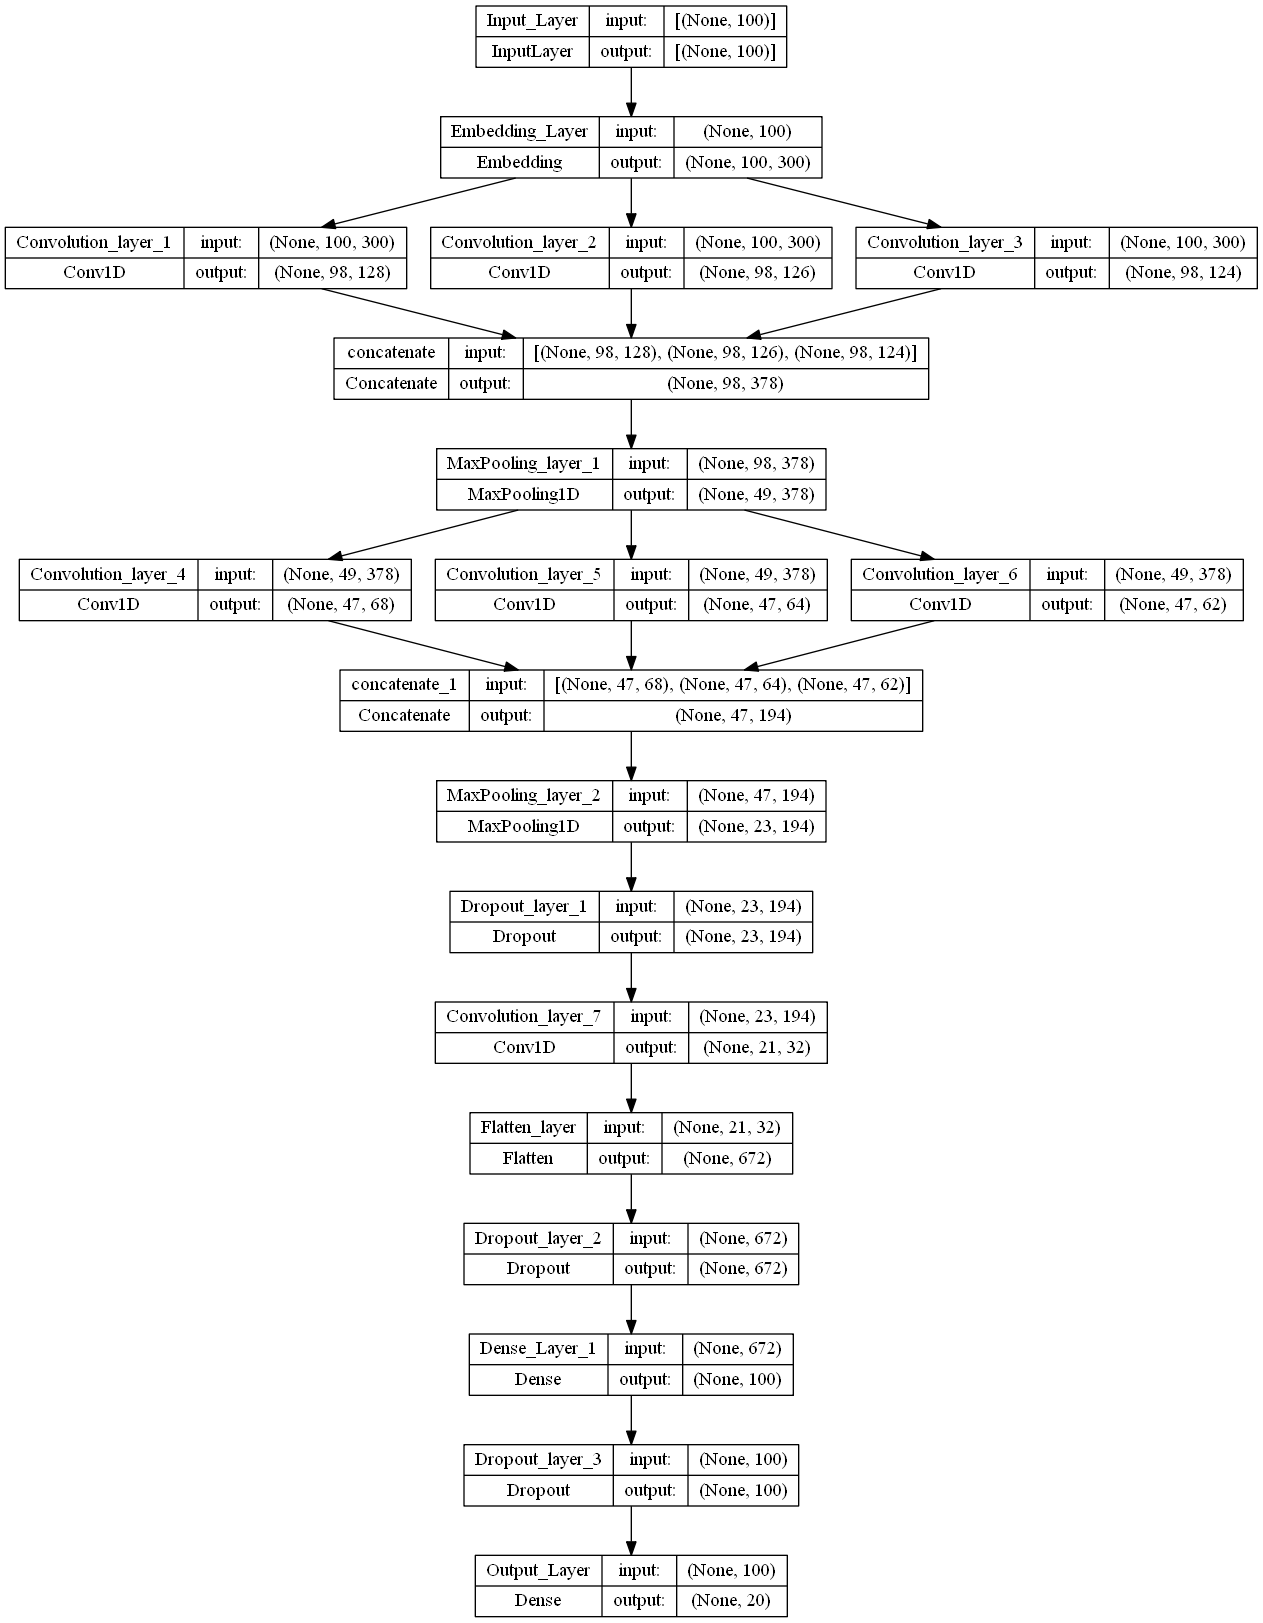

In [52]:
tf.keras.utils.plot_model(model1, show_shapes = True, to_file = "model1.png")

In [56]:
import tensorflow_addons as tfa
import datetime
optimizer = Adam(learning_rate = 0.001) 
f1 = tfa.metrics.F1Score(num_classes=2, average="micro")

model1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy",f1])

#f1 = F1_Score()

checkpoint = ModelCheckpoint(filepath = "best_model_1_{val_accuracy:.4f}.hdf5",
                             monitor='val_accuracy',  verbose = 1, save_best_only = True, mode = "auto")

earlystop = EarlyStopping(monitor = "val_accuracy", patience = 1, verbose = 1, mode = "auto")

log_dir = "logs/model1" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1, write_graph = True)


callback_list = [checkpoint, earlystop, tensorboard_callback]

model1.fit(padded_train, y_train, validation_data = (padded_test, y_test), batch_size = 512, epochs = 100, callbacks = callback_list)

Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 0.5247 - accuracy: 0.8157 - f1_score: 0.8157
Epoch 1: val_accuracy improved from -inf to 0.78245, saving model to best_model_1_0.7825.hdf5
28/28 [==============================] - 31s 1s/step - loss: 0.5247 - accuracy: 0.8157 - f1_score: 0.8157 - val_loss: 0.7690 - val_accuracy: 0.7825 - val_f1_score: 0.7825
Epoch 2/100
28/28 [==============================] - ETA: 0s - loss: 0.3942 - accuracy: 0.8586 - f1_score: 0.8586
Epoch 2: val_accuracy improved from 0.78245 to 0.79584, saving model to best_model_1_0.7958.hdf5
28/28 [==============================] - 28s 1s/step - loss: 0.3942 - accuracy: 0.8586 - f1_score: 0.8586 - val_loss: 0.7409 - val_accuracy: 0.7958 - val_f1_score: 0.7958
Epoch 3/100
28/28 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8755 - f1_score: 0.8755
Epoch 3: val_accuracy did not improve from 0.79584
28/28 [==============================] - 28s 1s/step - loss: 0.3561 - accu

In [48]:
!kill 25436

kill: 25436: No such process


In [57]:
%load_ext tensorboard
%tensorboard --logdir logs/model1

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 25436), started 5 days, 10:55:42 ago. (Use '!kill 25436' to kill it.)

In [58]:
os.environ["PYTHONHASHSEED"] = "0"
tf.keras.backend.clear_session()
np.random.seed(42)
rn.seed(42)

In [59]:
t = Tokenizer(filters = "_", char_level = True, oov_token = "UNK")
t.fit_on_texts(X_train)
vocab_size = len(t.word_index) + 1
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
max_length = 3000              
padded_train = pad_sequences(encoded_train, maxlen = max_length, padding = "post", truncating = "post")
padded_test = pad_sequences(encoded_test, maxlen = max_length, padding = "post", truncating = "post")

embedding_index = dict()
with open(r"C:\Users\I520085\Desktop\science\Deep learning\Tensor flow and keras overview\Assignment\CNN\glove.840B.300d-char.txt", "rb") as f:
    for line in f:
        line_split = line.strip().split()
        char = line_split[0]
        coefs = np.asarray(line_split[1:])
        embedding_index[char] = coefs
f.close()

#https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33
embedding_matrix = []
embedding_matrix.append(np.zeros(vocab_size))
for char, i in t.word_index.items():
    onehot = np.zeros(vocab_size)
    onehot[i - 1] = 1
    embedding_matrix.append(onehot)

embedding_matrix = np.asarray(embedding_matrix)

In [60]:
input_layer = Input(shape = (max_length, ), name = "Input_Layer")

embed_layer = Embedding(input_dim = vocab_size, output_dim = 40, weights = [embedding_matrix], 
                        input_length = max_length, trainable = False, 
                        name = "Embedding_Layer")(input_layer)

conv_1 = Conv1D(256, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeNormal(),
                name = "Convolution_layer_1")(embed_layer)

conv_2 = Conv1D(128, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeNormal(),
                name = "Convolution_layer_2")(conv_1)

max_pool_layer_1 = MaxPool1D(pool_size = 4, padding = "valid",
                             name = "MaxPooling_layer_1")(conv_2)

drop_1 = Dropout(0.4, name = "Dropout_layer_1")(max_pool_layer_1)

conv_3 = Conv1D(64, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeNormal(),
                name = "Convolution_layer_3")(drop_1)

conv_4 = Conv1D(32, kernel_size = 3, padding = "valid", activation = "relu",
                kernel_initializer = tf.keras.initializers.HeNormal(),
                name = "Convolution_layer_4")(conv_3)

max_pool_layer_2 = MaxPool1D(pool_size = 4, padding = "valid",
                             name = "MaxPooling_layer_2")(conv_4)

drop_2 = Dropout(0.4, name = "Dropout_layer_2")(max_pool_layer_2)

flatten = Flatten(name = "Flatten_layer")(drop_2)

dense_1 = Dense(100, activation = "relu", 
                kernel_initializer = tf.keras.initializers.HeNormal(),
                name = "Dense_Layer_1")(flatten)

drop_3 = Dropout(0.1, name = "Dropout_layer_3")(dense_1)

output = Dense(20, activation = "softmax", 
               name = "Output_Layer")(drop_3)

model2 = Model(inputs = input_layer, outputs = output, 
               name = "Model-2")

model2.summary()             

Model: "Model-2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 3000)]            0         
                                                                 
 Embedding_Layer (Embedding)  (None, 3000, 40)         1600      
                                                                 
 Convolution_layer_1 (Conv1D  (None, 2998, 256)        30976     
 )                                                               
                                                                 
 Convolution_layer_2 (Conv1D  (None, 2996, 128)        98432     
 )                                                               
                                                                 
 MaxPooling_layer_1 (MaxPool  (None, 749, 128)         0         
 ing1D)                                                          
                                                           

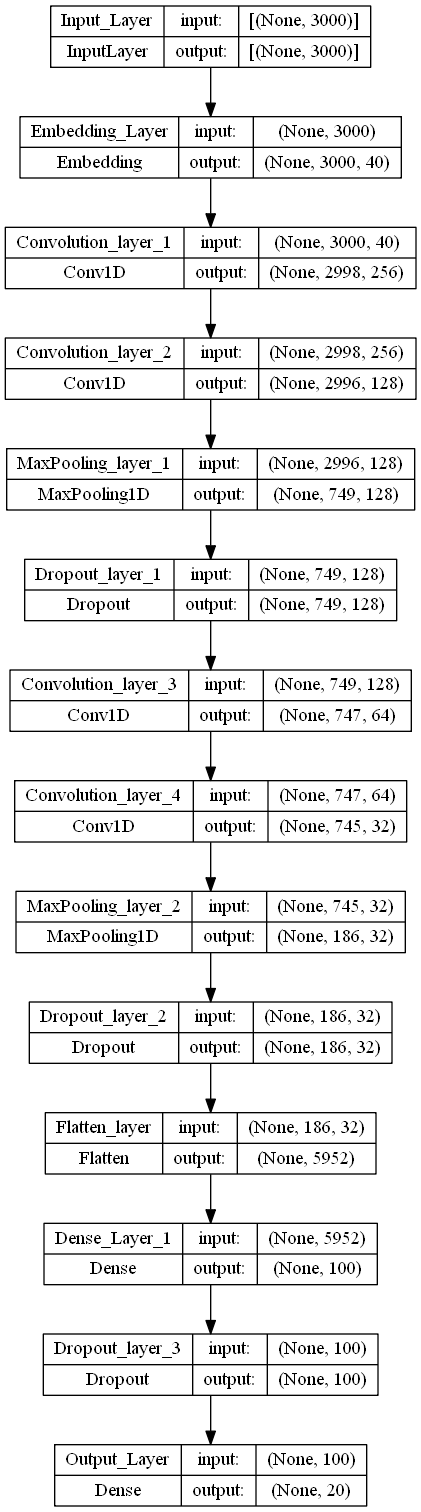

In [61]:
tf.keras.utils.plot_model(model2, show_shapes = True, to_file = "model2.png")

In [62]:
optimizer = Adam(learning_rate = 0.01) 

f1 = tfa.metrics.F1Score(num_classes=2, average="micro")

model2.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy",f1])

checkpoint = ModelCheckpoint(filepath = "best_model_2_{val_accuracy:.4f}.hdf5",
                             monitor='val_accuracy',  verbose = 1, save_best_only = True, mode = "auto")

earlystop = EarlyStopping(monitor = "val_accuracy", patience = 2, verbose = 1, mode = "auto")

log_dir = "logs/model2"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1, write_graph = True)

callback_list = [checkpoint, earlystop, tensorboard_callback]

model2.fit(padded_train, y_train, validation_data = (padded_test, y_test), batch_size = 512, epochs = 100, callbacks = callback_list)

Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 3.0417 - accuracy: 0.0499 - f1_score: 0.0499
Epoch 1: val_accuracy improved from -inf to 0.05163, saving model to best_model_2_0.0516.hdf5
28/28 [==============================] - 249s 9s/step - loss: 3.0417 - accuracy: 0.0499 - f1_score: 0.0499 - val_loss: 2.9914 - val_accuracy: 0.0516 - val_f1_score: 0.0516
Epoch 2/100
28/28 [==============================] - ETA: 0s - loss: 2.9906 - accuracy: 0.0514 - f1_score: 0.0514
Epoch 2: val_accuracy improved from 0.05163 to 0.05842, saving model to best_model_2_0.0584.hdf5
28/28 [==============================] - 259s 9s/step - loss: 2.9906 - accuracy: 0.0514 - f1_score: 0.0514 - val_loss: 2.9856 - val_accuracy: 0.0584 - val_f1_score: 0.0584
Epoch 3/100
28/28 [==============================] - ETA: 0s - loss: 2.9750 - accuracy: 0.0662 - f1_score: 0.0662
Epoch 3: val_accuracy improved from 0.05842 to 0.07266, saving model to best_model_2_0.0727.hdf5
28/28 [===================

In [64]:
%tensorboard --logdir logs/model2

Reusing TensorBoard on port 6006 (pid 33432), started 4 days, 19:20:21 ago. (Use '!kill 33432' to kill it.)